In [46]:
# packages 
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import re
from matplotlib import pyplot as plt

# import scripts
import models.FRL as FRL
import models.CAFRL as CAFRL
import models.SAFRL as SAFRL
import models.CAFRL_A as CAFRL_A
import models.SAFRL_A as SAFRL_A
import scripts.modelling as modelling

# run model comparison?
comparison = False

In [51]:
# initalise empty dicts for fits and data to be read into 
ghc, ghd, isoc, isod, all = {}, {}, {}, {}, {}

# list of strings
groups = ['ghc', 'ghd', 'isoc', 'isod', 'all']

# build lists for model and data
frl_list = [ghc, ghd, isoc, isod, all]
cafrl_list = [ghc, ghd, isoc, isod, all]
safrl_list = [ghc, ghd, isoc, isod, all]
cafrl_a_list = [ghc, ghd, isoc, isod, all]
safrl_a_list = [ghc, ghd, isoc, isod, all]
data_list = [ghc, ghd, isoc, isod, all]

# loop through groups and read fit/data into the corresponding position in the list
for i in range(len(groups)):
    path = 'data/modelling/fits/frl/' + groups[i] + '_!2.pkl'
    with open(path, 'rb') as f:
        frl_list[i] = pickle.load(f)

for i in range(len(groups)):
    path = 'data/modelling/fits/cafrl/' + groups[i] + '_!2.pkl'
    with open(path, 'rb') as f:
        cafrl_list[i] = pickle.load(f)

for i in range(len(groups)):
    path = 'data/modelling/fits/safrl/' + groups[i] + '_!2.pkl'
    with open(path, 'rb') as f:
        safrl_list[i] = pickle.load(f)

for i in range(len(groups)):
    path = 'data/modelling/fits/cafrl_A/' + groups[i] + '_!2.pkl'
    with open(path, 'rb') as f:
        cafrl_a_list[i] = pickle.load(f)

for i in range(len(groups)):
    path = 'data/modelling/fits/safrl_A/' + groups[i] + '_!2.pkl'
    with open(path, 'rb') as f:
        safrl_a_list[i] = pickle.load(f)

for i in range(len(groups)):
    path = 'data/modelling/datalists/' + groups[i] + '_!2.pkl'
    with open(path, 'rb') as f:
        data_list[i] = pickle.load(f)


In [47]:
## first let's analyse average likelihood per trial and bic

if comparison == True:

    # initalise empty lists
    alpt_frl, alpt_cafrl, alpt_safrl, alpt_cafrl_a, alpt_safrl_a = [], [], [], [], []
    bic_frl, bic_cafrl, bic_safrl, bic_cafrl_a, bic_safrl_a = [], [], [], [], []

    # loop through data and fits for each model and save alpt for each in list
    for i in range(len(data_list)):
        alpt_frl.append(modelling.alpt(data_list[i], FRL.llIED, fit_args= ['R','choice','S','dimension1'], params = frl_list[i]['m']))
        bic_frl.append(modelling.iBIC(u = frl_list[i]['u'], v2 = frl_list[i]['v2'], data = data_list[i], transforms = ['sigmoid','exp']
                                      , like_func = FRL.llIED, fit_args = ['R','choice','S','dimension1'], rng= None, seed = 999, Nsamples = 5000, n_jobs = 1))

    for i in range(len(data_list)):
        alpt_cafrl.append(modelling.alpt(data_list[i], CAFRL.llIED, fit_args= ['R','choice','S','dimension1'], params = cafrl_list[i]['m']))
        bic_cafrl.append(modelling.iBIC(u = cafrl_list[i]['u'], v2 = cafrl_list[i]['v2'], data = data_list[i], transforms = ['sigmoid','exp',None], 
                                        like_func = CAFRL.llIED, fit_args = ['R','choice','S','dimension1'], rng= None, seed = 999, Nsamples = 5000, n_jobs = 1))

    for i in range(len(data_list)):
       alpt_safrl.append(modelling.alpt(data_list[i], SAFRL.llIED, fit_args= ['R','choice','S','dimension1'], params = safrl_list[i]['m']))
       bic_safrl.append(modelling.iBIC(u = safrl_list[i]['u'], v2 = safrl_list[i]['v2'], data = data_list[i], transforms = ['sigmoid','exp',None,'sigmoid'], 
                                       like_func = SAFRL.llIED, fit_args = ['R','choice','S','dimension1'], rng= None, seed = 999, Nsamples = 5000, n_jobs = 1))
       
    for i in range(len(data_list)):
        alpt_cafrl_a.append(modelling.alpt(data_list[i], CAFRL_A.llIED, fit_args= ['R','choice','S','dimension1'], params = cafrl_a_list[i]['m']))
        bic_cafrl_a.append(modelling.iBIC(u = cafrl_a_list[i]['u'], v2 = cafrl_a_list[i]['v2'], data = data_list[i], transforms = ['sigmoid','exp','sigmoid'], 
                                        like_func = CAFRL_A.llIED, fit_args = ['R','choice','S','dimension1'], rng= None, seed = 999, Nsamples = 5000, n_jobs = 1))

    for i in range(len(data_list)):
       alpt_safrl_a.append(modelling.alpt(data_list[i], SAFRL_A.llIED, fit_args= ['R','choice','S','dimension1'], params = safrl_a_list[i]['m']))
       bic_safrl_a.append(modelling.iBIC(u = safrl_a_list[i]['u'], v2 = safrl_a_list[i]['v2'], data = data_list[i], transforms = ['sigmoid','exp','sigmoid','sigmoid'], 
                                       like_func = SAFRL_A.llIED, fit_args = ['R','choice','S','dimension1'], rng= None, seed = 999, Nsamples = 5000, n_jobs = 1))

    ## bind into 1 df and write csv
    tmp_alpt = [x['alpt'] for x in alpt_frl]
    tmp_ibic = [x['iBIC'] for x in bic_frl]

    tmp_data = pd.DataFrame({
        'alpt': tmp_alpt,
        'iBIC': tmp_ibic,
        'group': groups,
        'model' : 'FRL'
    })
    tmp_alpt = [x['alpt'] for x in alpt_cafrl]
    tmp_ibic = [x['iBIC'] for x in bic_cafrl]

    tmp_data_1 = pd.DataFrame({
        'alpt': tmp_alpt,
        'iBIC': tmp_ibic,
        'group': groups,
        'model': 'CAFRL'
    })
    tmp_alpt = [x['alpt'] for x in alpt_safrl]
    tmp_ibic = [x['iBIC'] for x in bic_safrl]

    tmp_data_2 = pd.DataFrame({
        'alpt': tmp_alpt,
        'iBIC': tmp_ibic,
        'group': groups,
        'model': 'SAFRL'
    })

    tmp_alpt = [x['alpt'] for x in alpt_cafrl_a]
    tmp_ibic = [x['iBIC'] for x in bic_cafrl_a]

    tmp_data_3 = pd.DataFrame({
        'alpt': tmp_alpt,
        'iBIC': tmp_ibic,
        'group': groups,
        'model': 'CAFRL_A'
    })

    tmp_alpt = [x['alpt'] for x in alpt_safrl_a]
    tmp_ibic = [x['iBIC'] for x in bic_safrl_a]

    tmp_data_4 = pd.DataFrame({
        'alpt': tmp_alpt,
        'iBIC': tmp_ibic,
        'group': groups,
        'model': 'SAFRL_A'
    })

    model_comp = pd.concat([tmp_data, tmp_data_1, tmp_data_2, tmp_data_3, tmp_data_4])

    model_comp.to_csv('data/model_comparison_r0.csv')

else:

    # read model comparison csv
    model_comp_3 = pd.read_csv('data/model_comparison_!2.csv')

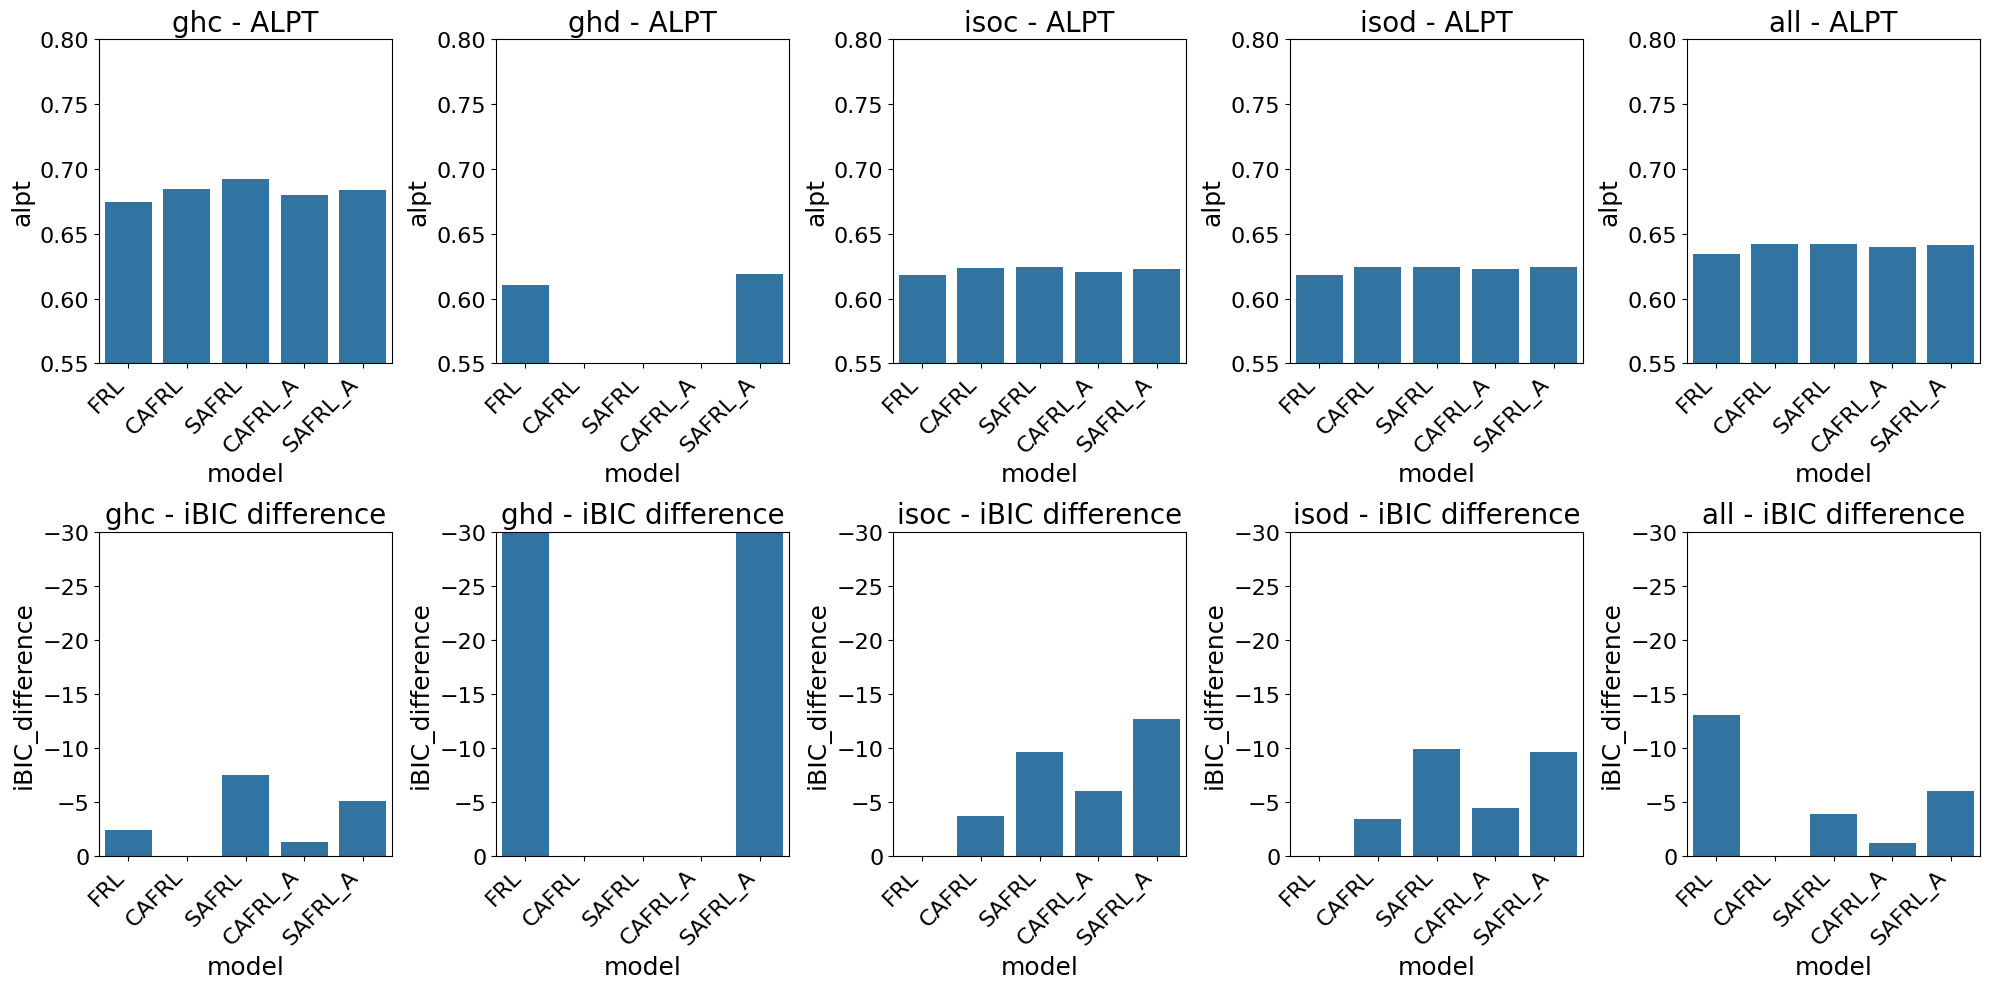

In [41]:
fig, axs = plt.subplots(2, len(groups), figsize=(20, 10))  # Adjust figsize as needed
groups = ['ghc', 'ghd', 'isoc', 'isod', 'all']
groups_2 = ['group housed control', 'group housed chemogenetics', 'isolated control', 'isolated chemogenetics', 'all']

custom_order = ['FRL', 'CAFRL', 'SAFRL', 'CAFRL_A', 'SAFRL_A']
# ALPT plots
for i in range(len(groups)):
    tmp_data = model_comp[model_comp['group'] == groups[i]]  # No modification here
    sns.barplot(data=tmp_data, x='model', y='alpt', ax=axs[0, i], order=custom_order)
    axs[0, i].set_ylim(0.55, 0.80)  # Set y-axis to start at 0.5
    axs[0, i].set_title(f'{groups[i]} - ALPT')  # Title for the first row
    axs[0, i].set_xticks(axs[0, i].get_xticks())
    axs[0, i].set_xticklabels(axs[0, i].get_xticklabels(), rotation=45, ha='right')

# iBIC plots
for i in range(len(groups)):
    tmp_data = model_comp[model_comp['group'] == groups[i]].copy()  # Create a copy to avoid warnings
    tmp_data['iBIC_difference'] = tmp_data['iBIC'] - tmp_data['iBIC'].max()  # Subtract max iBIC (closest to 0)
    sns.barplot(data=tmp_data, x='model', y='iBIC_difference', ax=axs[1, i], order=custom_order)
    axs[1, i].set_ylim(0, -30)  # Set y-axis to start at 0.5
    axs[1, i].set_title(f'{groups[i]} - iBIC difference')  # Title for the second row
    axs[1, i].set_xticks(axs[1, i].get_xticks())
    axs[1, i].set_xticklabels(axs[1, i].get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()  # Ensures everything fits without overlap
plt.savefig('plots/model_comparison.png')
plt.show()



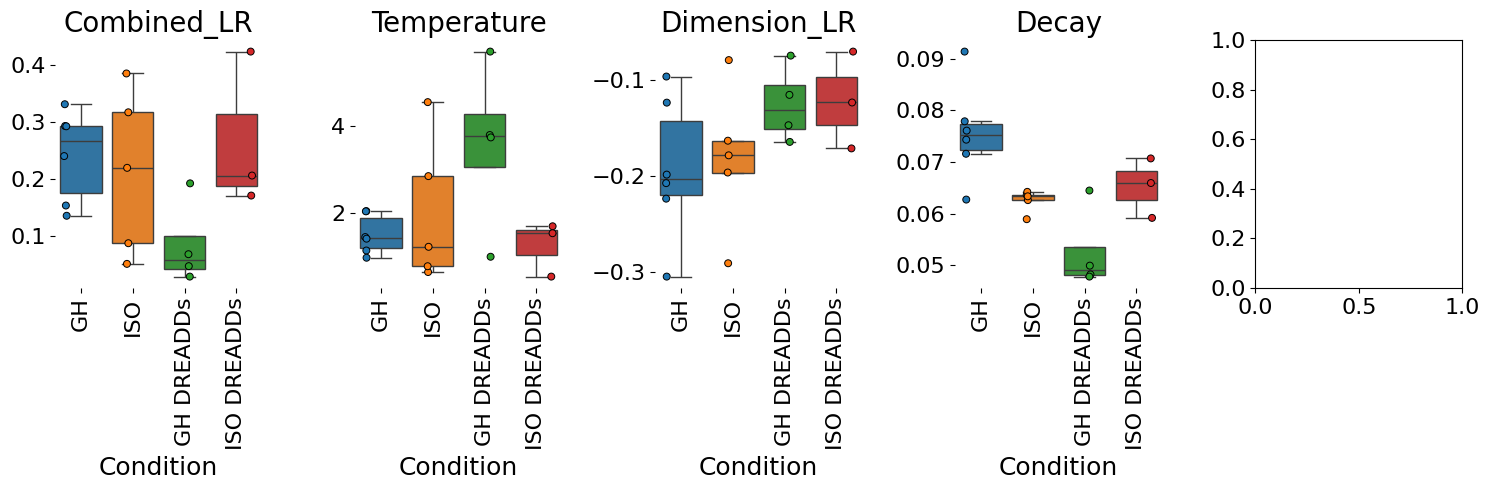

In [53]:
# plotting safrl params
parameters = ['Combined_LR', 'Temperature', 'Dimension_LR', 'Decay']
parameters = parameters[0:4]

custom_palette = {'GH': sns.color_palette("Paired")[5], 'ISO': sns.color_palette("Paired")[1],
                       'GH DREADDs': sns.color_palette("Paired")[4], 'ISO DREADDs': sns.color_palette("Paired")[0]}

# plotting vars
data_colours = ['#393131', '#e85050', '#50e890', '#508be8']
palette_mapping = {'GH': '#393131', 'ISO': '#e85050', 'GH DREADDs': '#50e890', 'ISO DREADDs': '#508be8'}  # Adjust mapping based on conditions

# get parameters from model
params = safrl_list[4]['m']
params = pd.DataFrame(params, columns=parameters)
params.reset_index(drop=True, inplace=True)

# load the behavioural data for plotting
with open('data/raw/binded_data.pkl', 'rb') as f:
    binded_data = pickle.load(f)

binded_data = binded_data[~binded_data['animal'].str.contains('GG')]

mice = binded_data.drop_duplicates(subset=['animal', 'condition'])
mice = mice[['animal', 'condition']]
mice.reset_index(drop=True, inplace=True)

results = pd.concat([mice, params], axis=1)
results['condition'] = results['condition'].replace('GH mCherry', 'GH')
results['condition'] = results['condition'].replace('ISO mCherry', 'ISO')

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for p in range(len(parameters)):
    plt.sca(axes[p])
    sns.boxplot(
        y=parameters[p], 
        x='condition', 
        data=results, 
        hue='condition',  # Assigning hue for the same variable
        dodge=False,      # Prevents bar duplication due to hue
        #palette=custom_palette,
        showfliers = False,
        legend=False,      # Suppress legend
        #showmeans=True,
    ).set(title=parameters[p])
    sns.stripplot(
        y=parameters[p], 
        x='condition', 
        data=results, 
        #palette=custom_palette, 
        hue='condition',
        dodge=True,
        legend=False,
        edgecolor='black',  # Add grey outline
        linewidth=0.7,           # Thickness of the outline
    ).set(title=parameters[p])
    plt.ylabel('')
    plt.xlabel('Condition')
    plt.xticks(rotation=90)
    plt.box(False)

plt.savefig('plots/cafrl_a_distribution.png')
plt.tight_layout()
plt.show()

In [273]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# ANOVA analysis on shift costs
lr_lm = ols('Theta0 ~ condition',data=results).fit()
table = sm.stats.anova_lm(lr_lm, typ=2) # Type 2 ANOVA DataFrame
print(table)

# now do post hoc test
tukey_oneway = pairwise_tukeyhsd(endog = results['Theta0'], groups = results['condition'])
print(tukey_oneway.summary())

# get means
results = results.groupby('condition')
print(results['Theta0'].mean())
print(results['Theta0'].std())

             sum_sq    df         F    PR(>F)
condition  0.134659   3.0  1.128238  0.371322
Residual   0.556982  14.0       NaN       NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1      group2   meandiff p-adj   lower  upper  reject
------------------------------------------------------------
        GH  GH DREADDs   -0.175  0.543 -0.5492 0.1992  False
        GH         ISO   0.0263 0.9962 -0.3248 0.3774  False
        GH ISO DREADDs    0.072 0.9551 -0.3379  0.482  False
GH DREADDs         ISO   0.2013 0.4607 -0.1876 0.5902  False
GH DREADDs ISO DREADDs   0.2471 0.3986 -0.1957 0.6899  False
       ISO ISO DREADDs   0.0457 0.9888 -0.3776 0.4691  False
------------------------------------------------------------
condition
GH             0.391364
GH DREADDs     0.216346
ISO            0.417666
ISO DREADDs    0.463414
Name: Theta0, dtype: float64
condition
GH             0.083365
GH DREADDs     0.269497
ISO            0.239257
ISO DREADDs    0.194128
Name: Theta

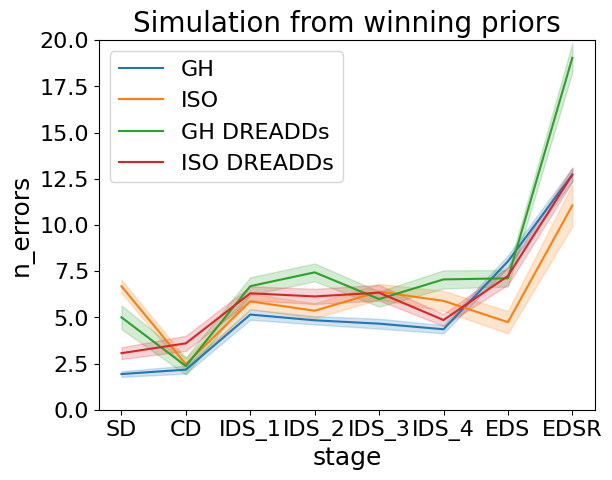

In [250]:
## lets see what behaviour looks like in simulation
transforms = ['sigmoid', 'exp', 'sigmoid', 'sigmoid']
n = 100

# use actual parameters (True) or generated (False)
real_parameters = False

# get lists we want for the groups we want to plot
groups = [0, 2, 1, 3]
models = [CAFRL_A, FRL, CAFRL_A, CAFRL_A]
models_list = [cafrl_a_list, frl_list, cafrl_a_list, cafrl_a_list]
model_names = ['GH', 'ISO', 'GH DREADDs', 'ISO DREADDs']

for i in range(len(groups)):

    group = groups[i]

    # get the model and correct list of data
    model = models[i]
    model_list = models_list[i]

    # run sims with generated parameters
    if real_parameters == False:

        ## generate params from multivariate normal
        # get appropraite means and covariance matrices from lists
        m = model_list[group]['u']
        v2 = model_list[group]['v2']

        # set distribtuion
        dist = (m,v2)

        # generate params from dist
        parameters = np.random.multivariate_normal(dist[0], dist[1], n)
        nP = parameters.shape[1]

        # transform parameters 
        for x in range(nP):
            if transforms[x] == 'sigmoid':
                parameters[:,x] = 1/(1+np.exp(-parameters[:,x]))
            elif transforms[x] == 'exp':
                parameters[:,x] = np.exp(parameters[:,x])

        sims = modelling.simulate(model = model.simulate, model_args = 0, rng = None, seed = 999, params=parameters, dist=None, N=100, transforms = None, subjects = None)

    # run sims with fitted parameter values
    else:
        # get params
        
        params = results[results['condition'] == model_names[i]][['Combined LR', 'Temperature', 'Decay']].to_numpy()
        n = len(params)

        repeated_data = np.array([row for row in params for _ in range(100)])

        n = len(repeated_data)
        # sim data
        sims = modelling.simulate(model = model.simulate, model_args = 0, rng = None, seed = 123, params=repeated_data, dist=None, N=n, transforms = None, subjects = None)

    for j in range(len(sims['data'])):
        tmp_data = sims['data'][j]
        n_errors = tmp_data['n_erros']
        stages_attempted = tmp_data['stages_attempted']
        
        tmp_df = pd.DataFrame({
            'n_errors': n_errors,
            'stage': stages_attempted,
            'id': [j] * len(stages_attempted),
            'group': model_names[i]

        })

        if j == 0:
            tmp = tmp_df
        else:
            tmp = pd.concat([tmp, tmp_df])

    ax = sns.lineplot(tmp, x='stage', y='n_errors', errorbar='se', label=model_names[i])
    ax.set(ylim=(0, 20))
    ax.set_title('Simulation from winning priors')
plt.tight_layout
plt.savefig("plots/winning_prior_sims.png", bbox_inches = 'tight') 

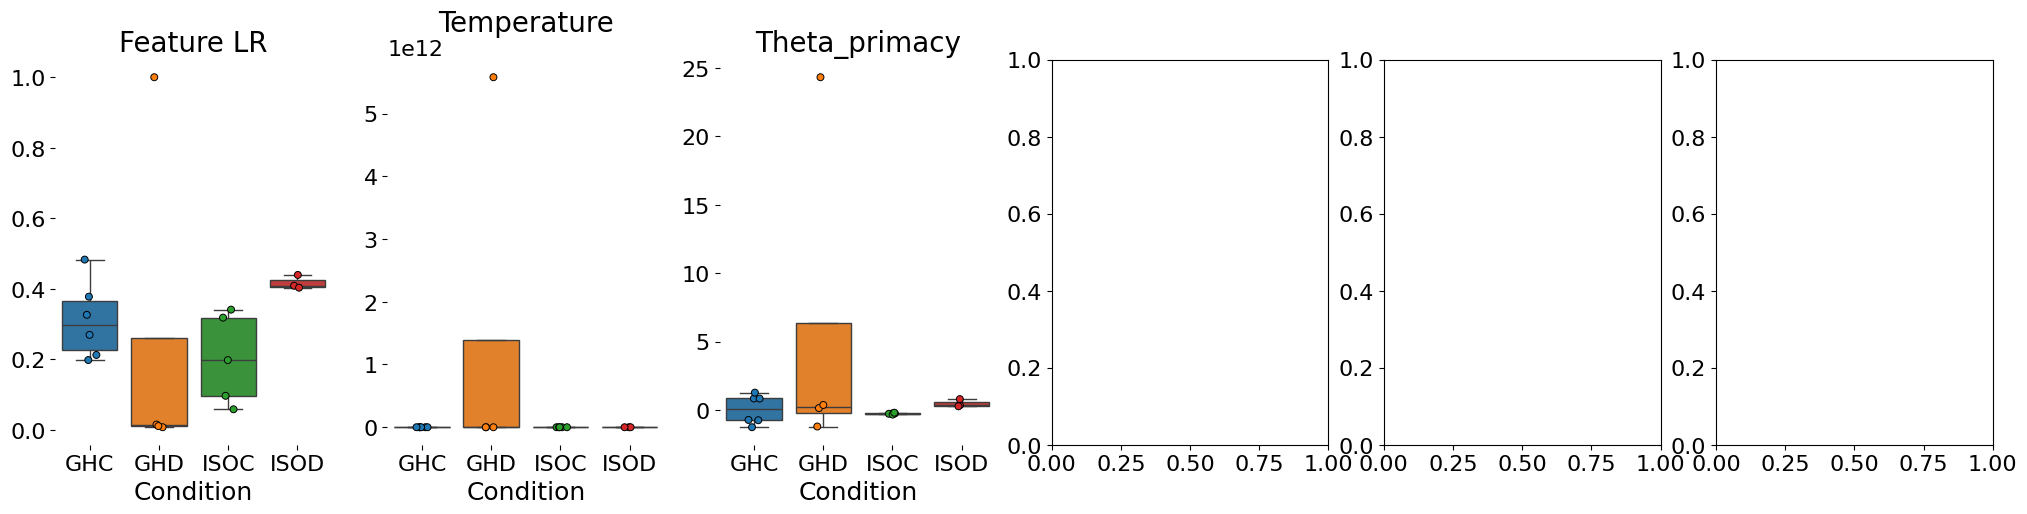

In [45]:
# which model do we want to plot
model = safrl_list
nP = 3

# plotting safrl params
parameters = ['Feature LR', 'Temperature', 'Theta_primacy', 'Dimension LR']

# plotting vars
data_colours = ['#393131','#e85050']

# Set global font sizes
plt.rcParams.update({'axes.titlesize': 20,
                     'axes.titleweight': 'normal',
                     'axes.labelsize': 18,
                     'axes.labelweight': 'normal',
                     'xtick.labelsize': 16,
                     #'xtick.labelweight': 'bold',
                     'ytick.labelsize': 16,
                     #'ytick.labelweight': 'bold',
                     'legend.fontsize': 16,
                     'font.weight': 'normal'})

fig, axes = plt.subplots(1,6, figsize=(25, 5))

for p in range(len(parameters[0:nP])):
    ghc_alpha = model[0]['m'][:,p]
    ghd_alpha = model[1]['m'][:,p]
    isoc_alpha = model[2]['m'][:,p]
    isod_alpha = model[3]['m'][:,p]
    groups = [None, 'GHC', 'GHD', 'ISOC', 'ISOD']
    alpha = []
    for i, lst in enumerate([ghc_alpha, ghd_alpha, isoc_alpha, isod_alpha], start=1):
        alpha.extend([(value, f'{groups[i]}') for value in lst])

    # Convert to DataFrame
    alpha_df = pd.DataFrame(alpha, columns=['Value', 'Source'])
    
    plt.sca(axes[p])
    sns.boxplot(y = 'Value', x = 'Source', hue='Source', showfliers = False, data = alpha_df).set(title = parameters[p])
    sns.stripplot(y = 'Value', x = 'Source', hue='Source', data = alpha_df, edgecolor='black', linewidth=0.7).set(title = parameters[p])
    plt.ylabel('')
    plt.xlabel('Condition')
    plt.box(False)
    plt.savefig('plots/frl_distribution_split.png')

In [11]:
# initalise empty lists
alpt_frl = []
alpt_cafrl = []
alpt_safrl = []
alpt_cafrl_a = []
alpt_safrl_a = []

# loop through data and fits for each model and save alpt for each in list
for i in range(len(data_list)):
    alpt_frl.append(modelling.alpt(data_list[i], FRL.llIED, fit_args= ['R','choice','S','dimension1'], params = frl_list[i]['m']))
    
for i in range(len(data_list)):
    alpt_cafrl.append(modelling.alpt(data_list[i], CAFRL.llIED, fit_args= ['R','choice','S','dimension1'], params = cafrl_list[i]['m']))
    
for i in range(len(data_list)):    
    alpt_safrl.append(modelling.alpt(data_list[i], SAFRL.llIED, fit_args= ['R','choice','S','dimension1'], params = safrl_list[i]['m']))

for i in range(len(data_list)):
    alpt_cafrl_a.append(modelling.alpt(data_list[i], CAFRL_A.llIED, fit_args= ['R','choice','S','dimension1'], params = cafrl_a_list[i]['m']))
    
for i in range(len(data_list)):    
    alpt_safrl_a.append(modelling.alpt(data_list[i], SAFRL_A.llIED, fit_args= ['R','choice','S','dimension1'], params = safrl_a_list[i]['m']))
    

Participant: 100%|██████████| 6/6 [00:00<00:00, 50031.46it/s]
/mnt/Analyses/rowan/IED_anaysis/models/SAFRL.py:416: RuntimeWarning: overflow encountered in exp
  ev = np.exp(beta*V[t])
/mnt/Analyses/rowan/IED_anaysis/models/SAFRL.py:418: RuntimeWarning: invalid value encountered in divide
  p = ev/sev
/mnt/Analyses/rowan/IED_anaysis/models/SAFRL.py:457: RuntimeWarning: overflow encountered in exp
  ev = np.exp(beta*V[t])
/mnt/Analyses/rowan/IED_anaysis/models/SAFRL.py:459: RuntimeWarning: invalid value encountered in divide
  p = ev/sev
Participant: 100%|██████████| 18/18 [00:00<00:00, 160975.42it/s]


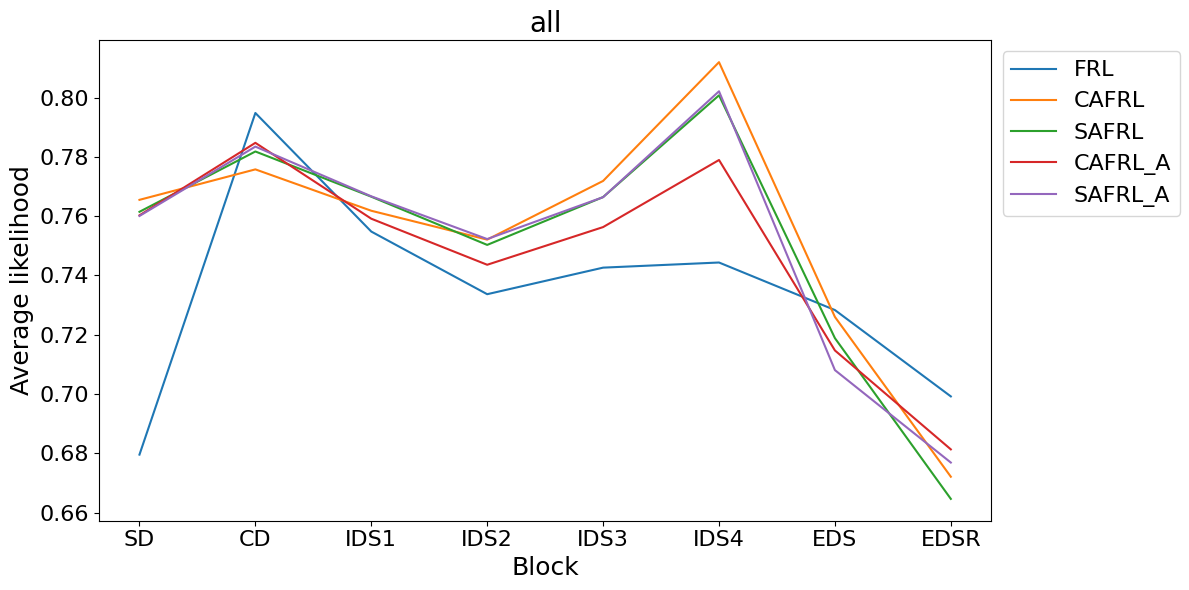

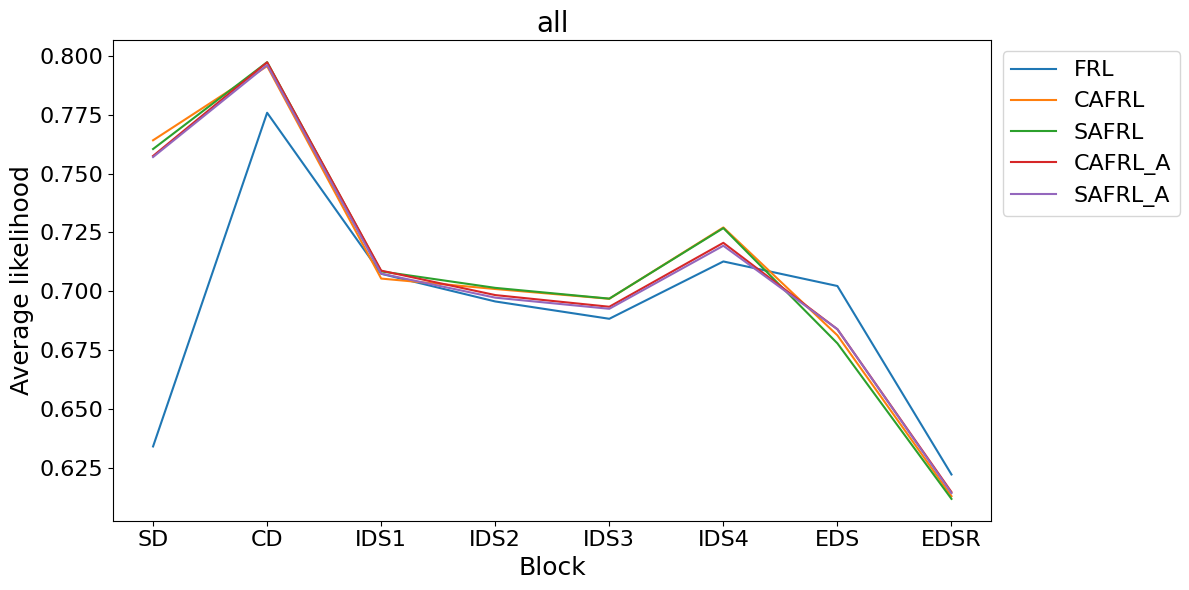

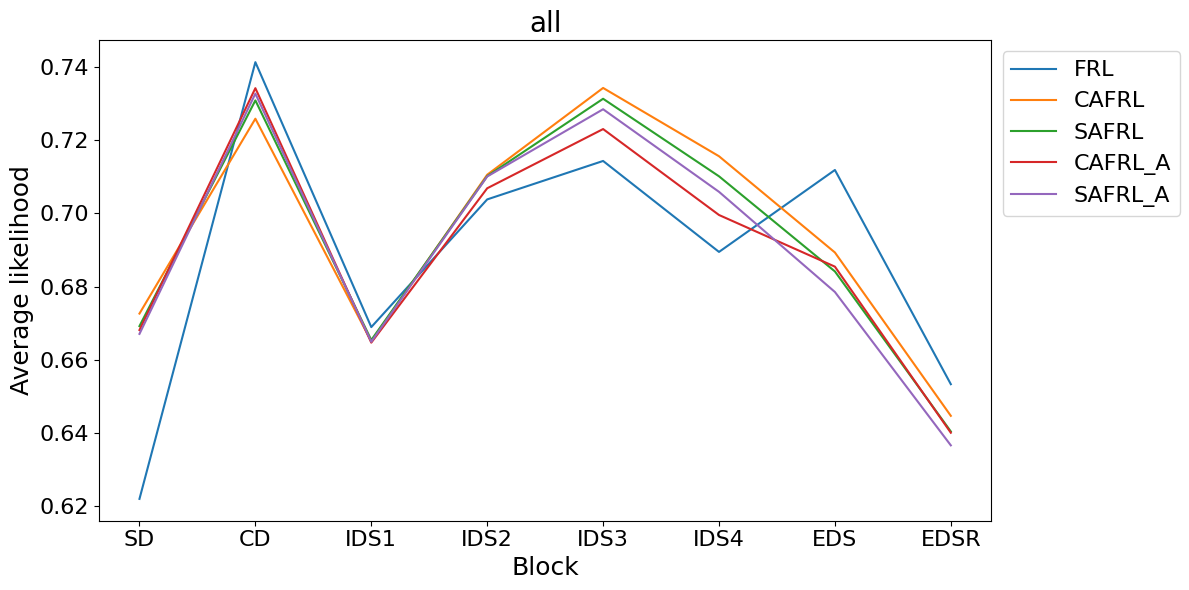

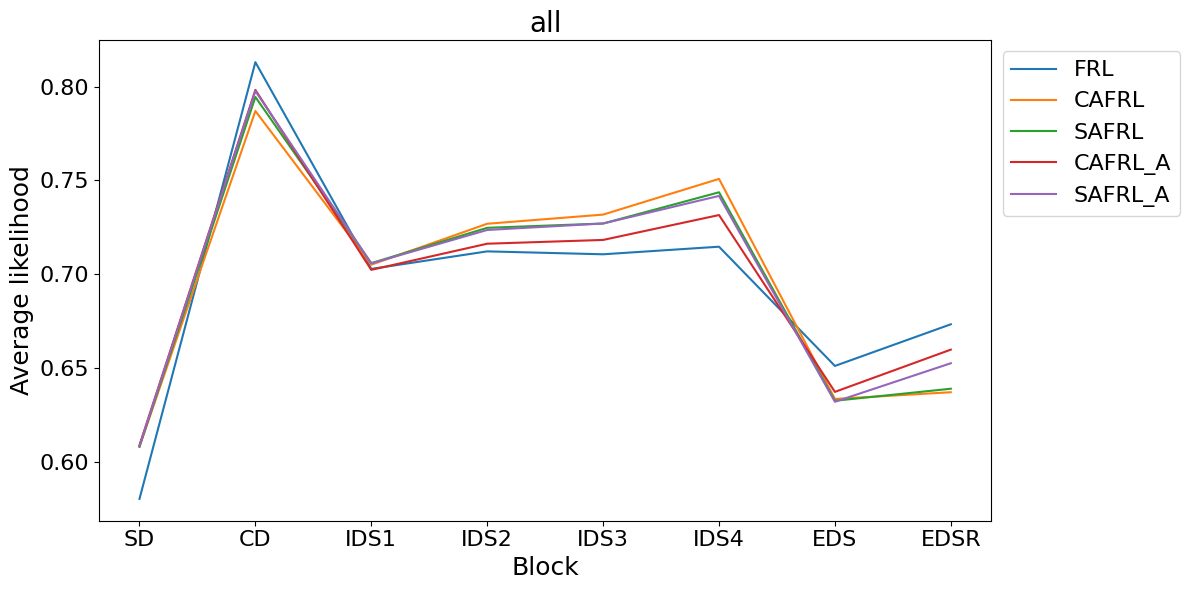

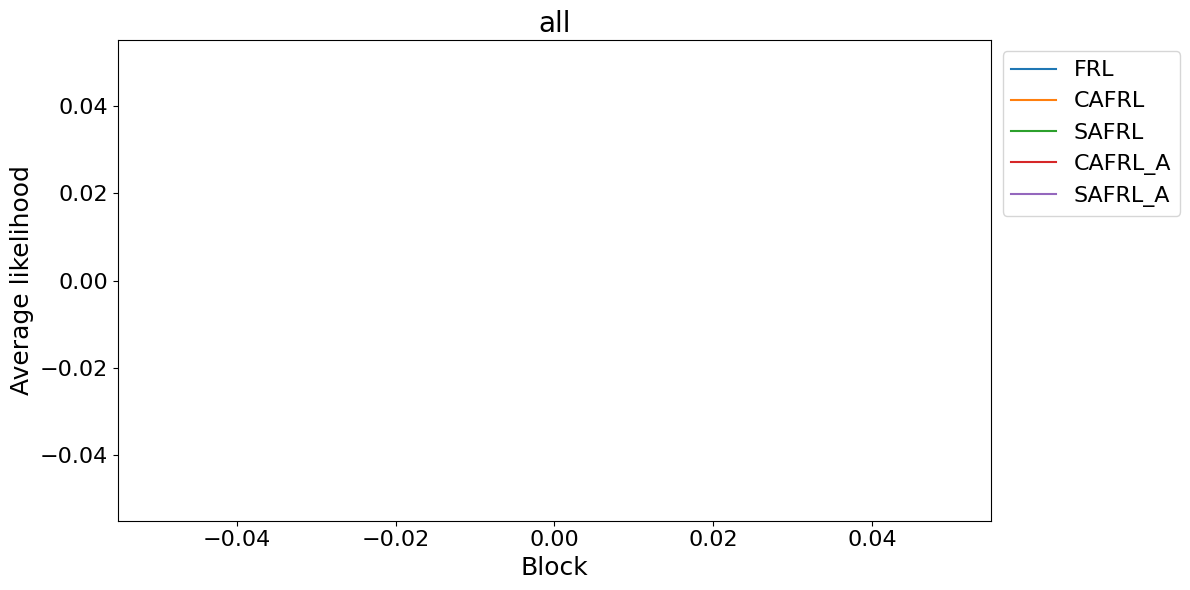

In [12]:
# loop over the fits
groups = ['ghc', 'ghd', 'isoc', 'isod', 'all']
groups_2 = ['GH', 'GH DREADDs', 'ISO', 'ISO DREADDs', 'all']
clean_data = pd.read_csv('data/clean/clean_data.csv')

for group in groups:
    # Get index
    i = groups.index(group)

    # Get the trialwise likelihood for all subjects within the current fit
    tmp_frl = alpt_frl[i]['trialwise_likelihood']
    tmp_cafrl = alpt_cafrl[i]['trialwise_likelihood']
    tmp_safrl = alpt_safrl[i]['trialwise_likelihood']
    tmp_cafrl_a = alpt_cafrl_a[i]['trialwise_likelihood']
    tmp_safrl_a = alpt_safrl_a[i]['trialwise_likelihood']

    # Get the right data
    if group == 'all':
        tmp_data = clean_data
    else:
        tmp_data = clean_data[clean_data['condition'] == groups_2[i]].copy()

    # Bind the likelihoods for each model as a column in the data
    tmp_list = [tmp_frl, tmp_cafrl, tmp_safrl, tmp_cafrl_a, tmp_safrl_a]
    models = ['FRL', 'CAFRL', 'SAFRL', 'CAFRL_A', 'SAFRL_A']

    for model in tmp_list:
        i = tmp_list.index(model)
        likelihoods = []
        for j in range(len(model)):
            x = model[j]
            likelihoods = likelihoods + x

        tmp_data[models[i]] = likelihoods

    if group == 'all':

        for j in range(len(groups_2)):
            tmp_data_2 = tmp_data[tmp_data['condition'] == groups_2[j]].copy()

            # Set the figure size for the plots
            plt.figure(figsize=(12, 6))  # Adjust width and height as necessary

            for model in models:
                i = models.index(model)
                tmp_data_2[model] = tmp_data_2[model].apply(np.sum)
                ax = sns.lineplot(data=tmp_data_2, x='block', y=model, errorbar=None, label=f'{model}')
                sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

            # Add labels, title, and layout adjustments
            plt.xlabel('Block')
            plt.ylabel('Average likelihood')
            plt.title(group)
            plt.tight_layout()  # Ensure everything fits within the figure

            # Save the figure
            plt.savefig(f'plots/{groups_2[j]}.png')

            # Show the plot
            plt.show()


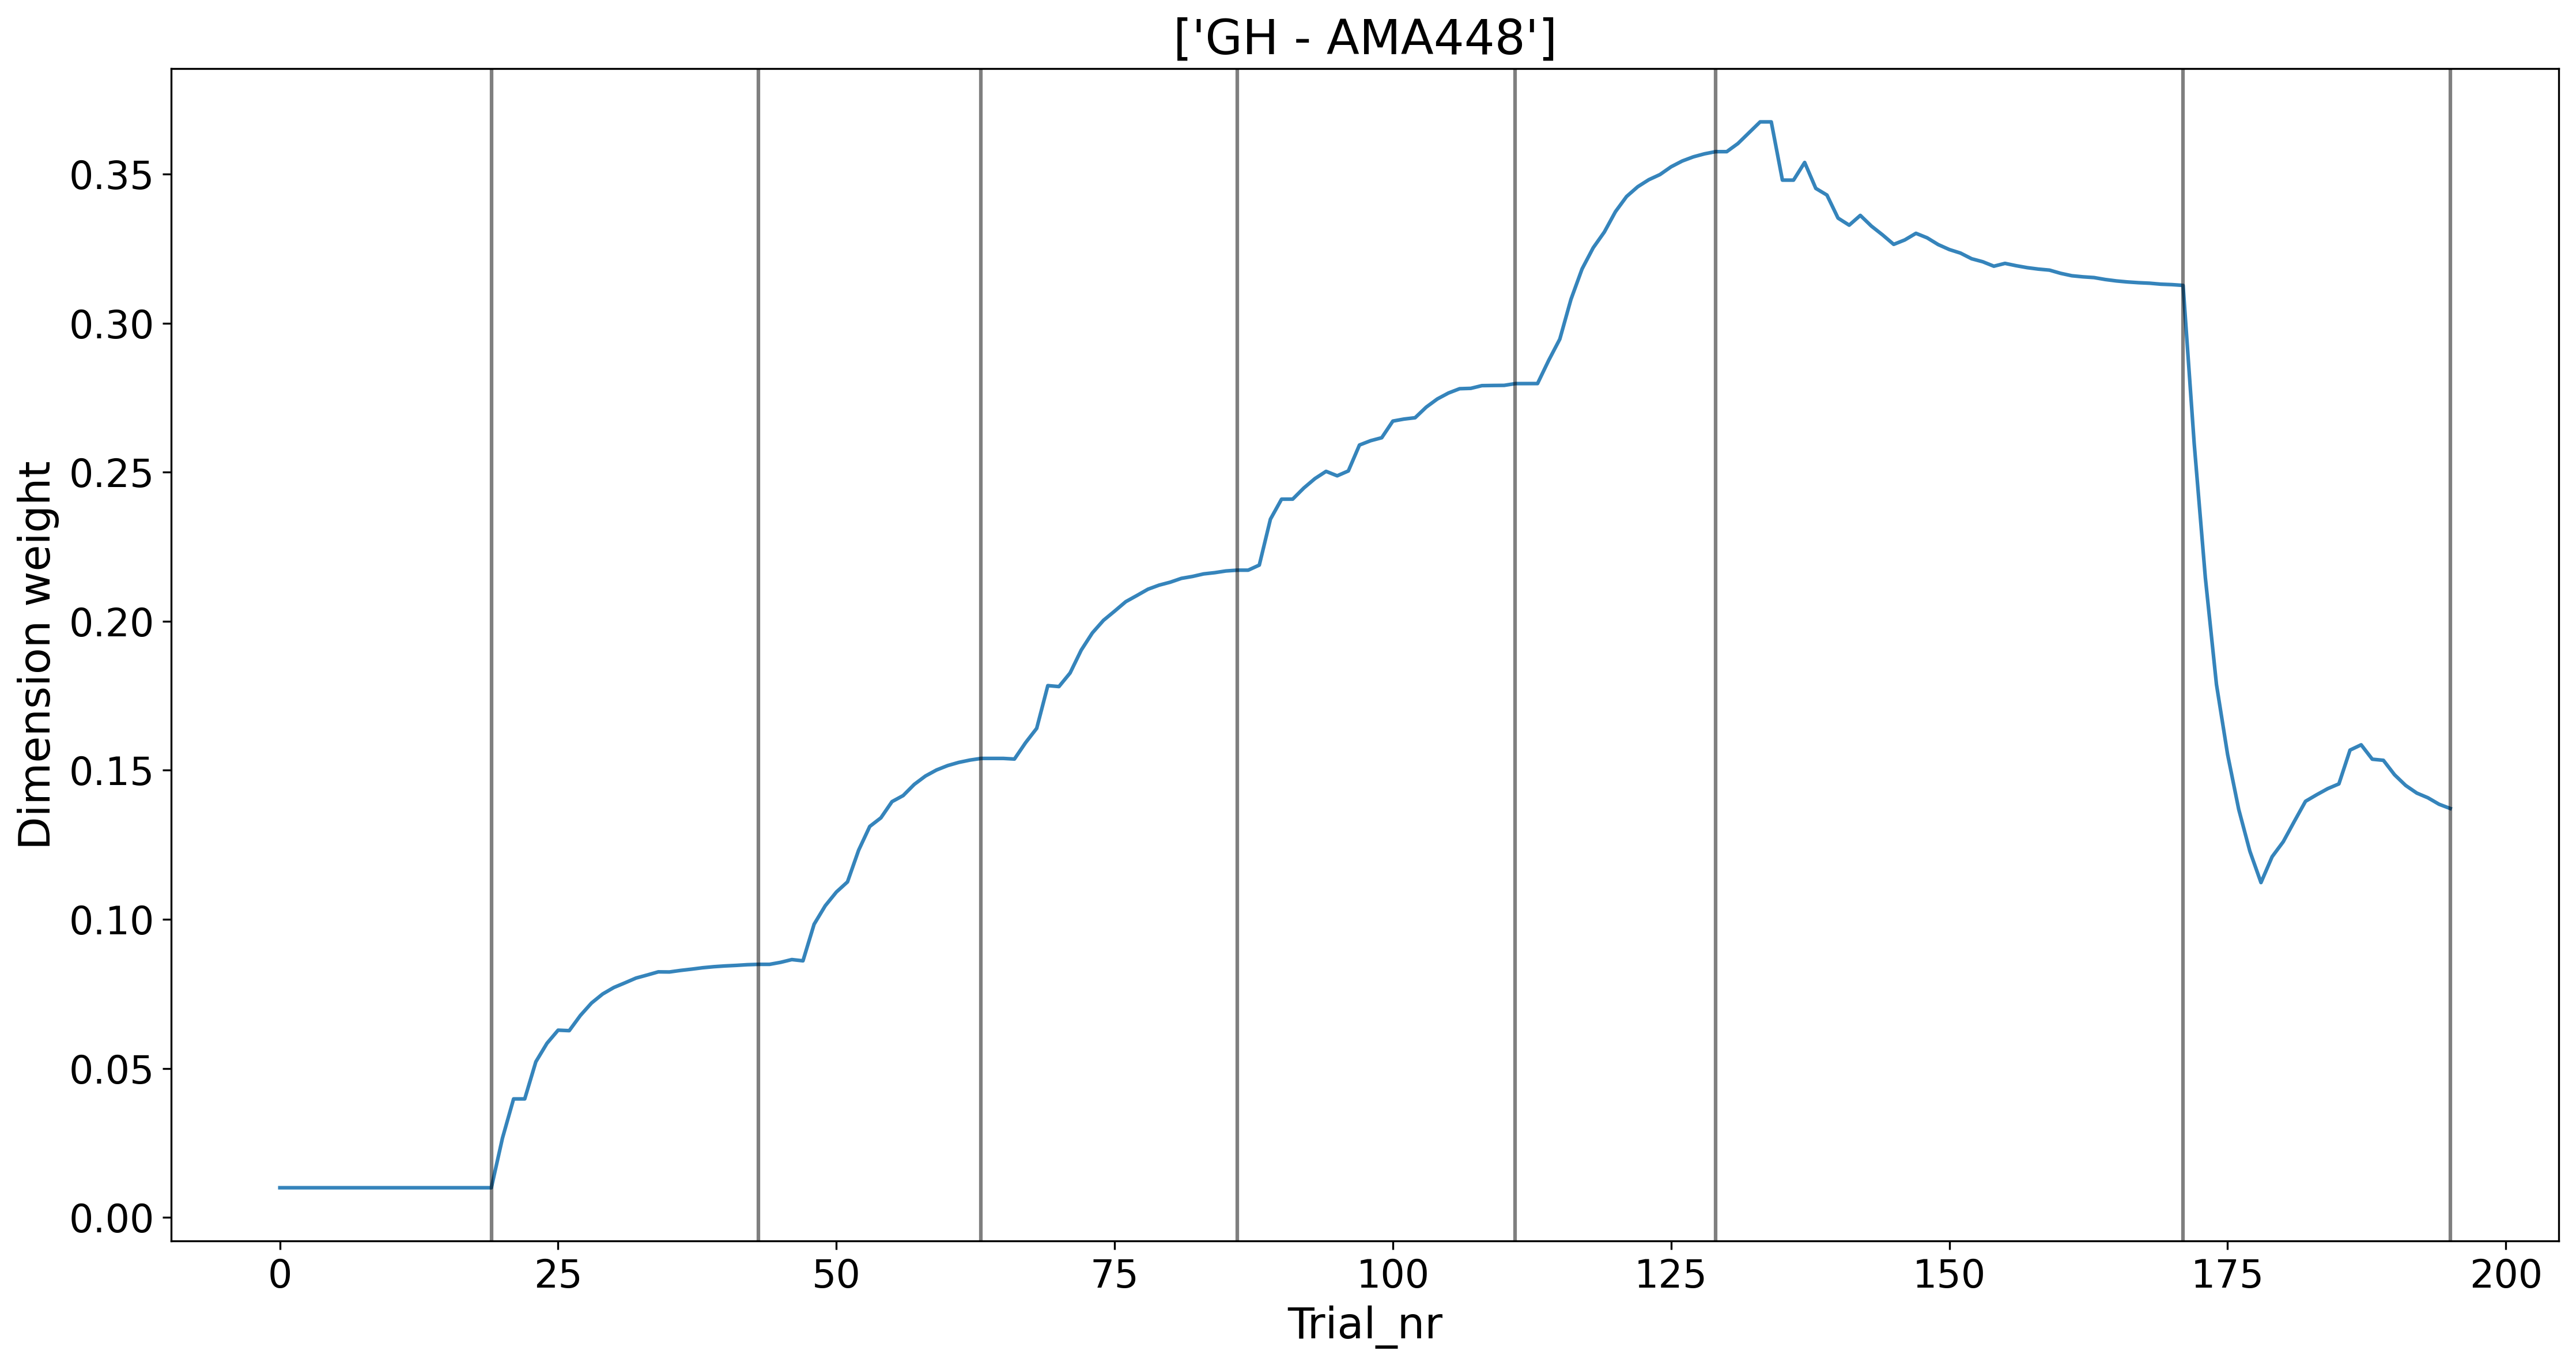

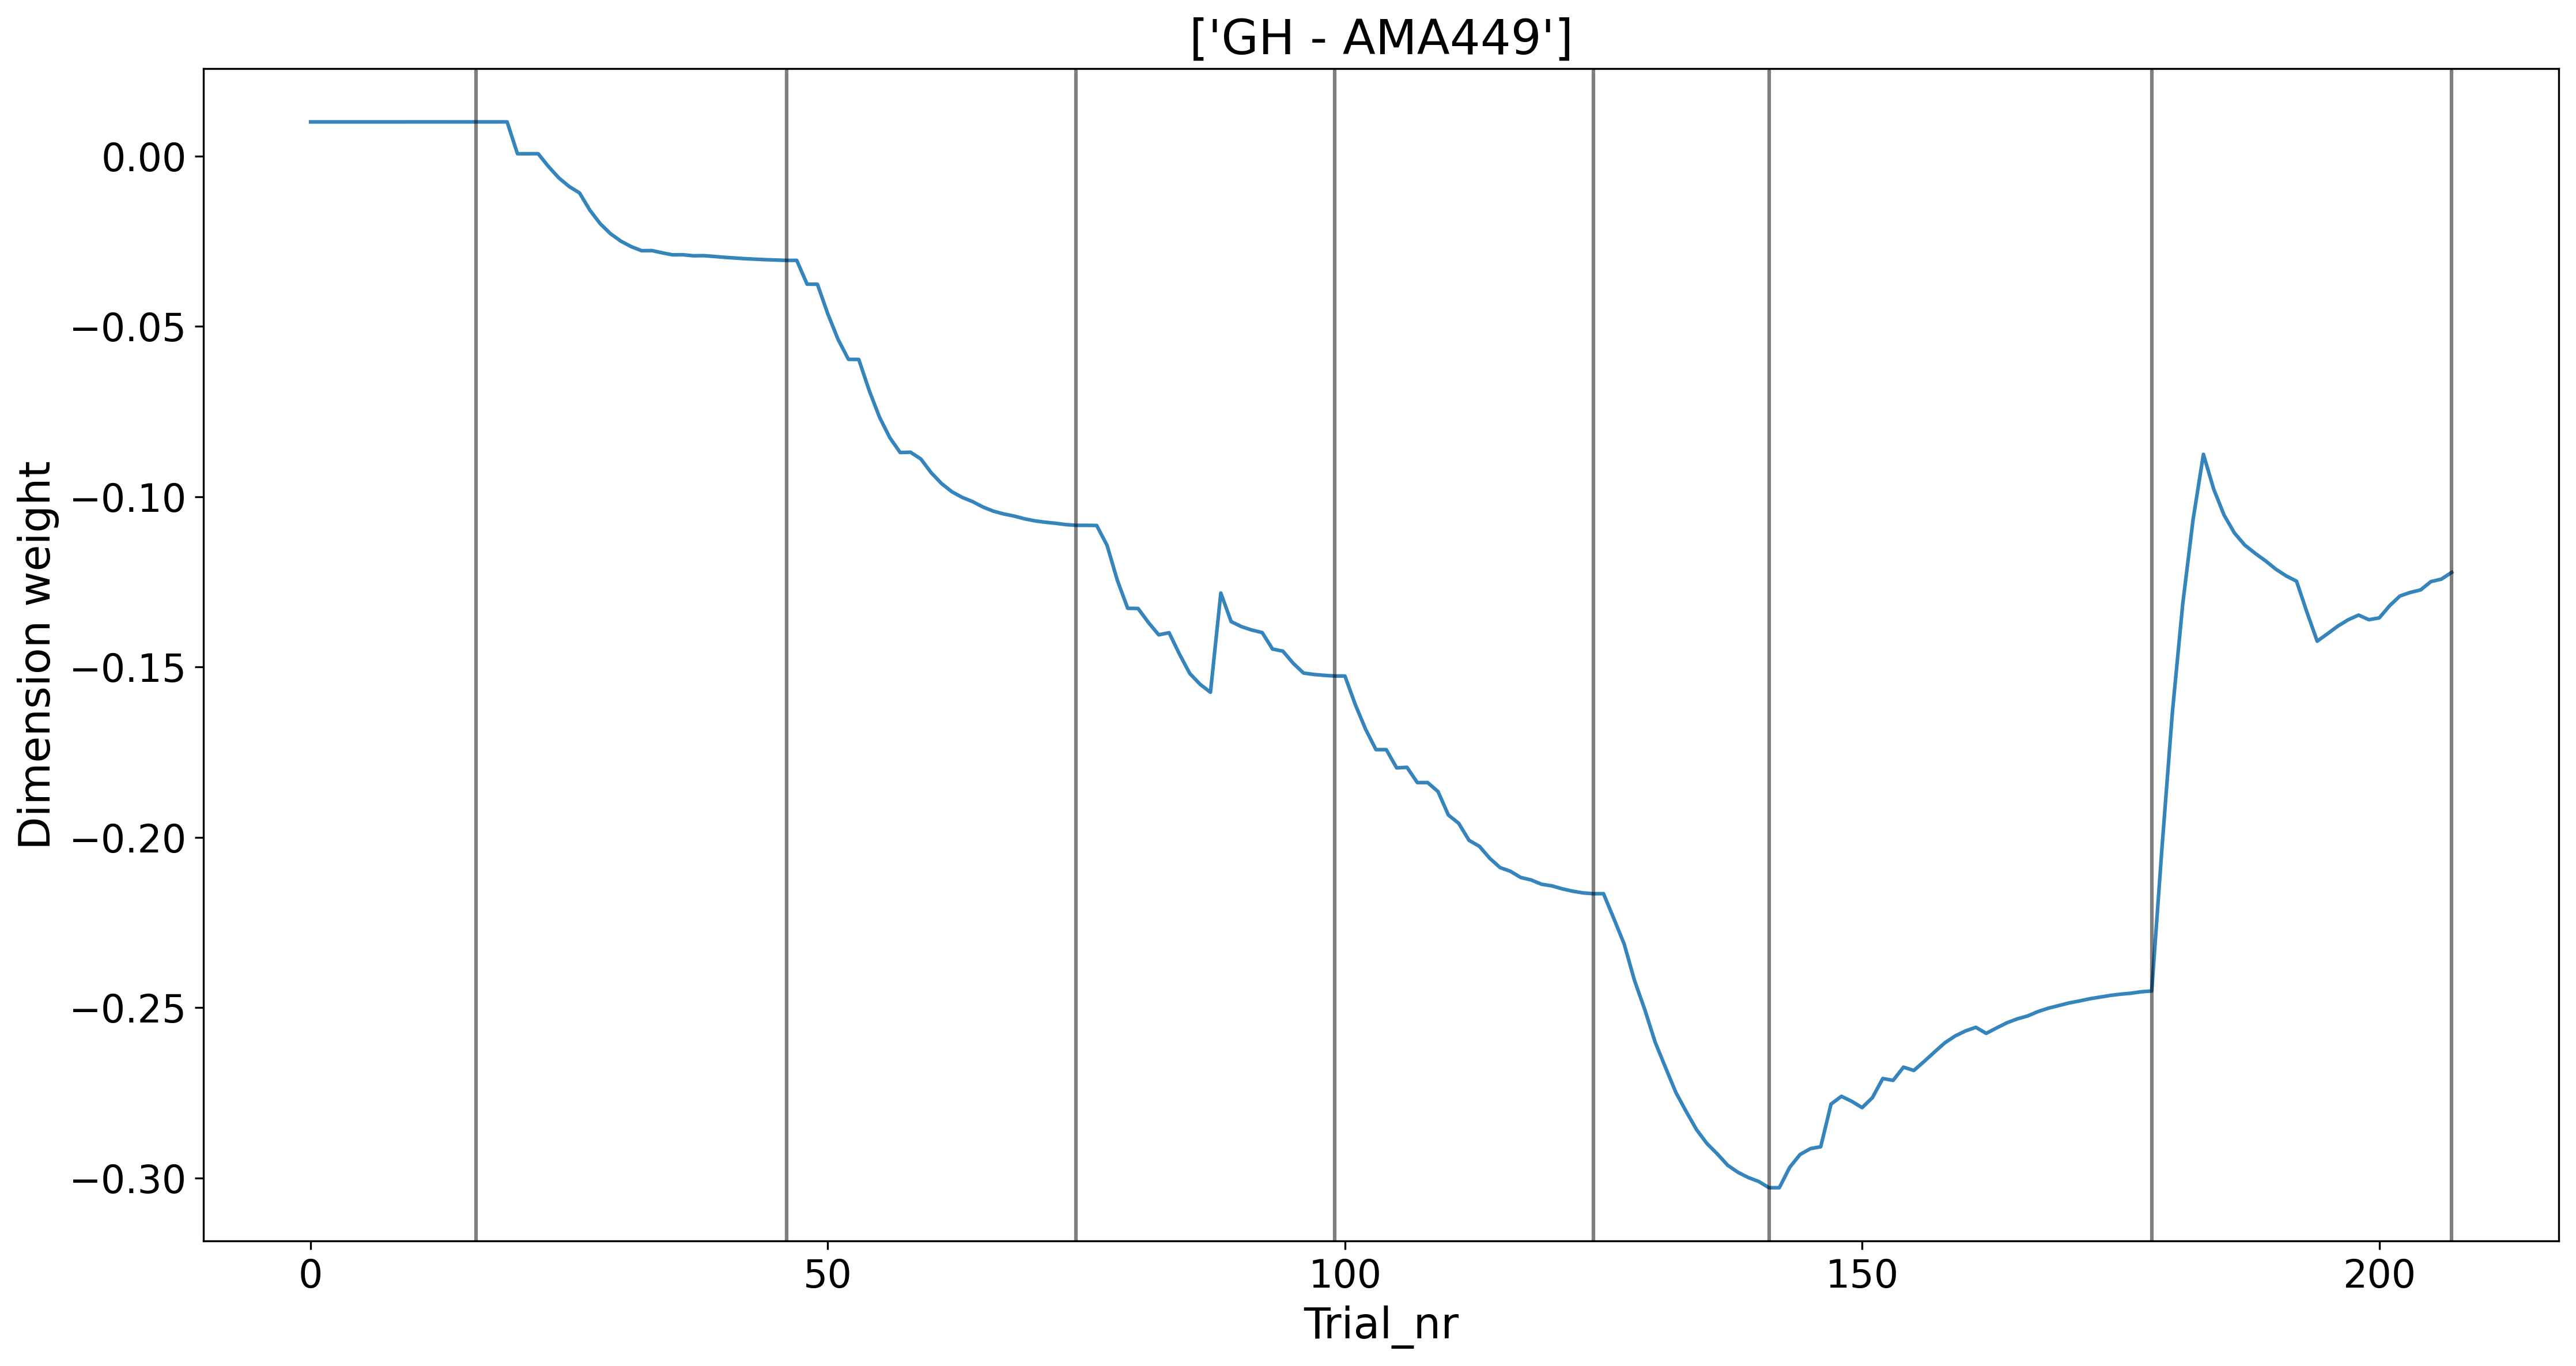

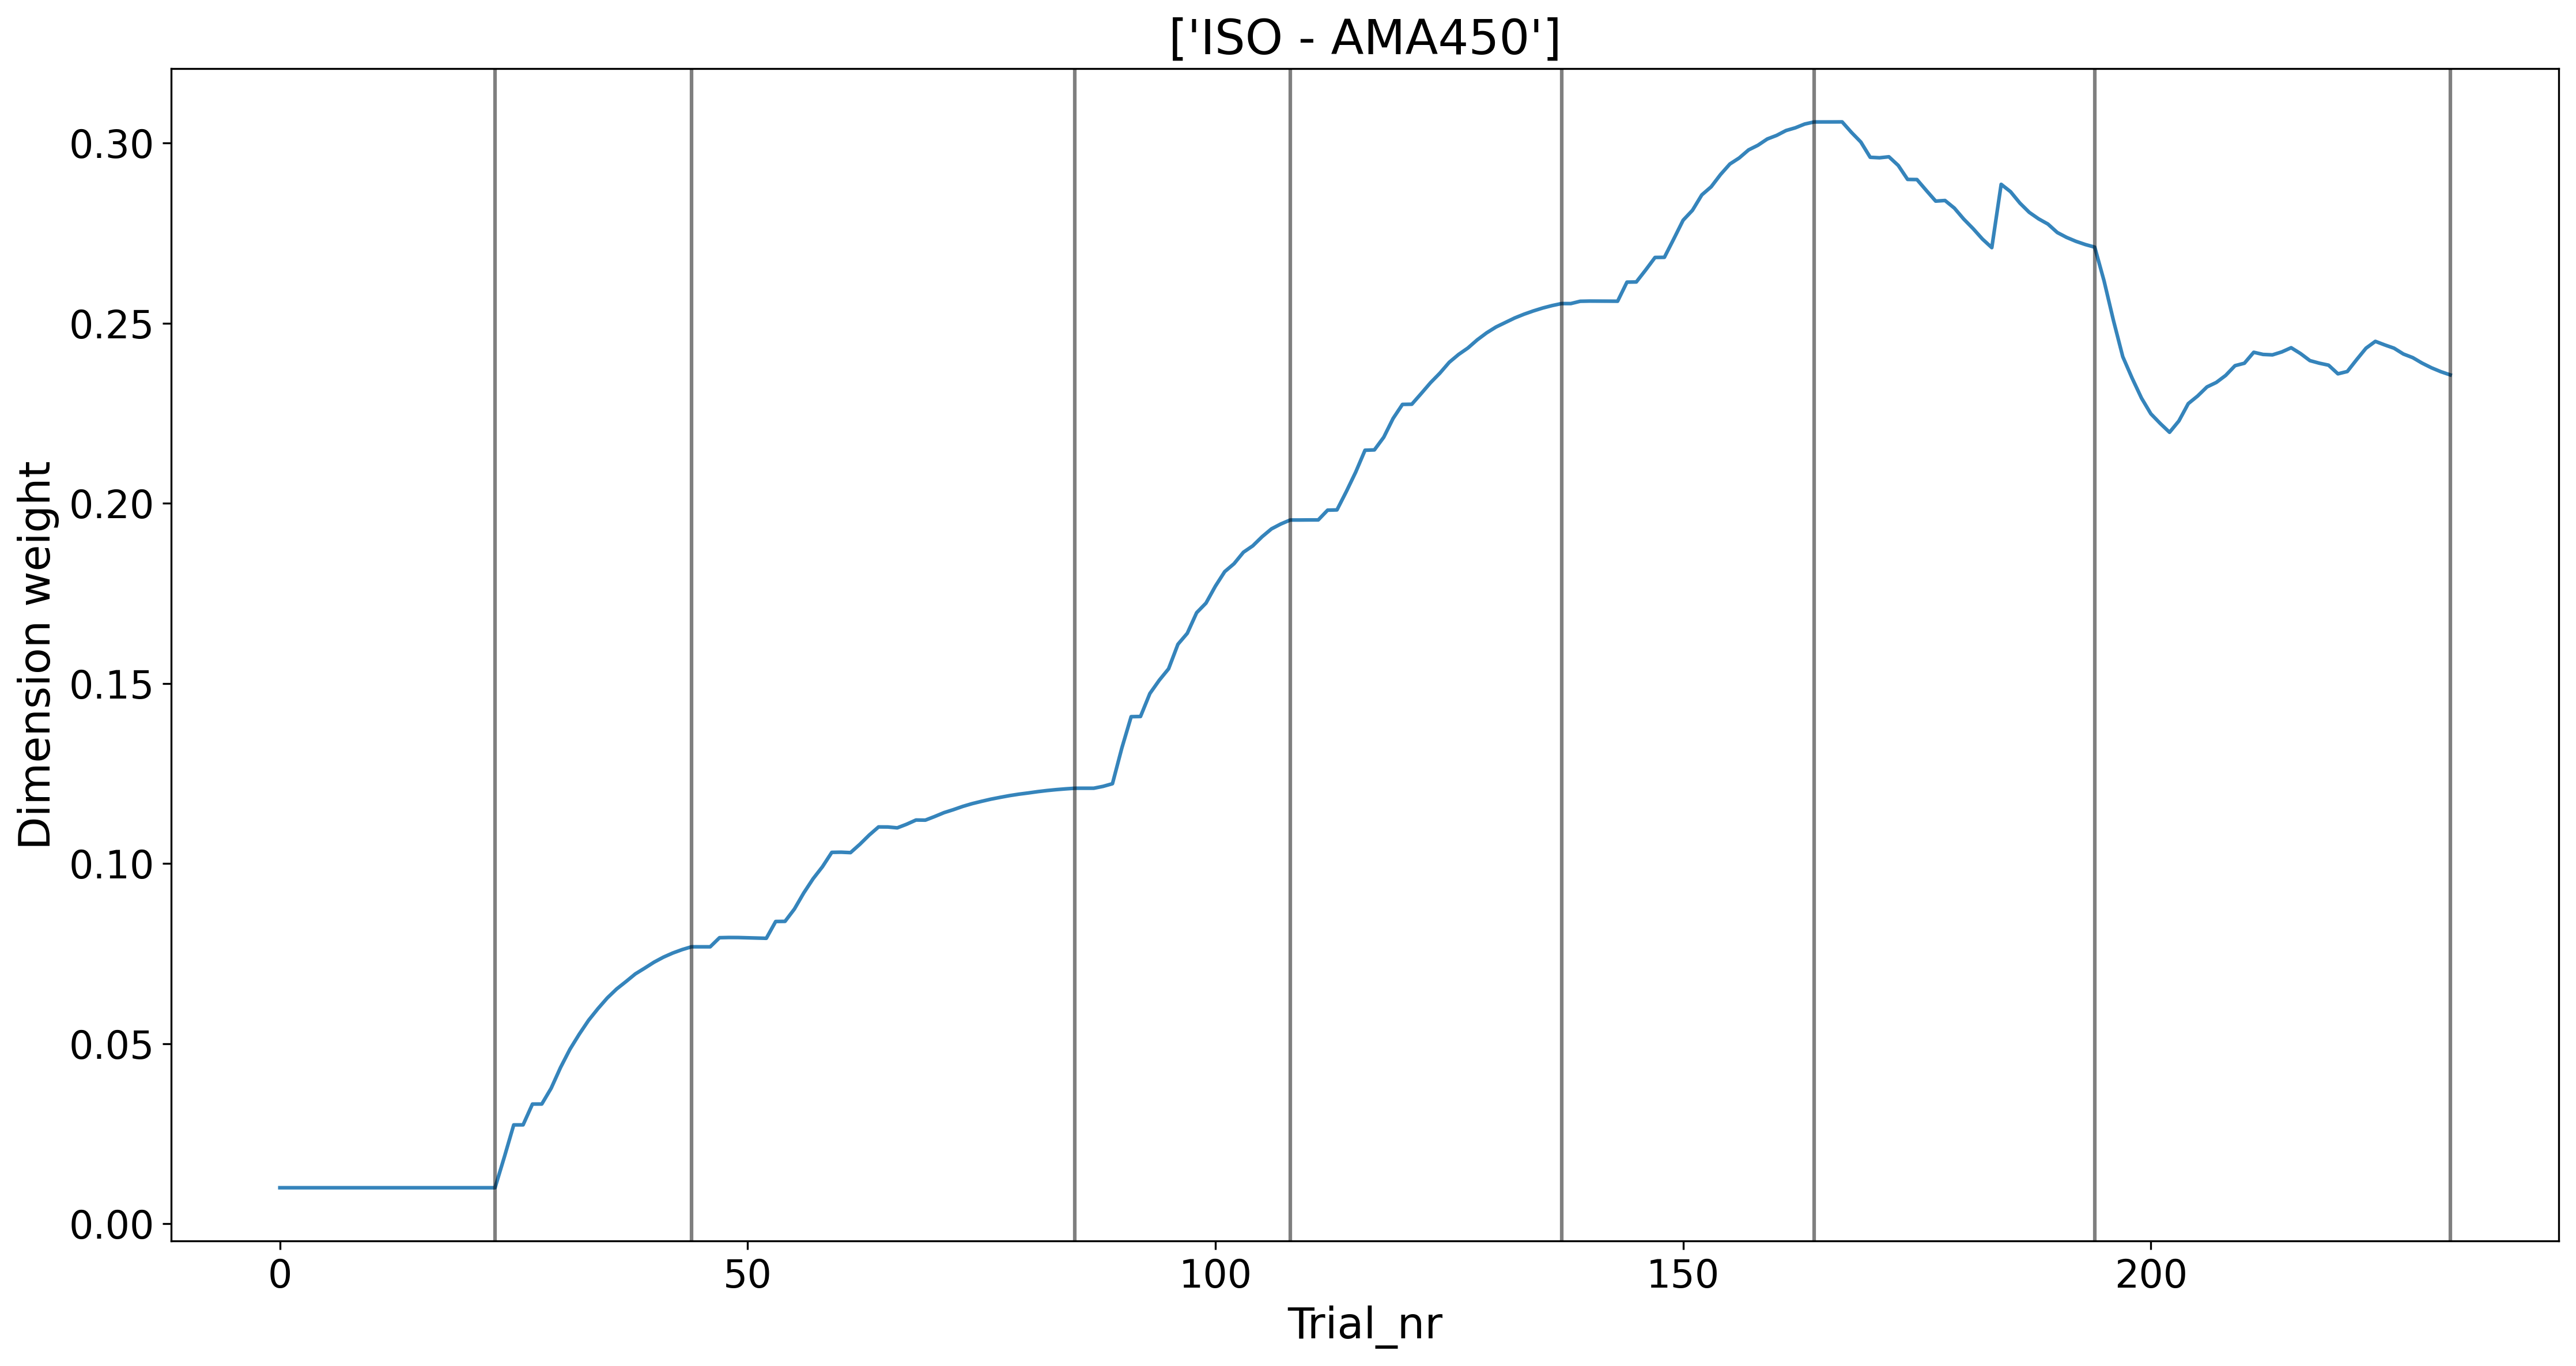

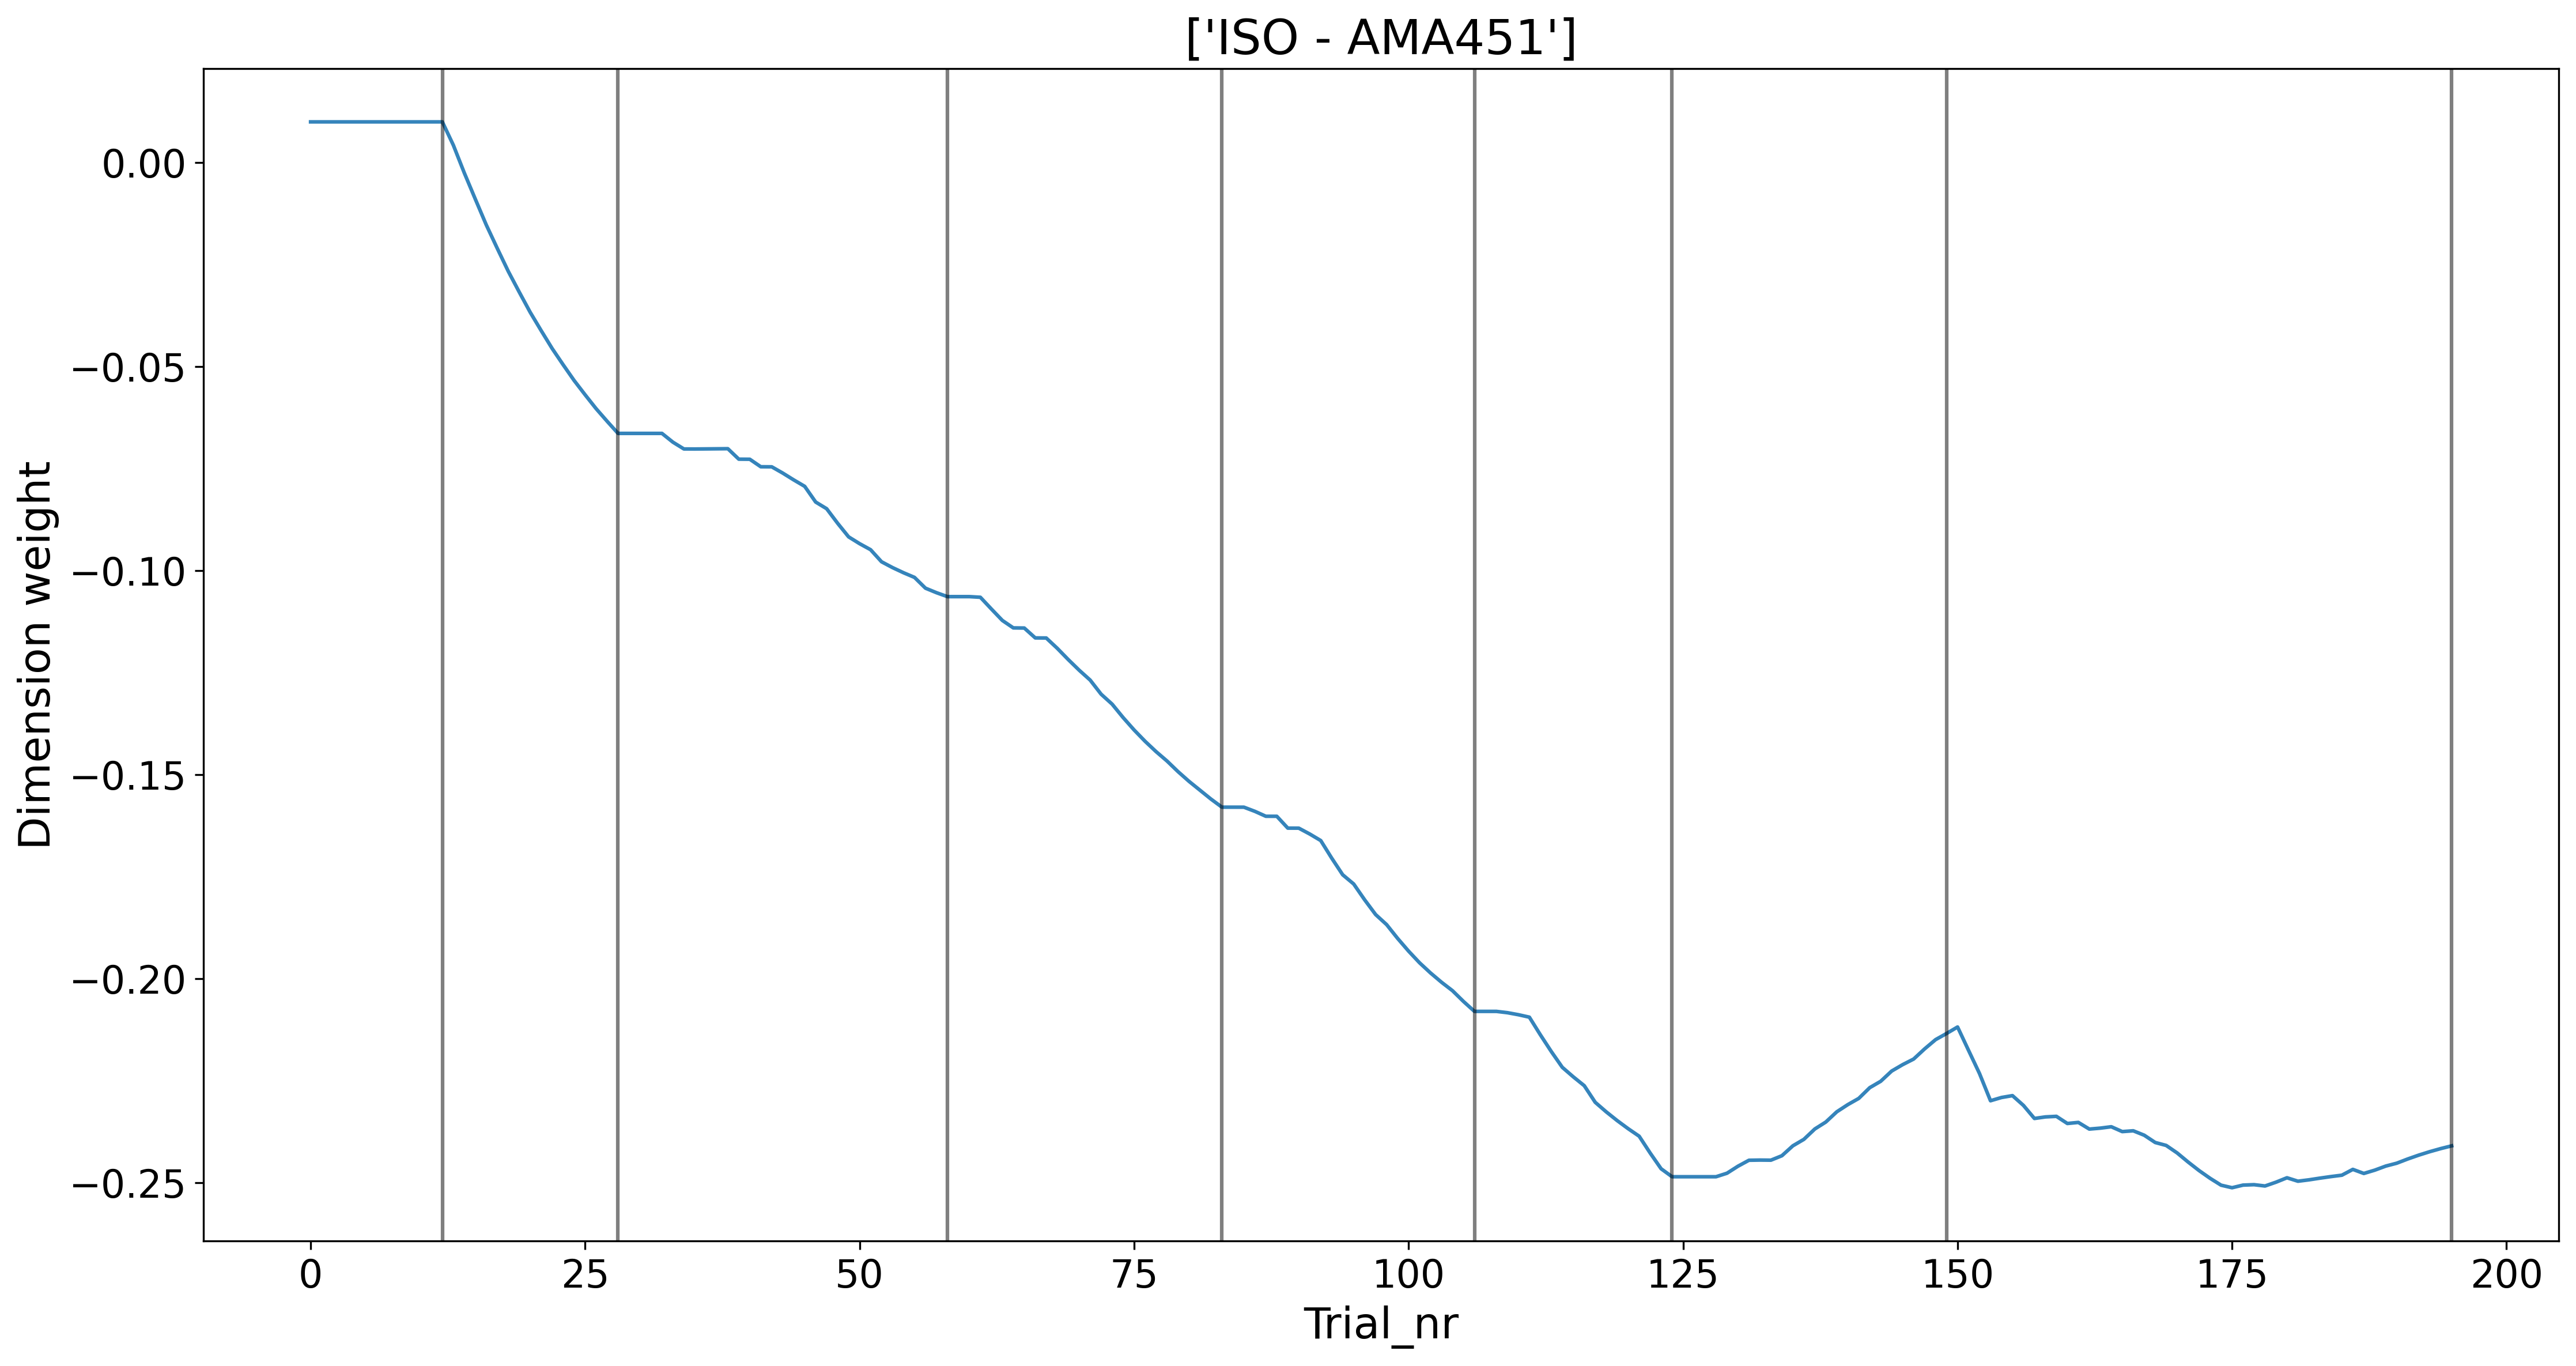

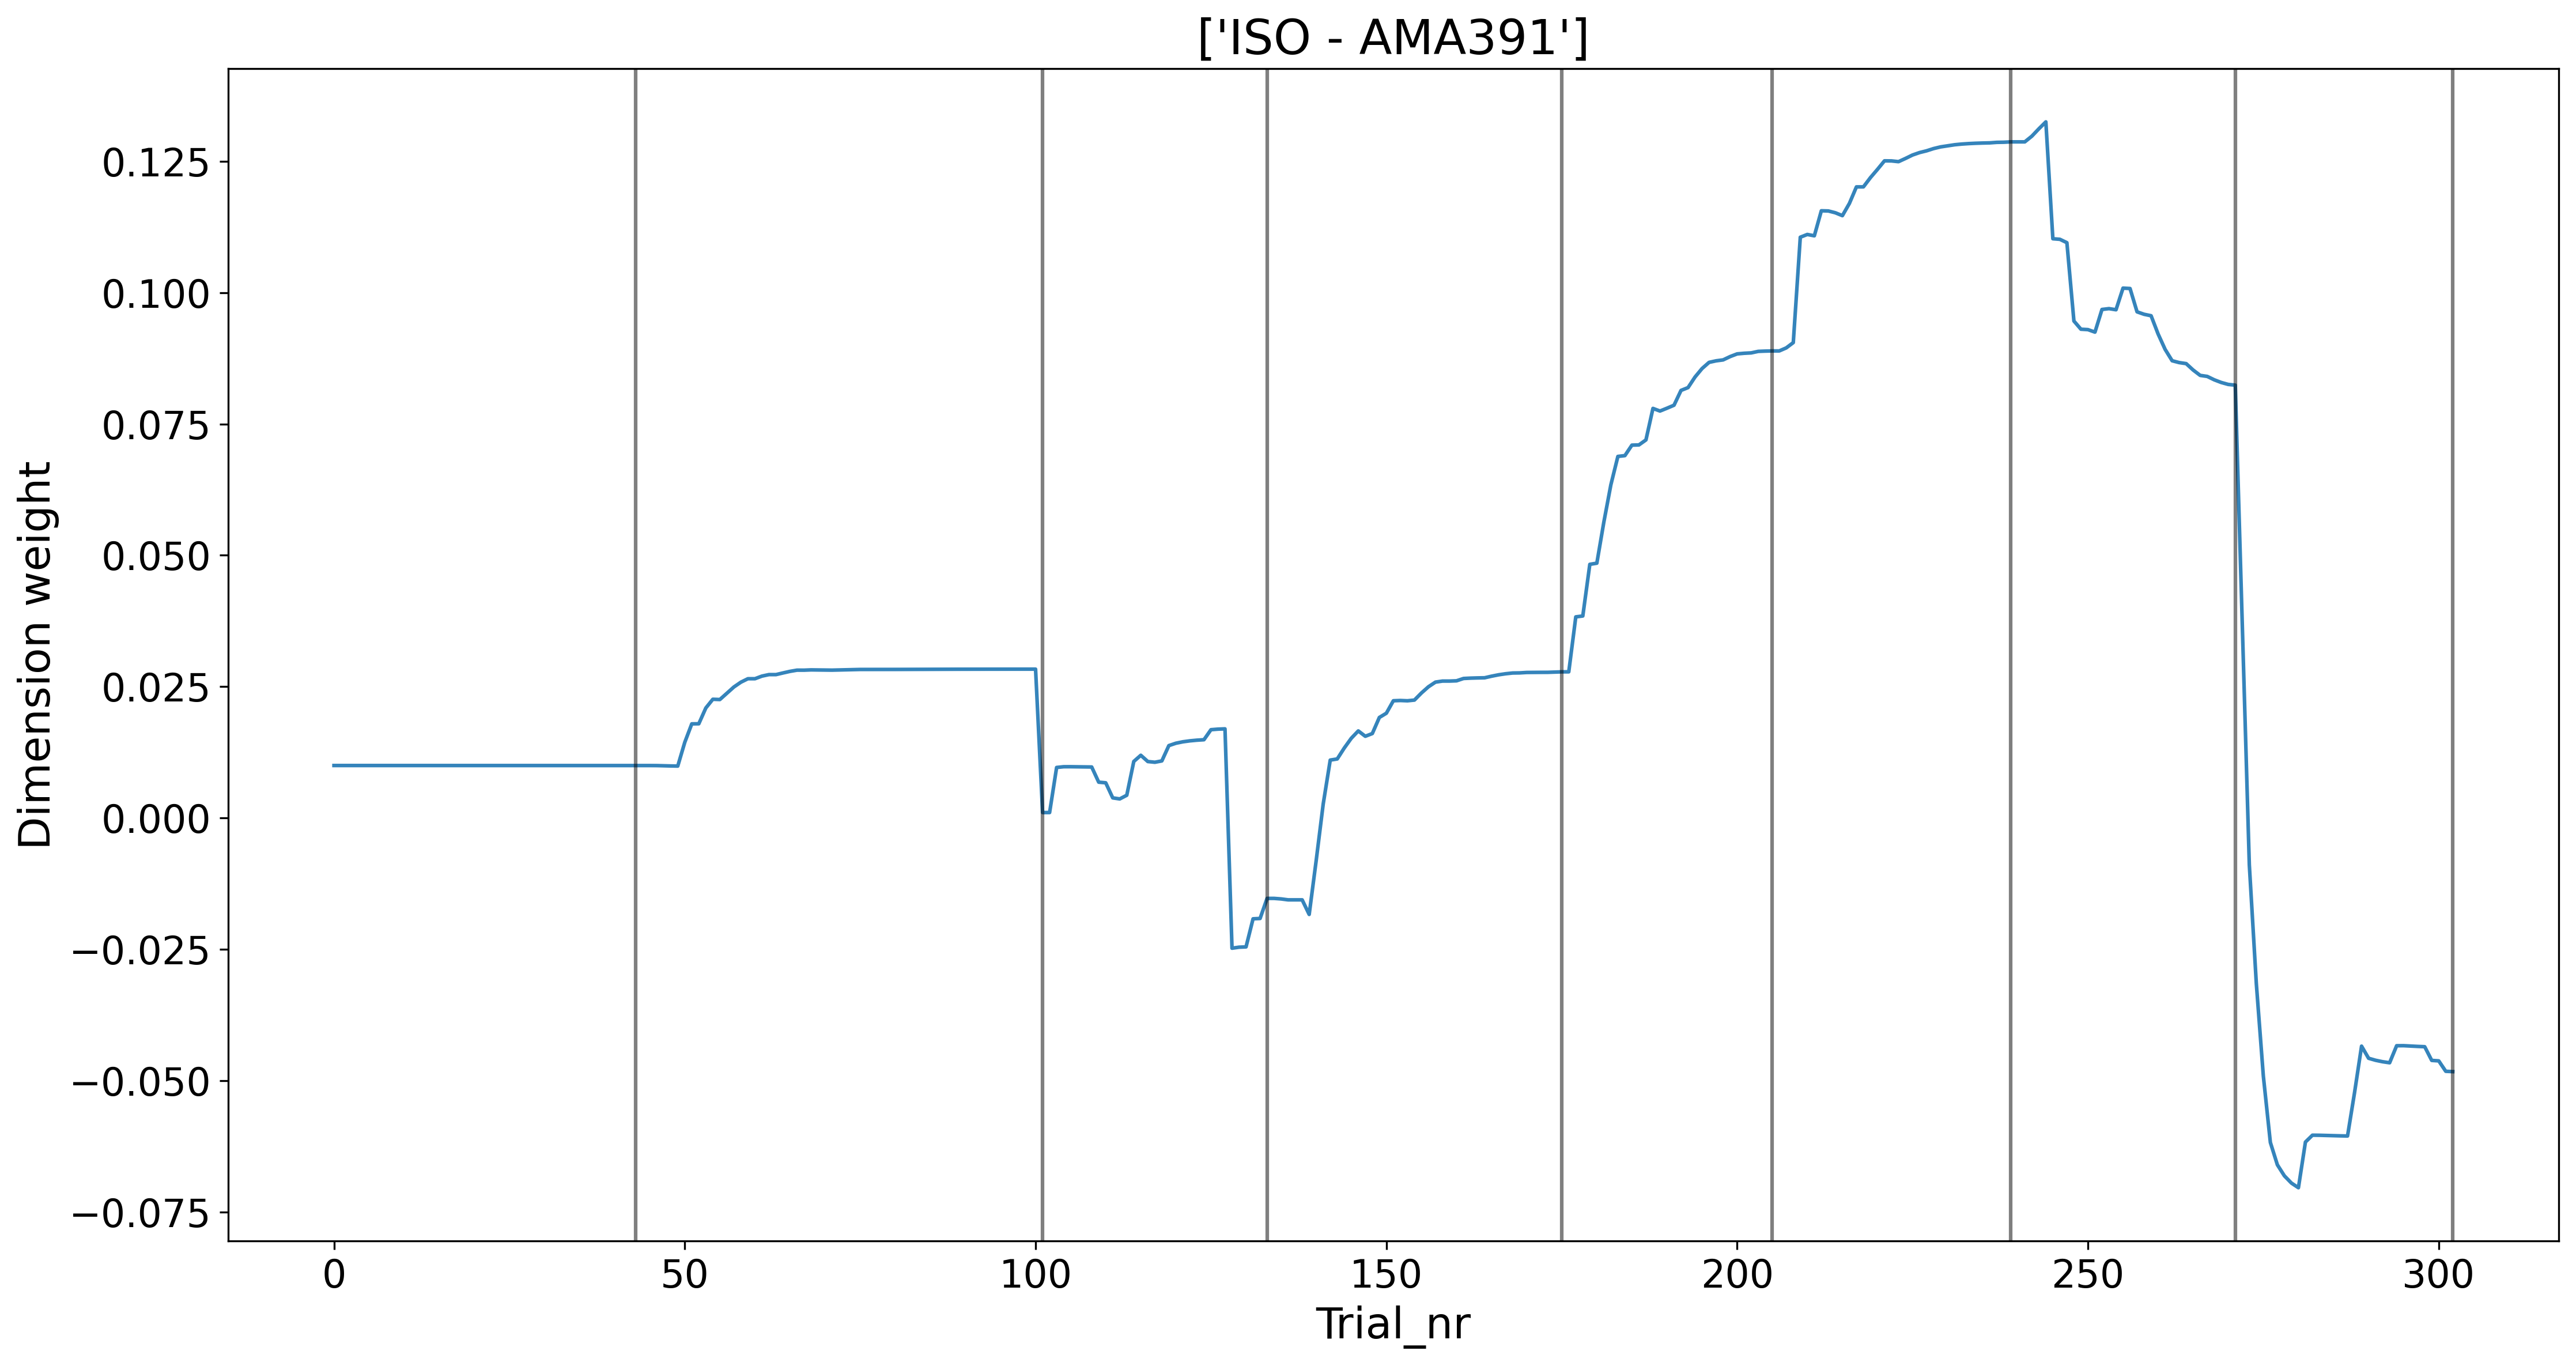

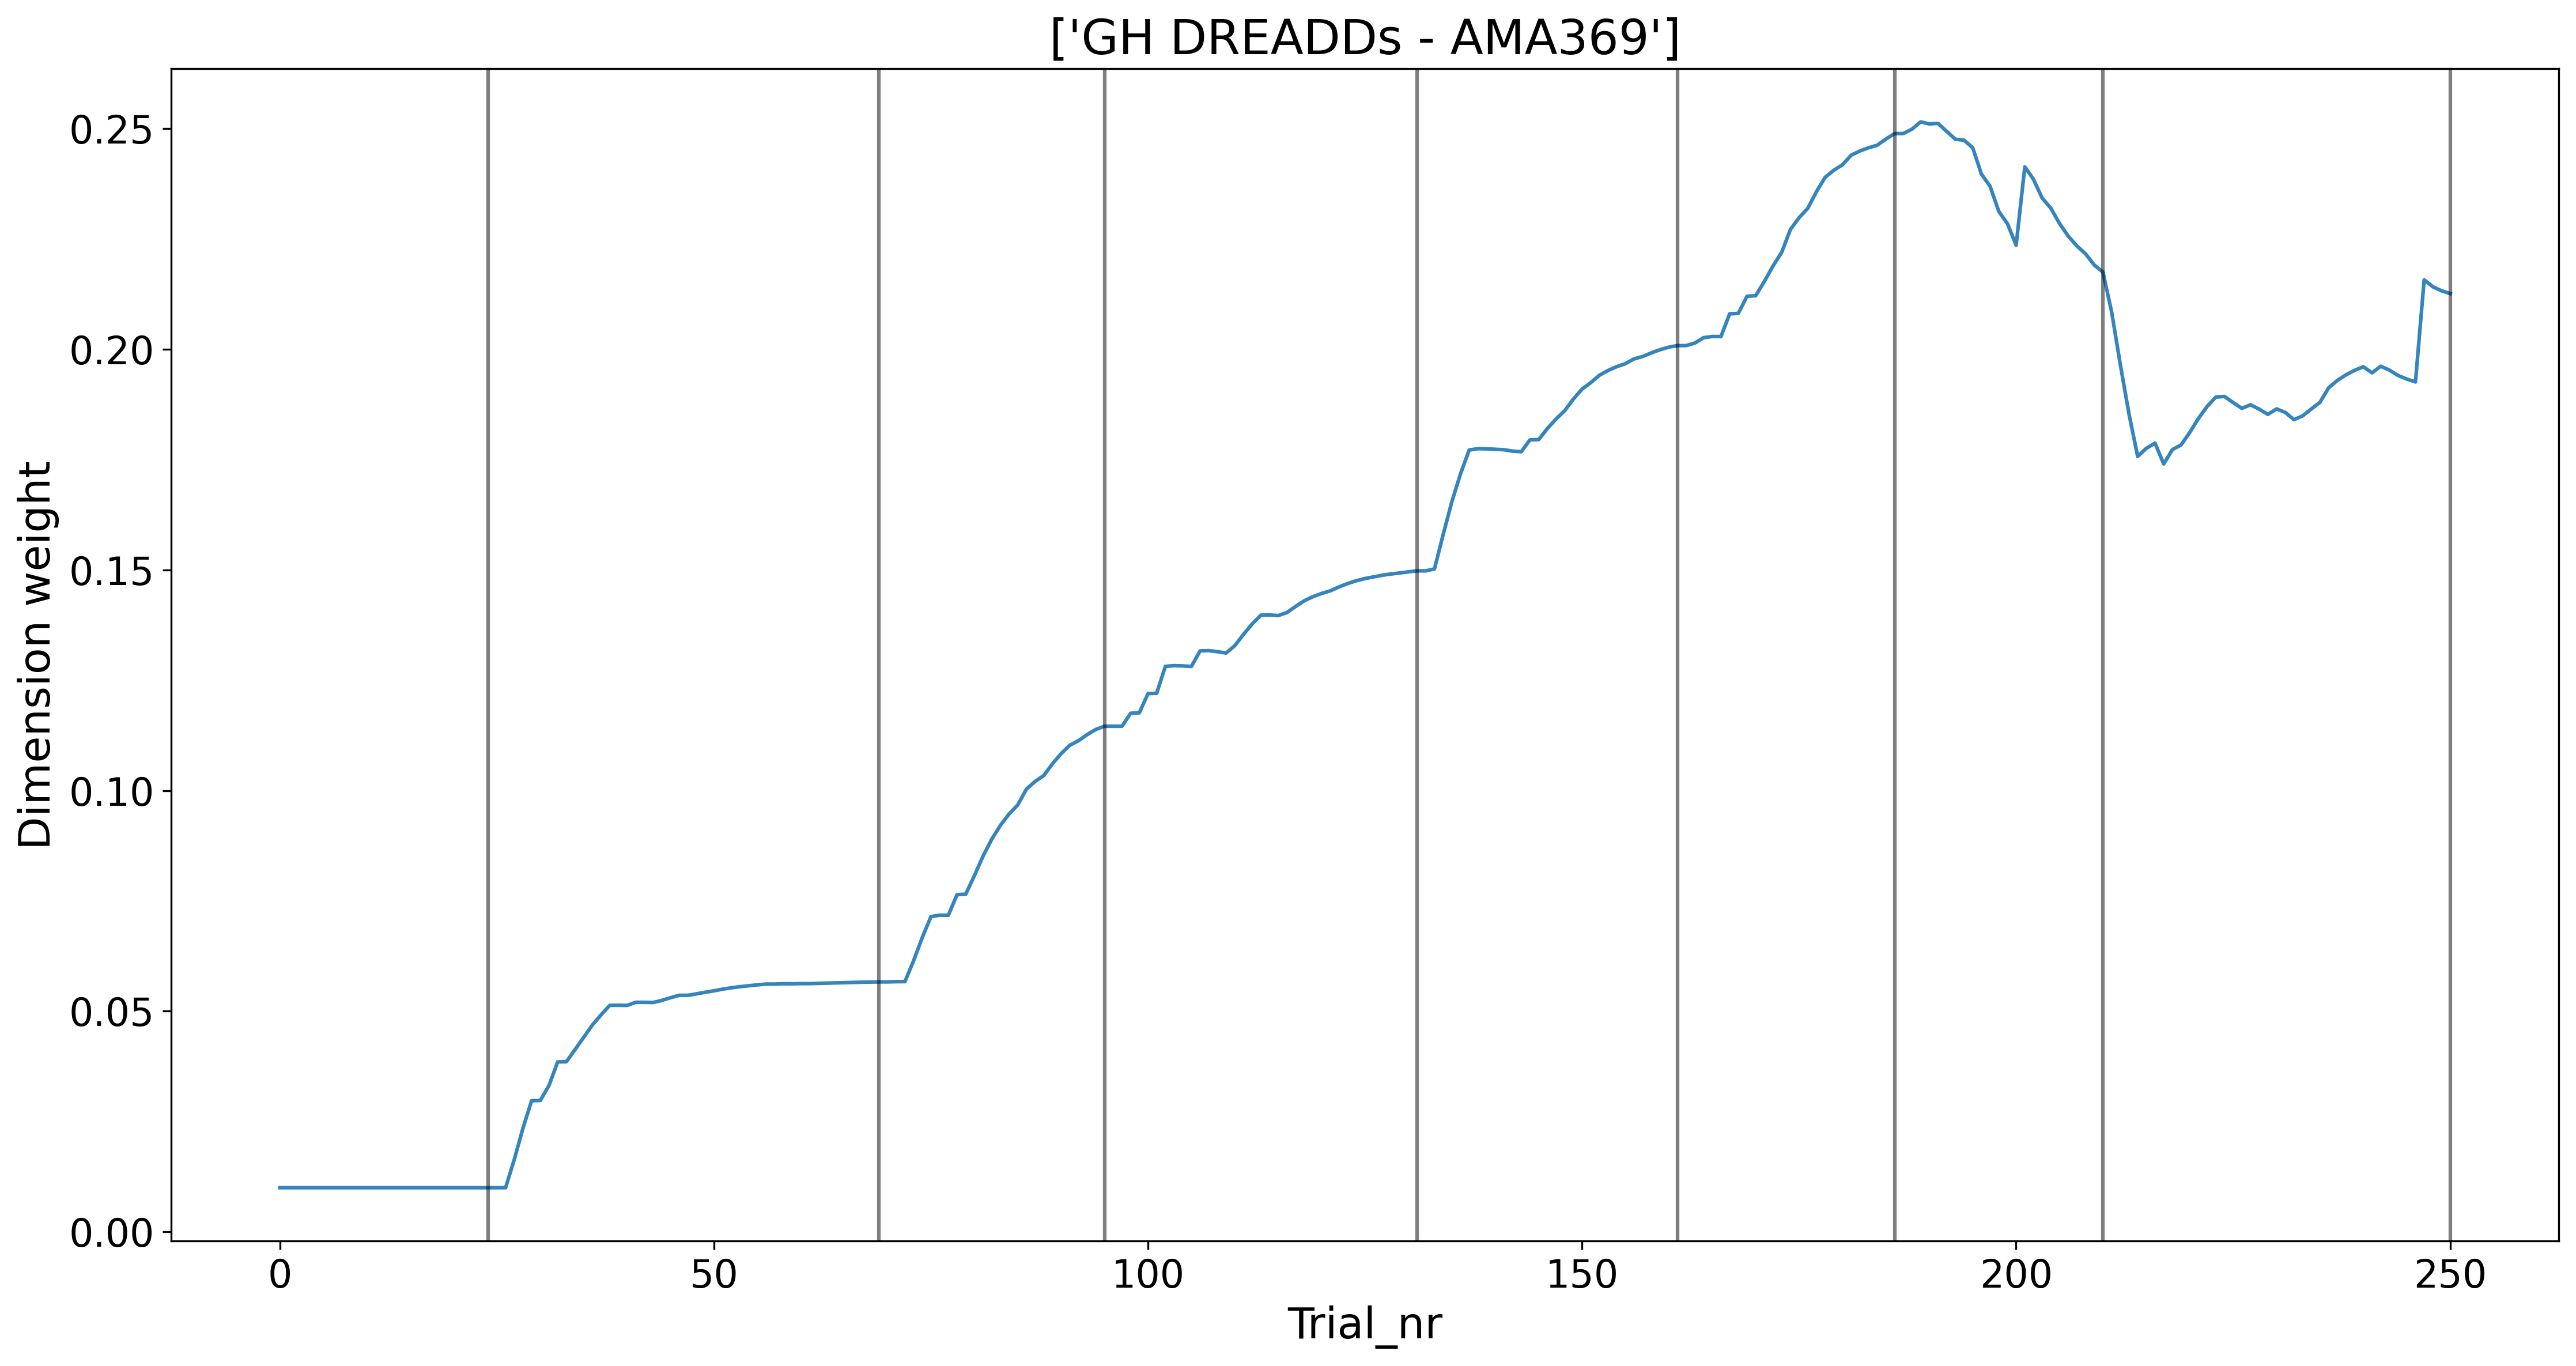

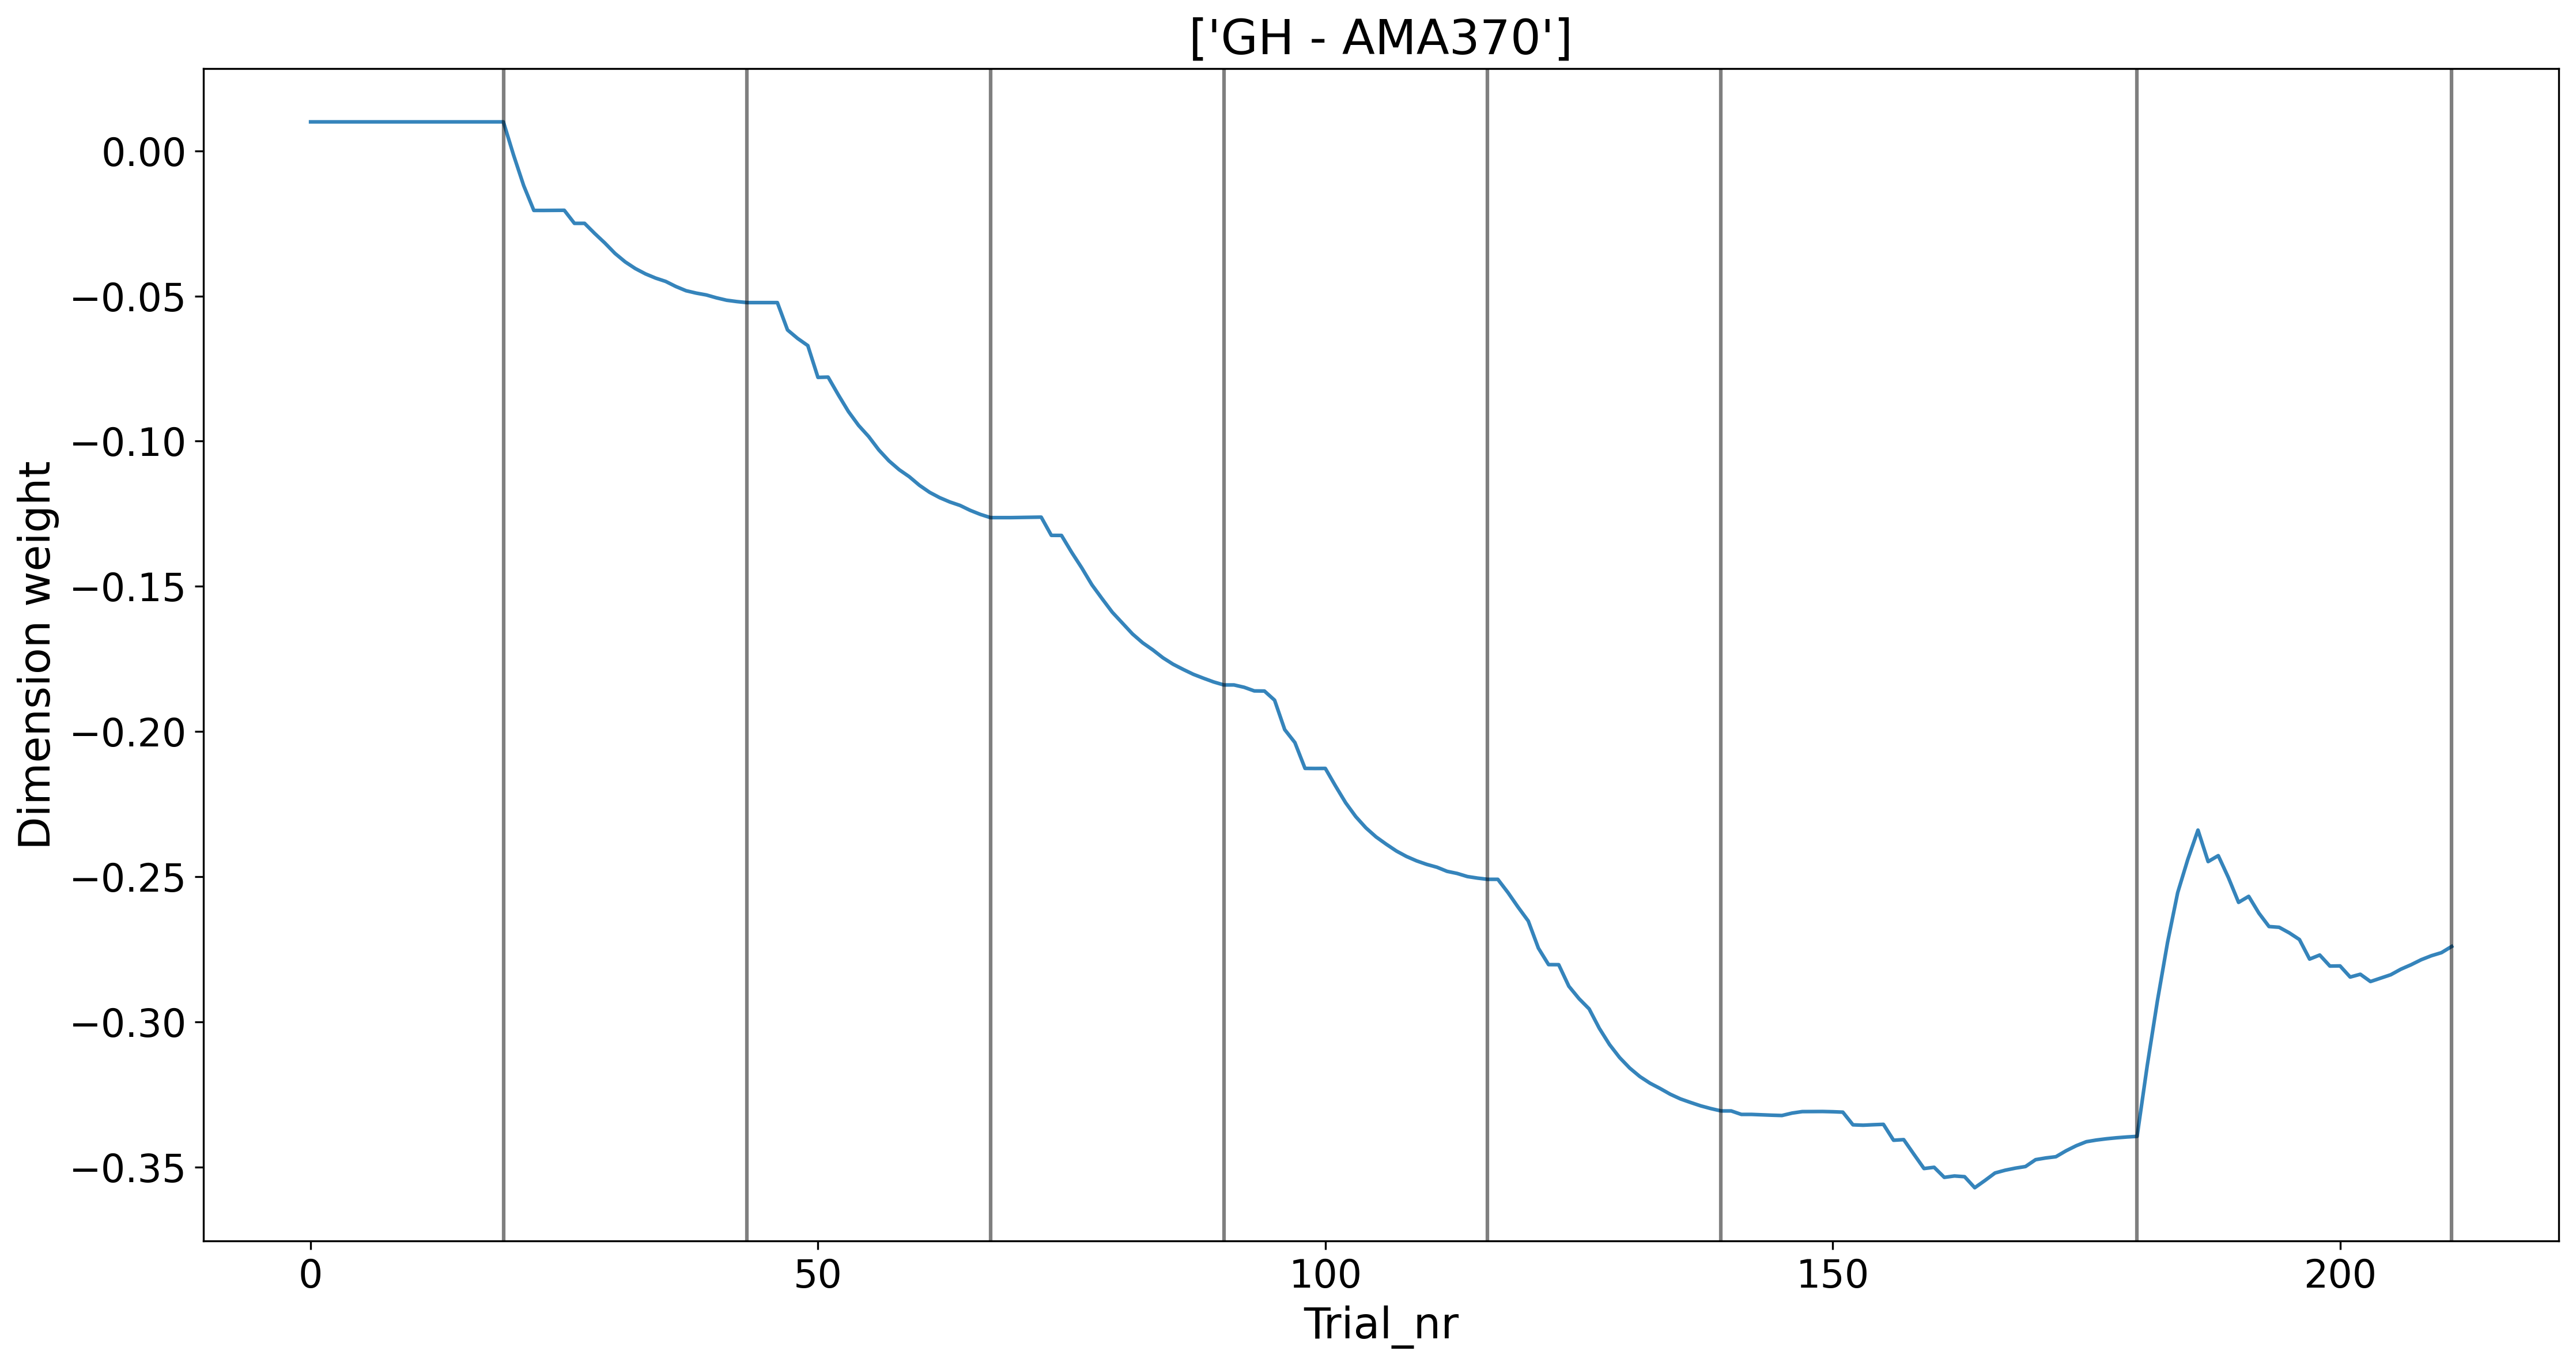

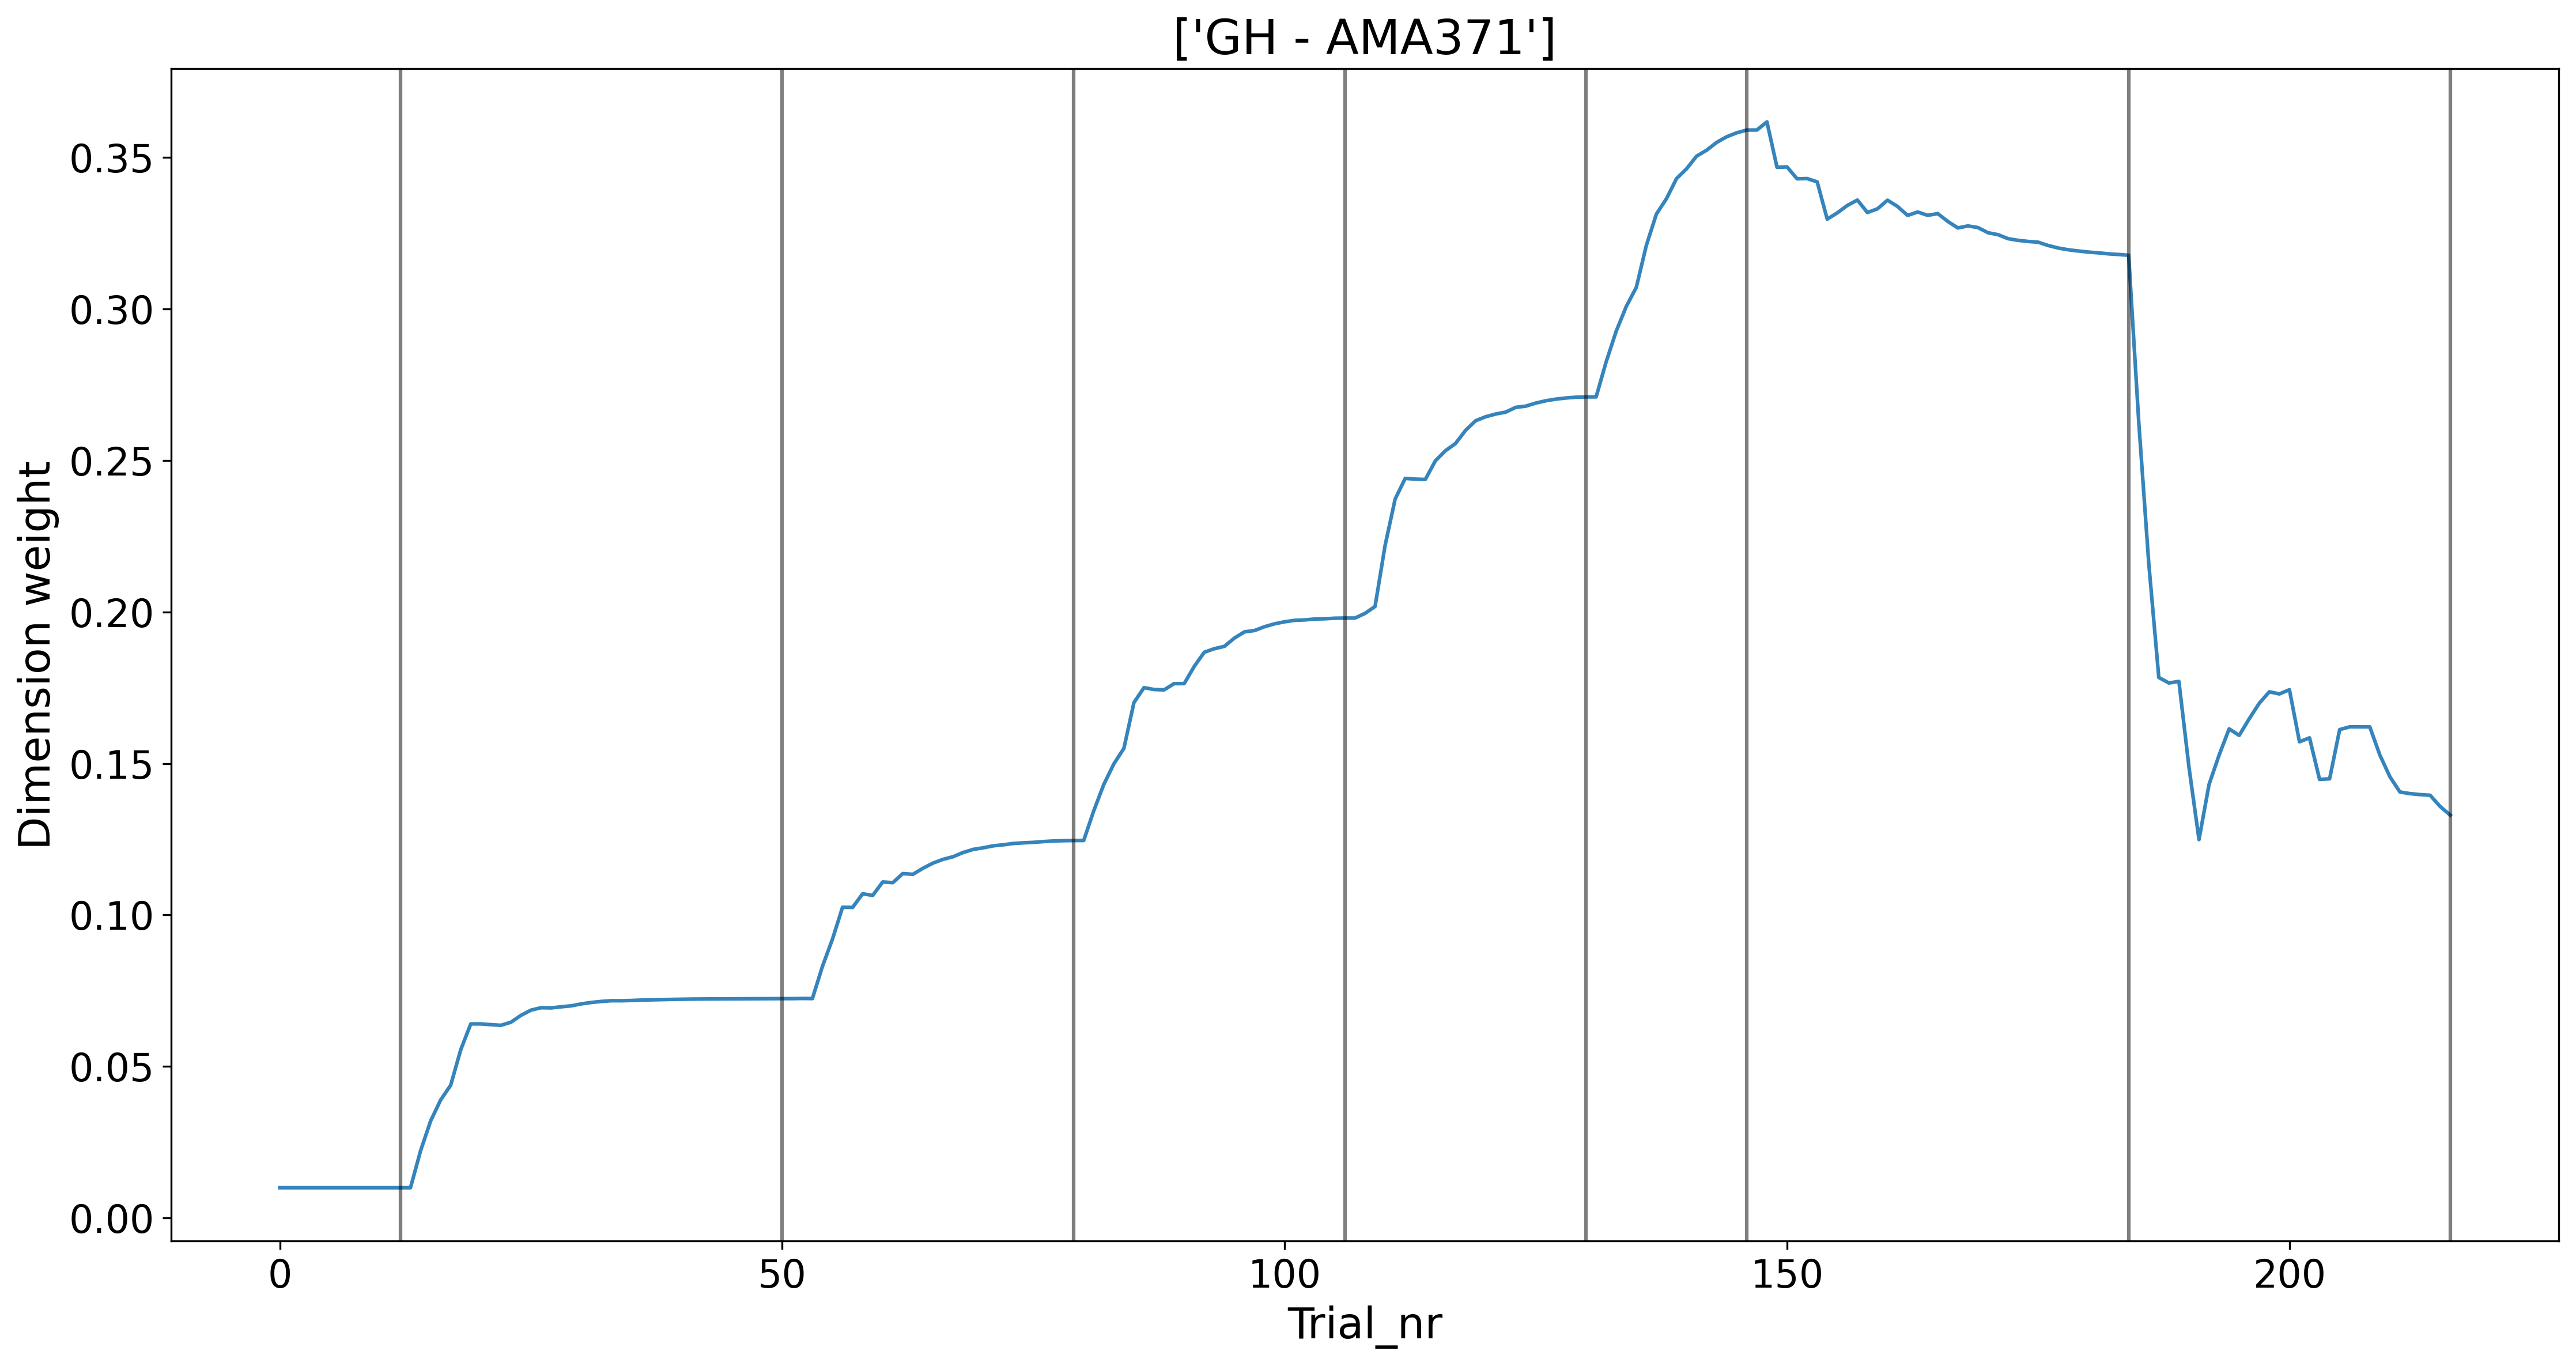

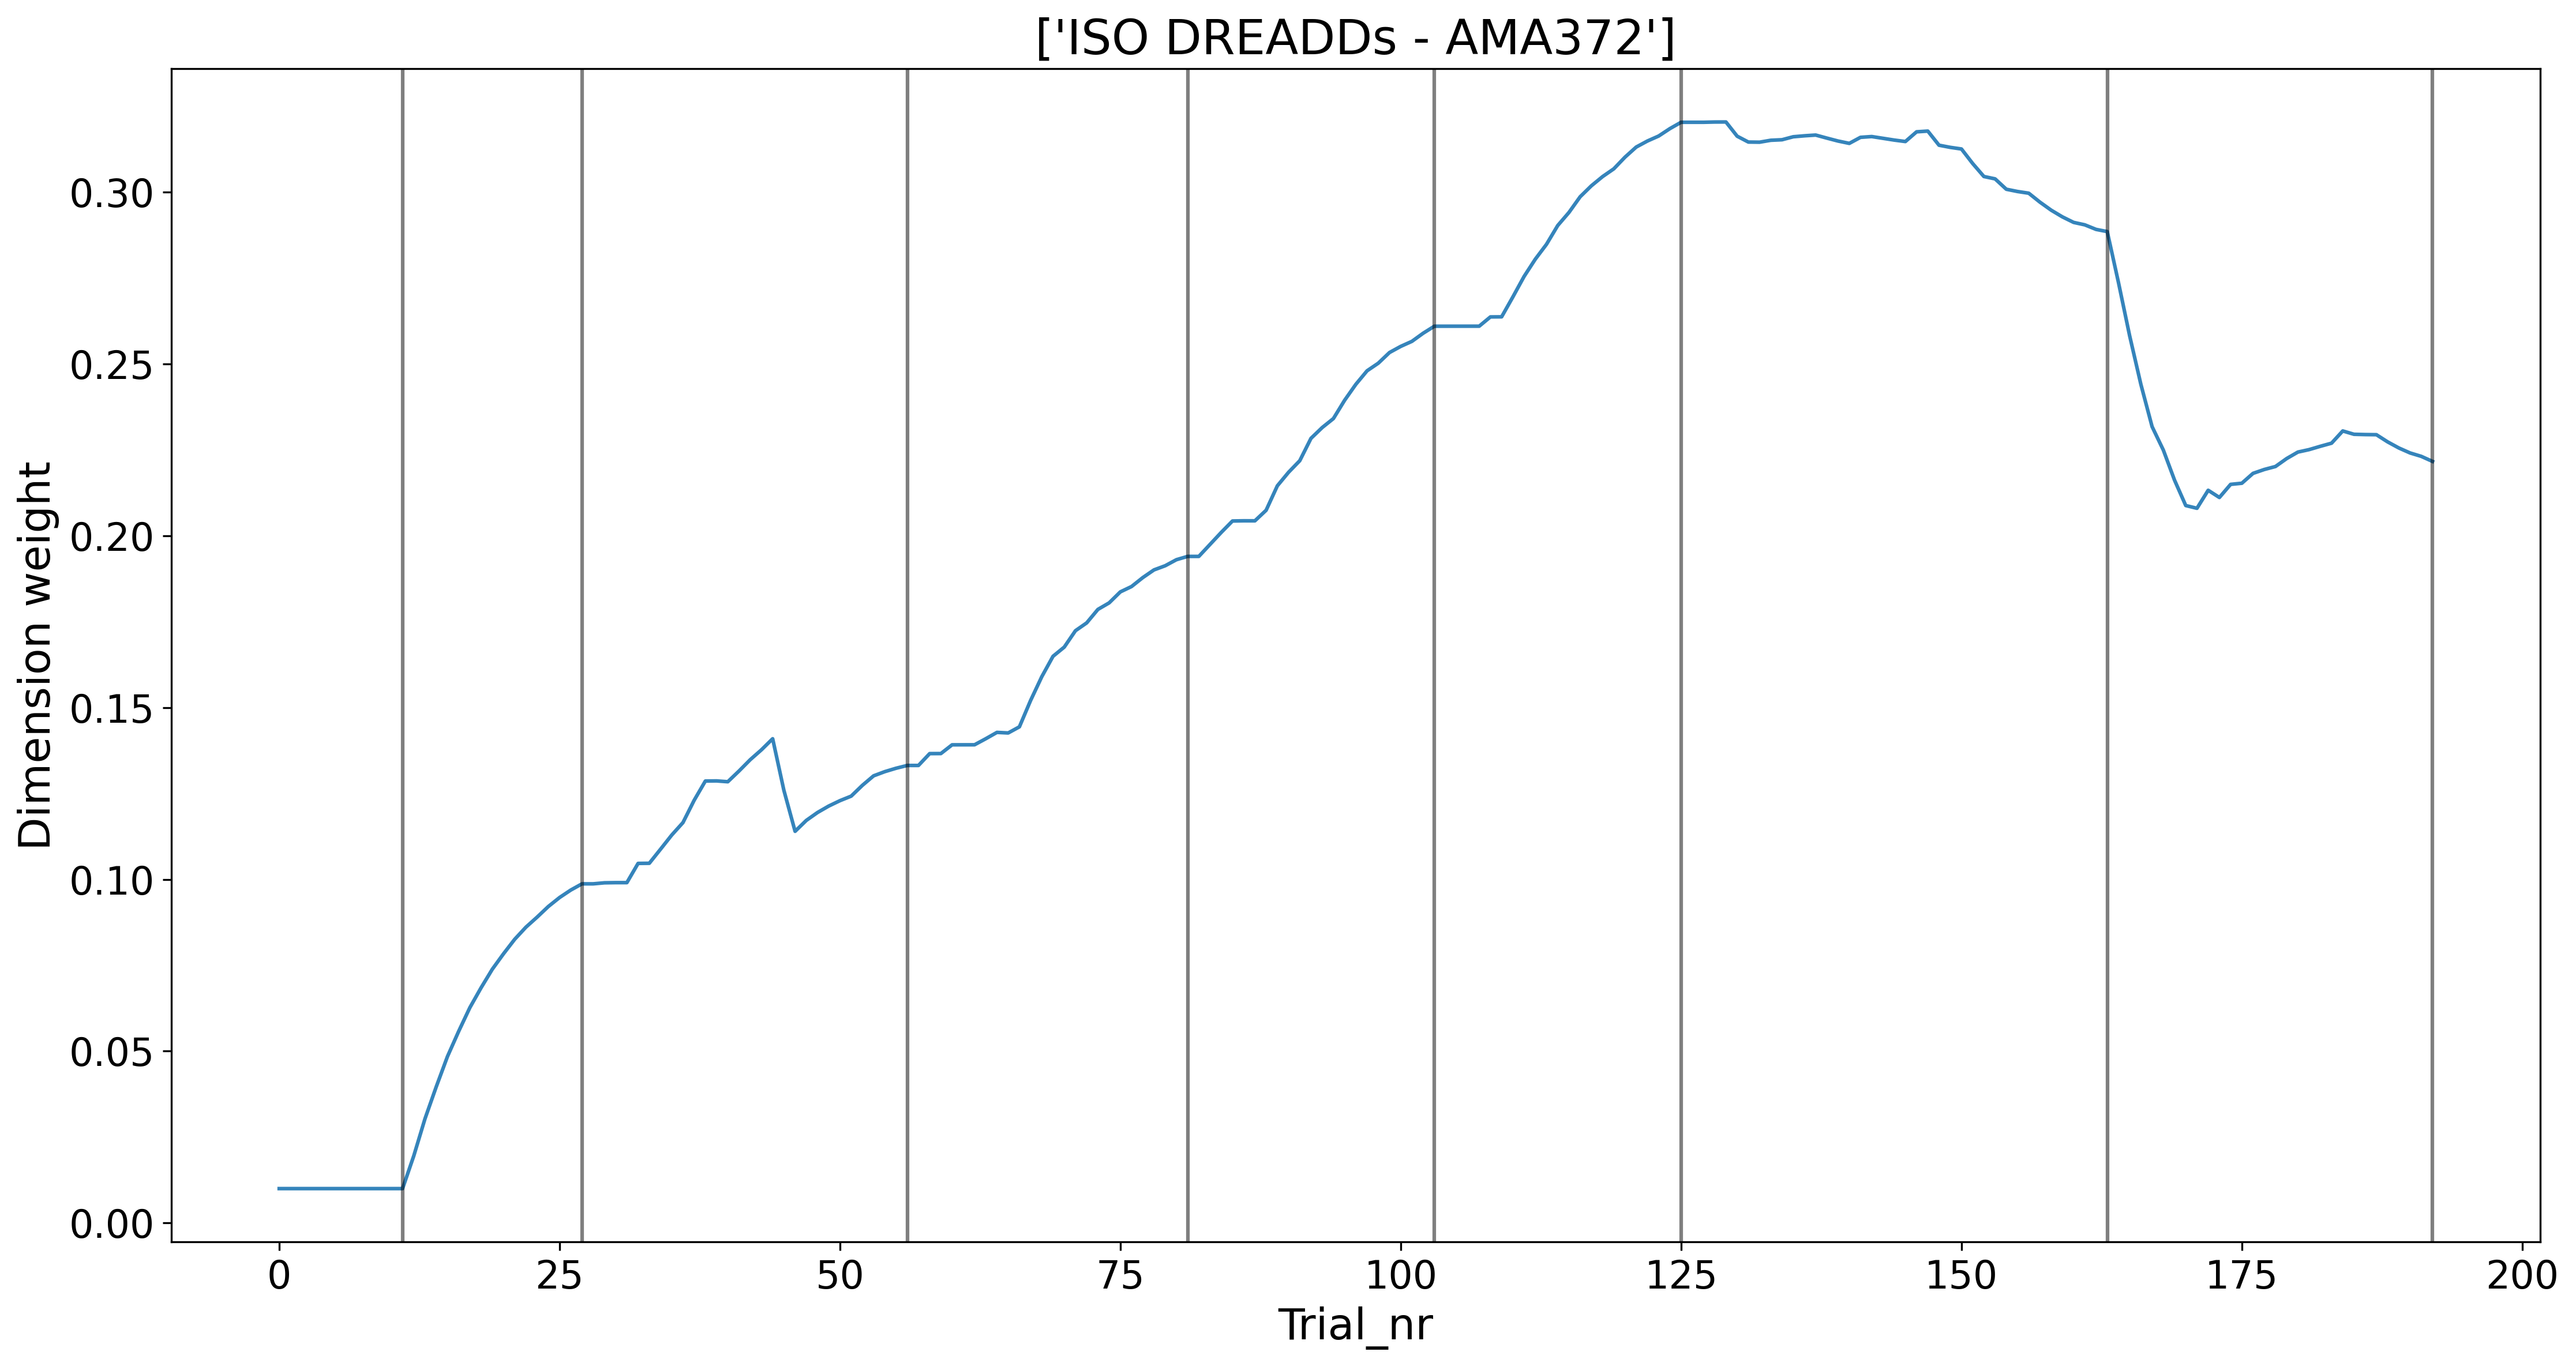

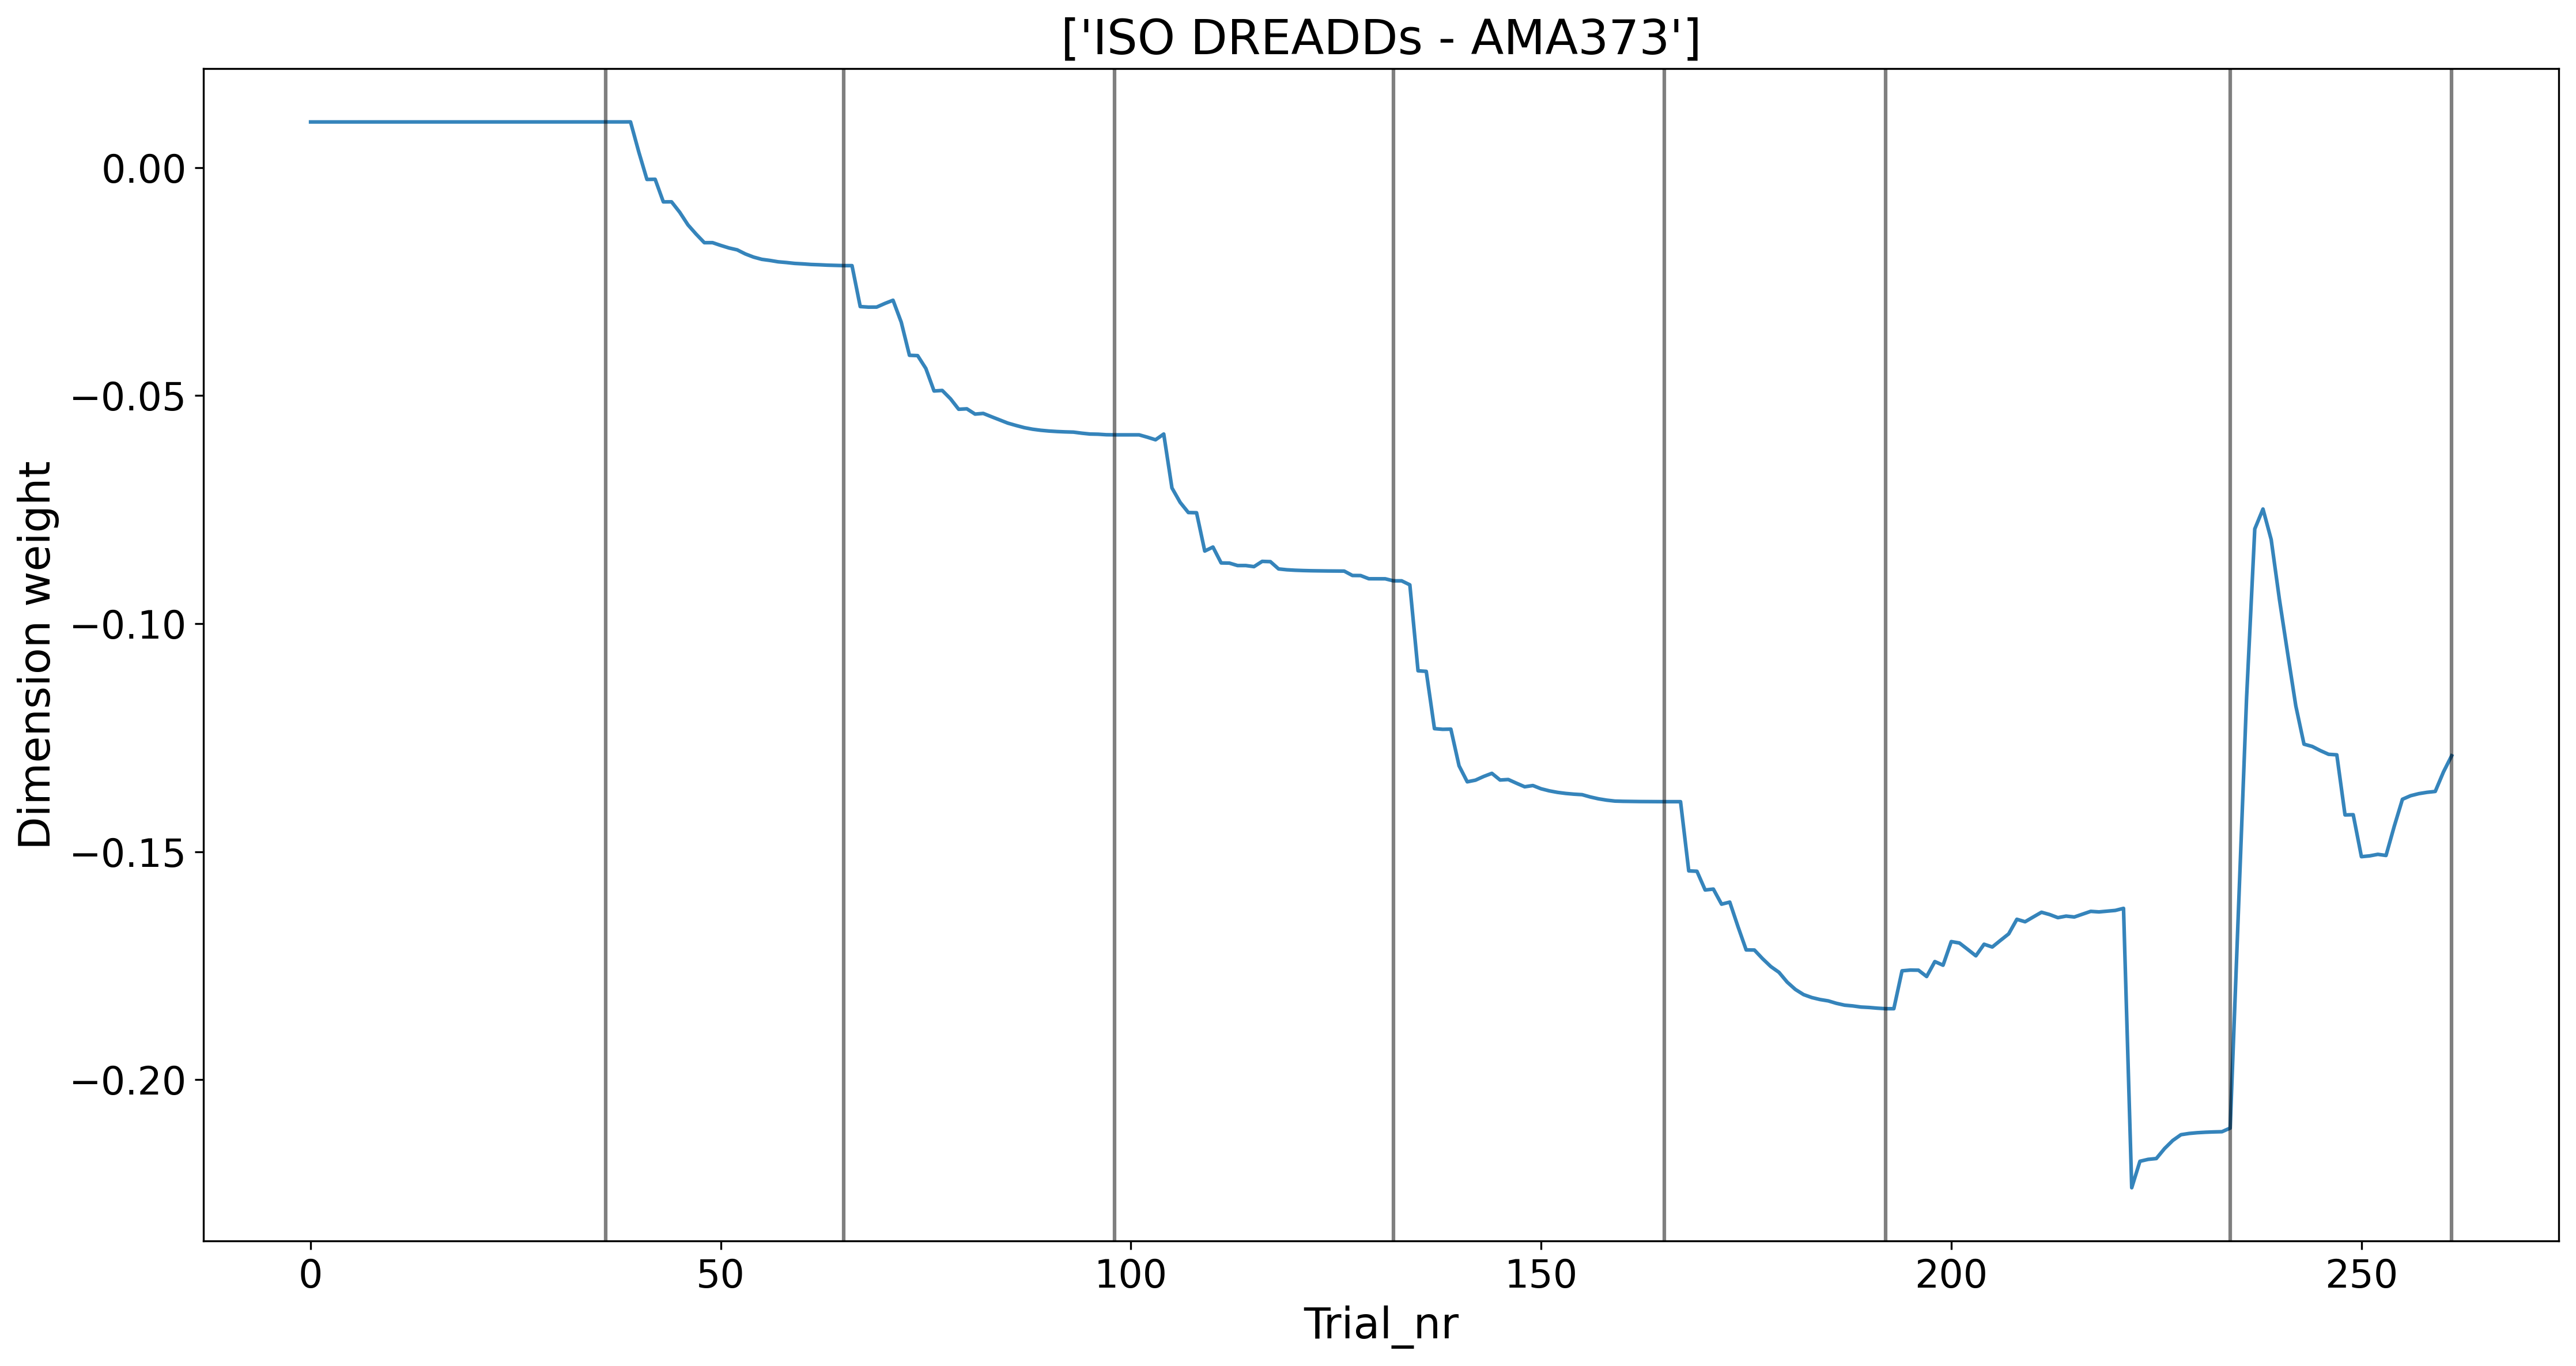

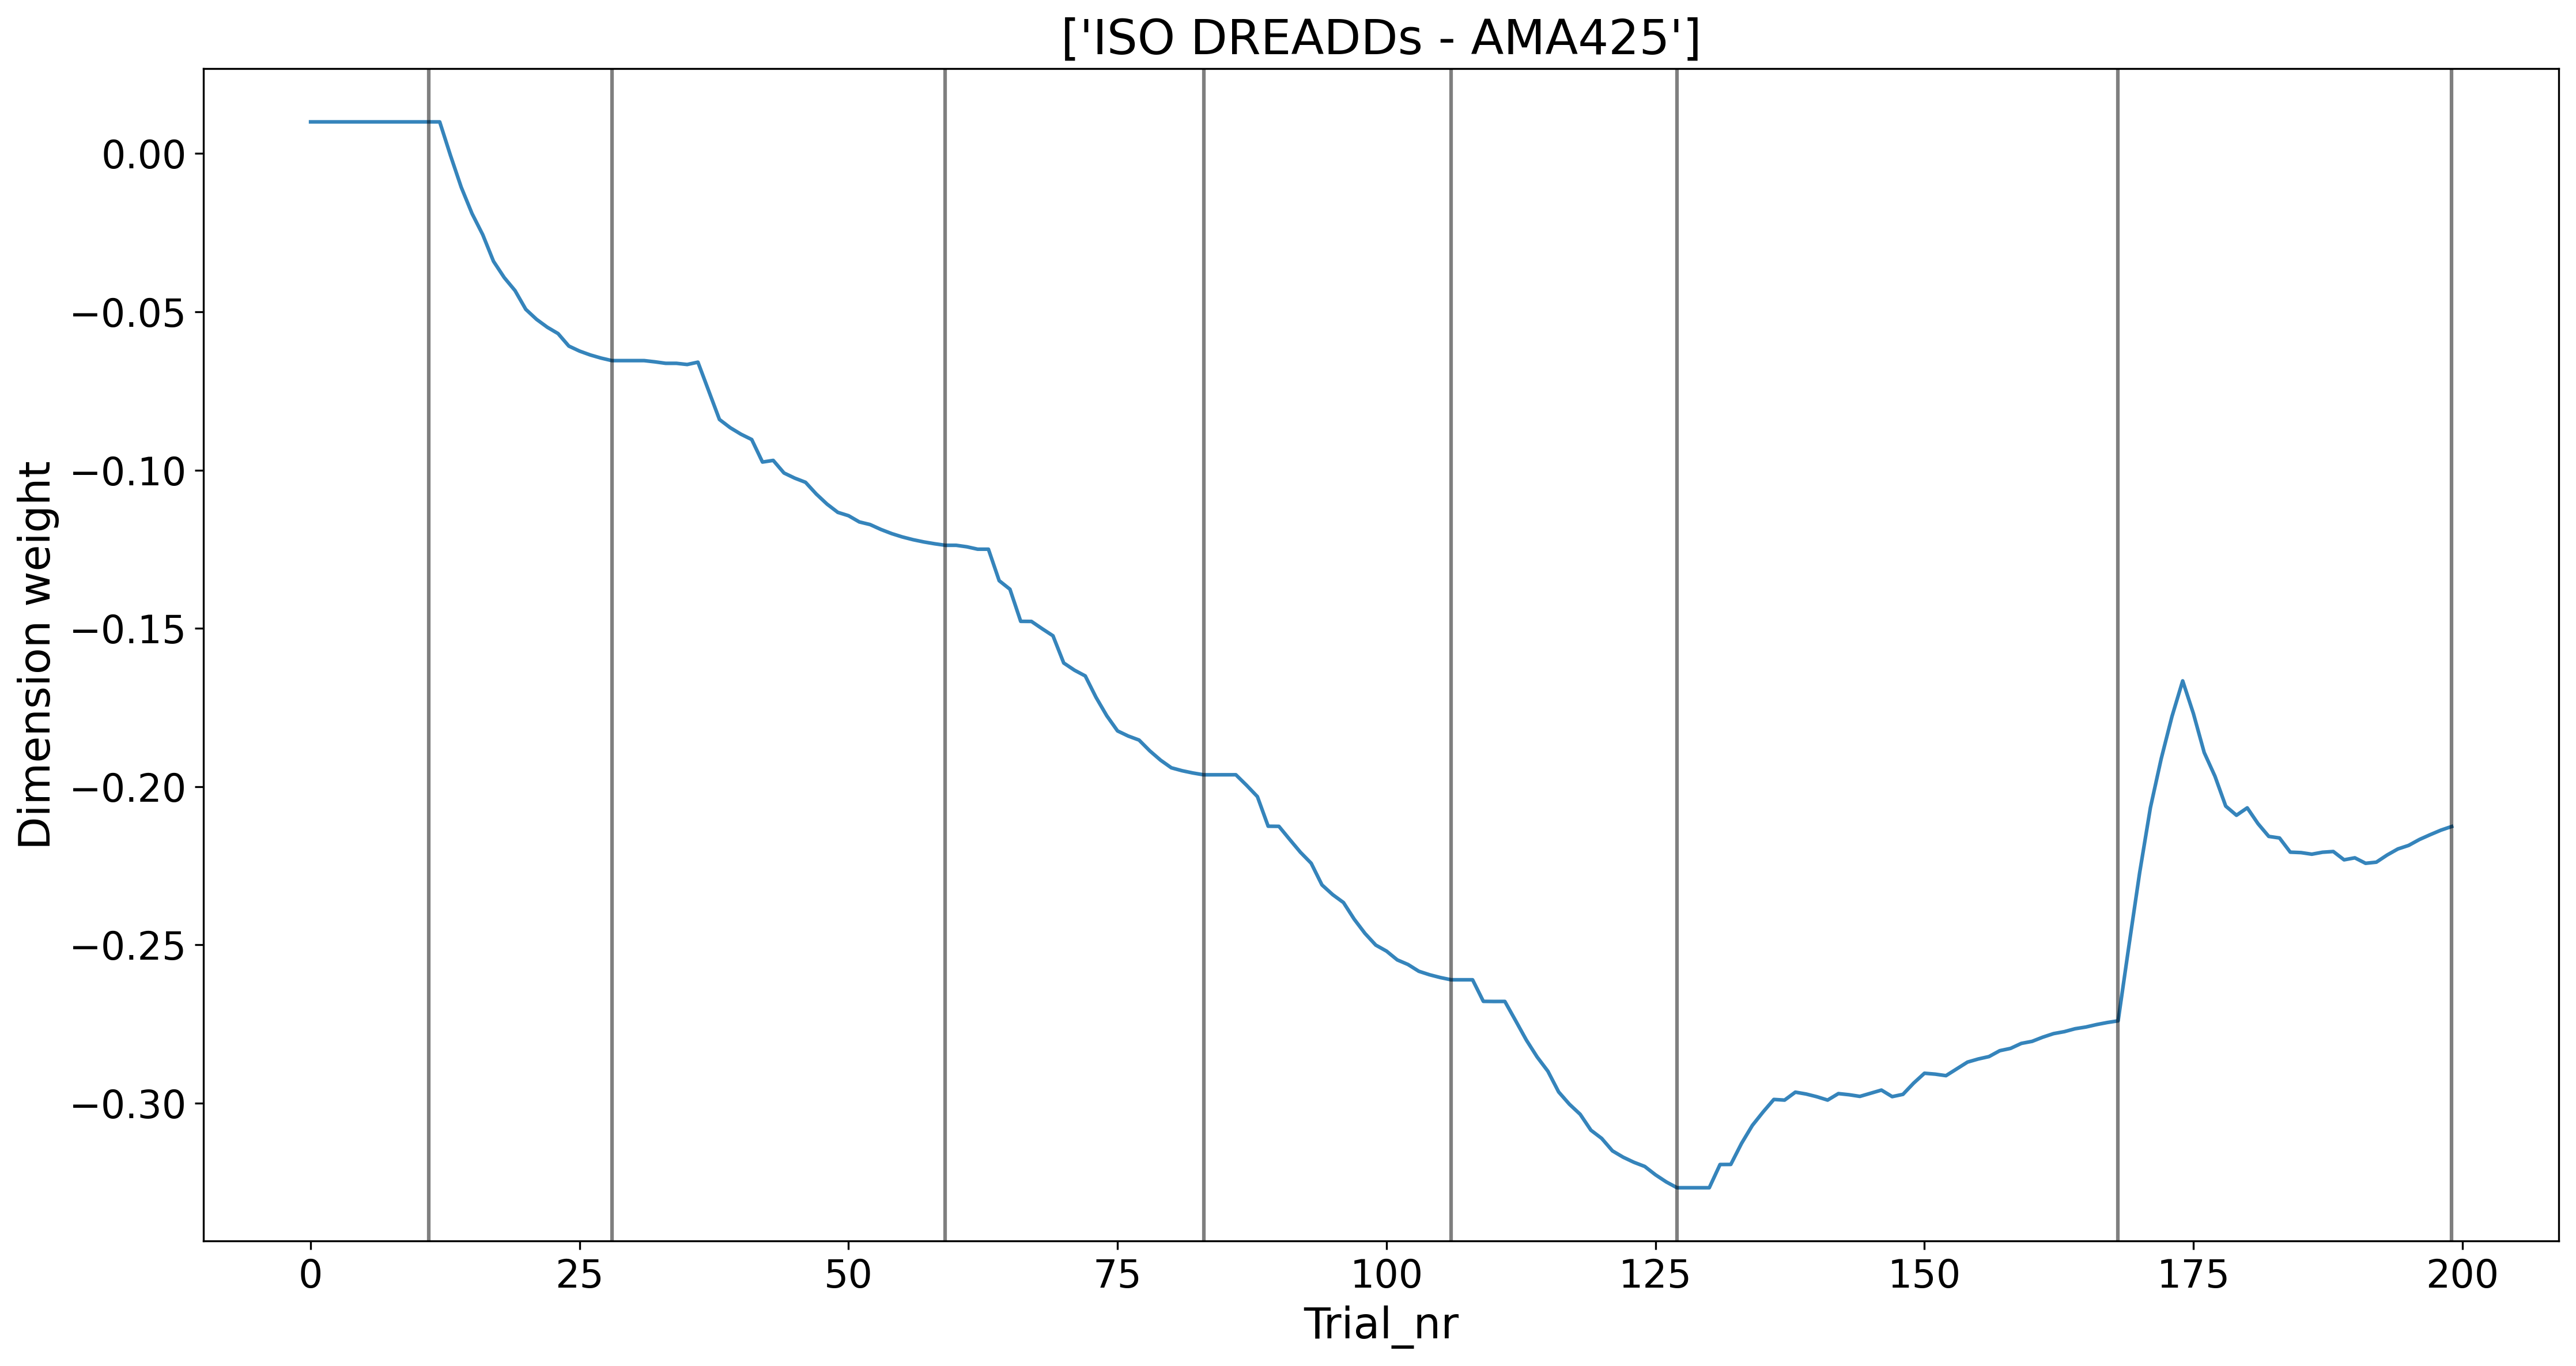

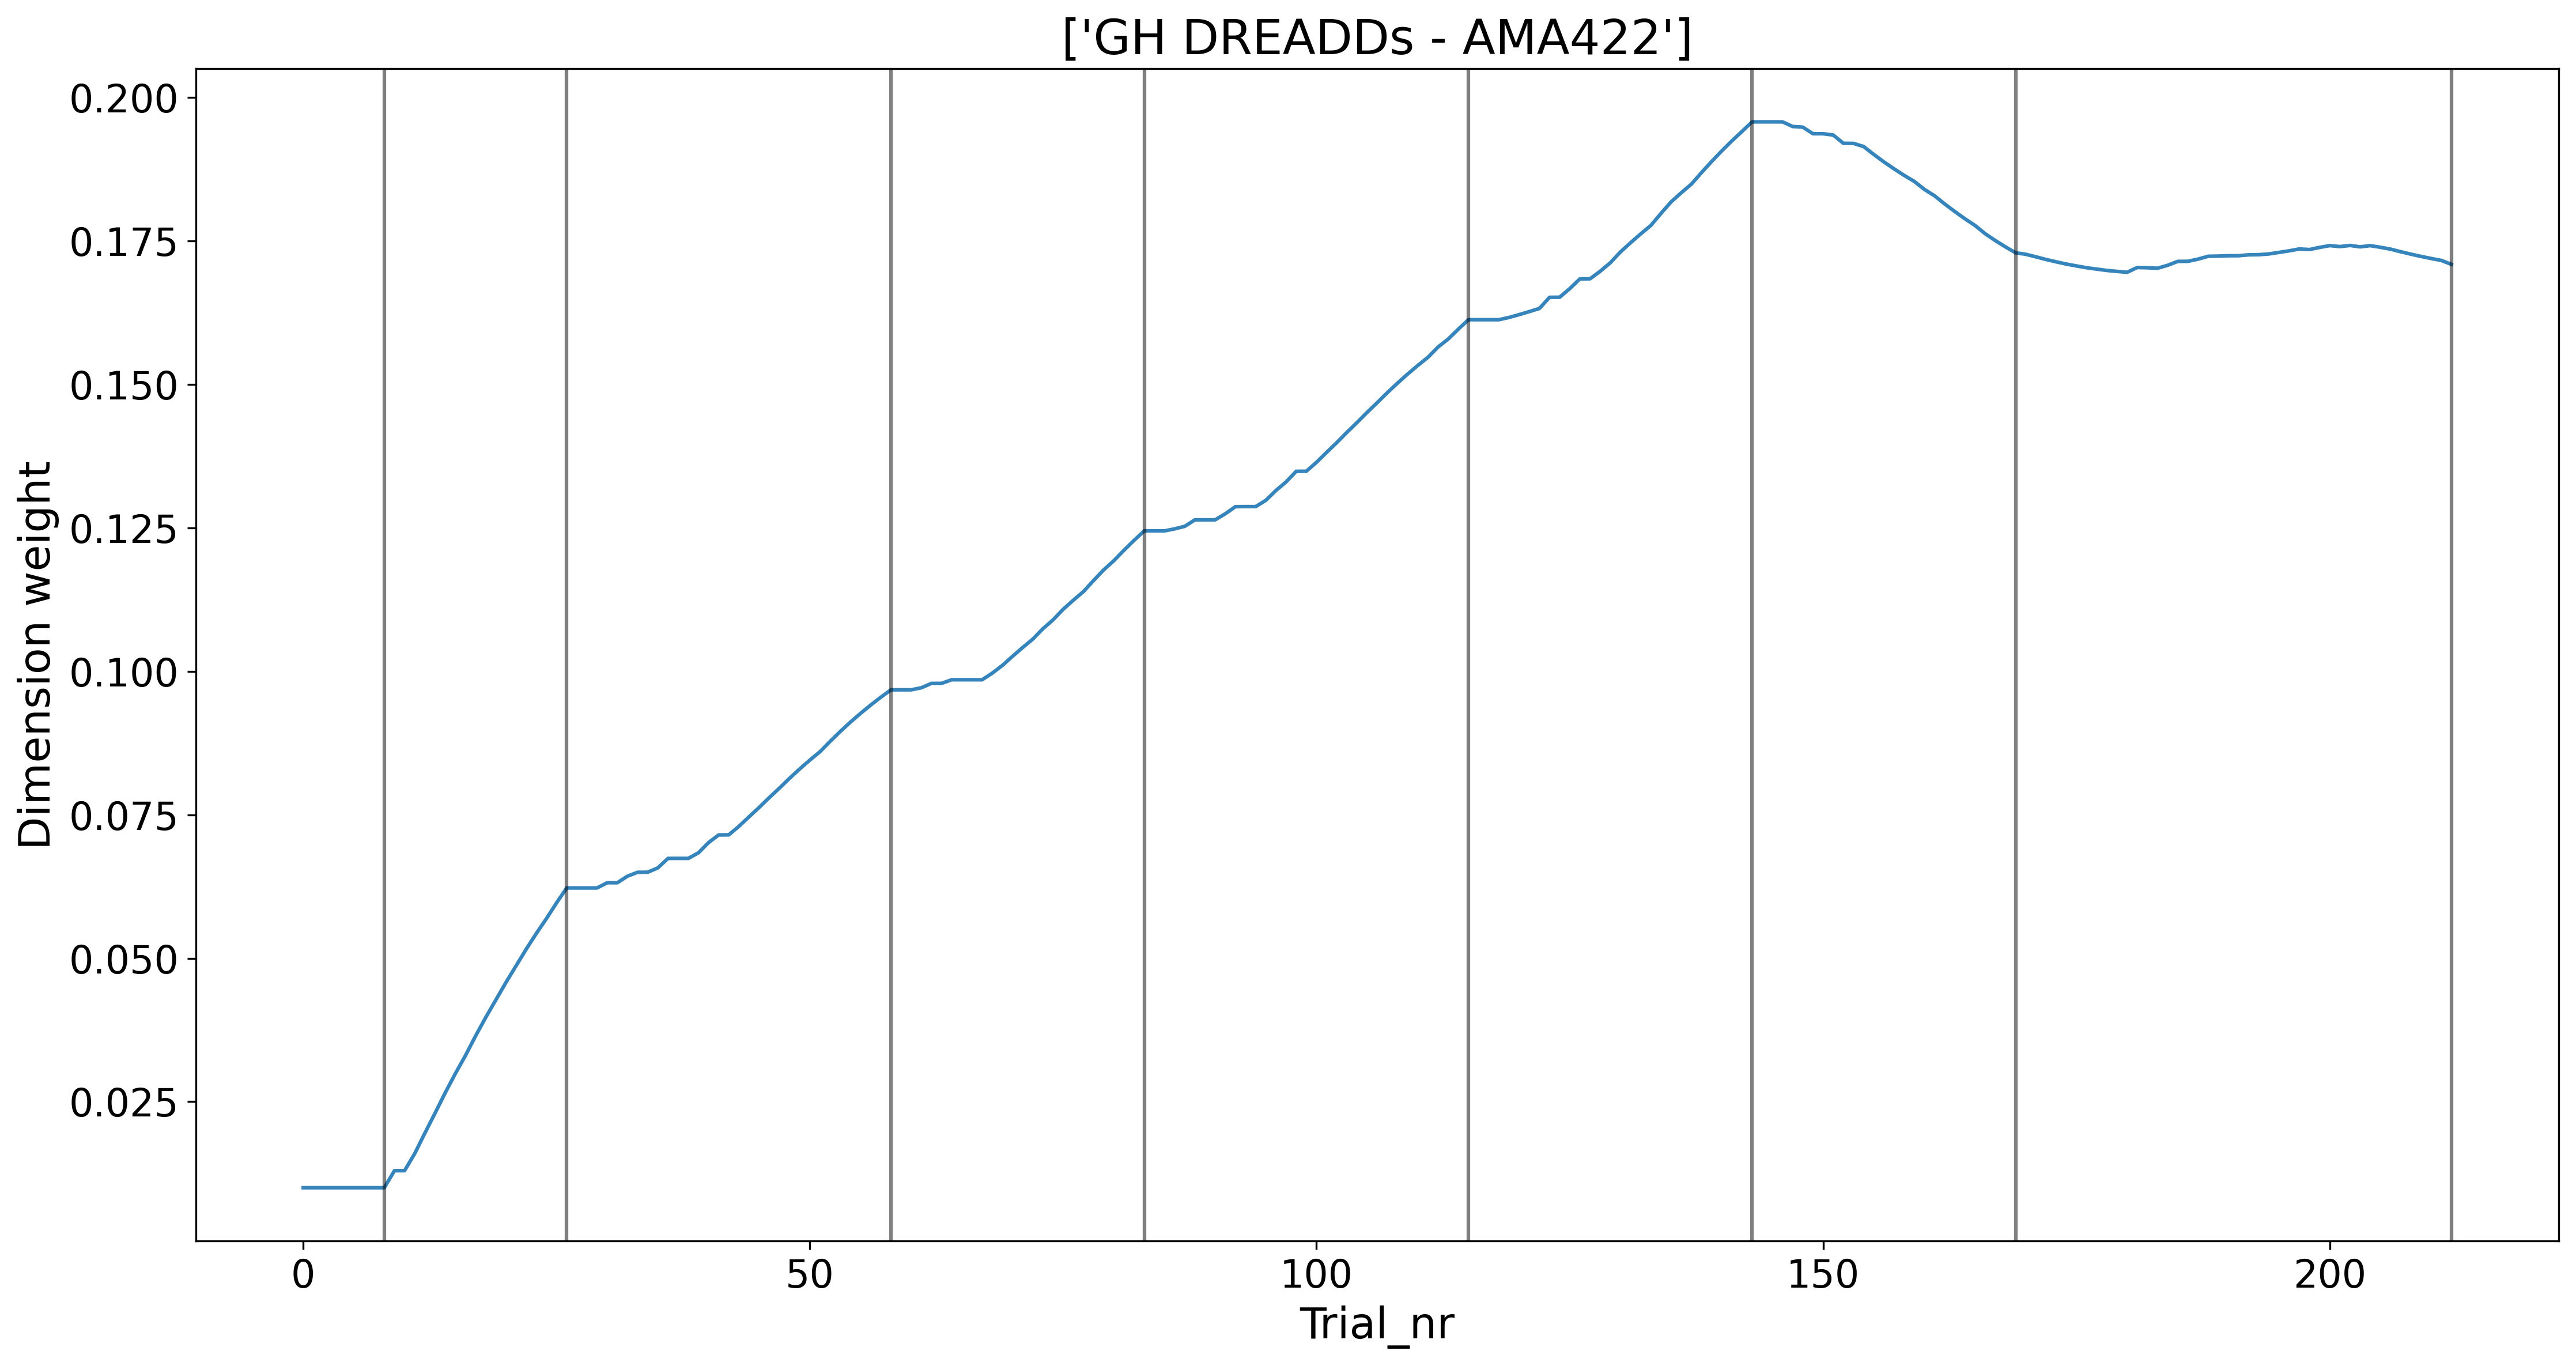

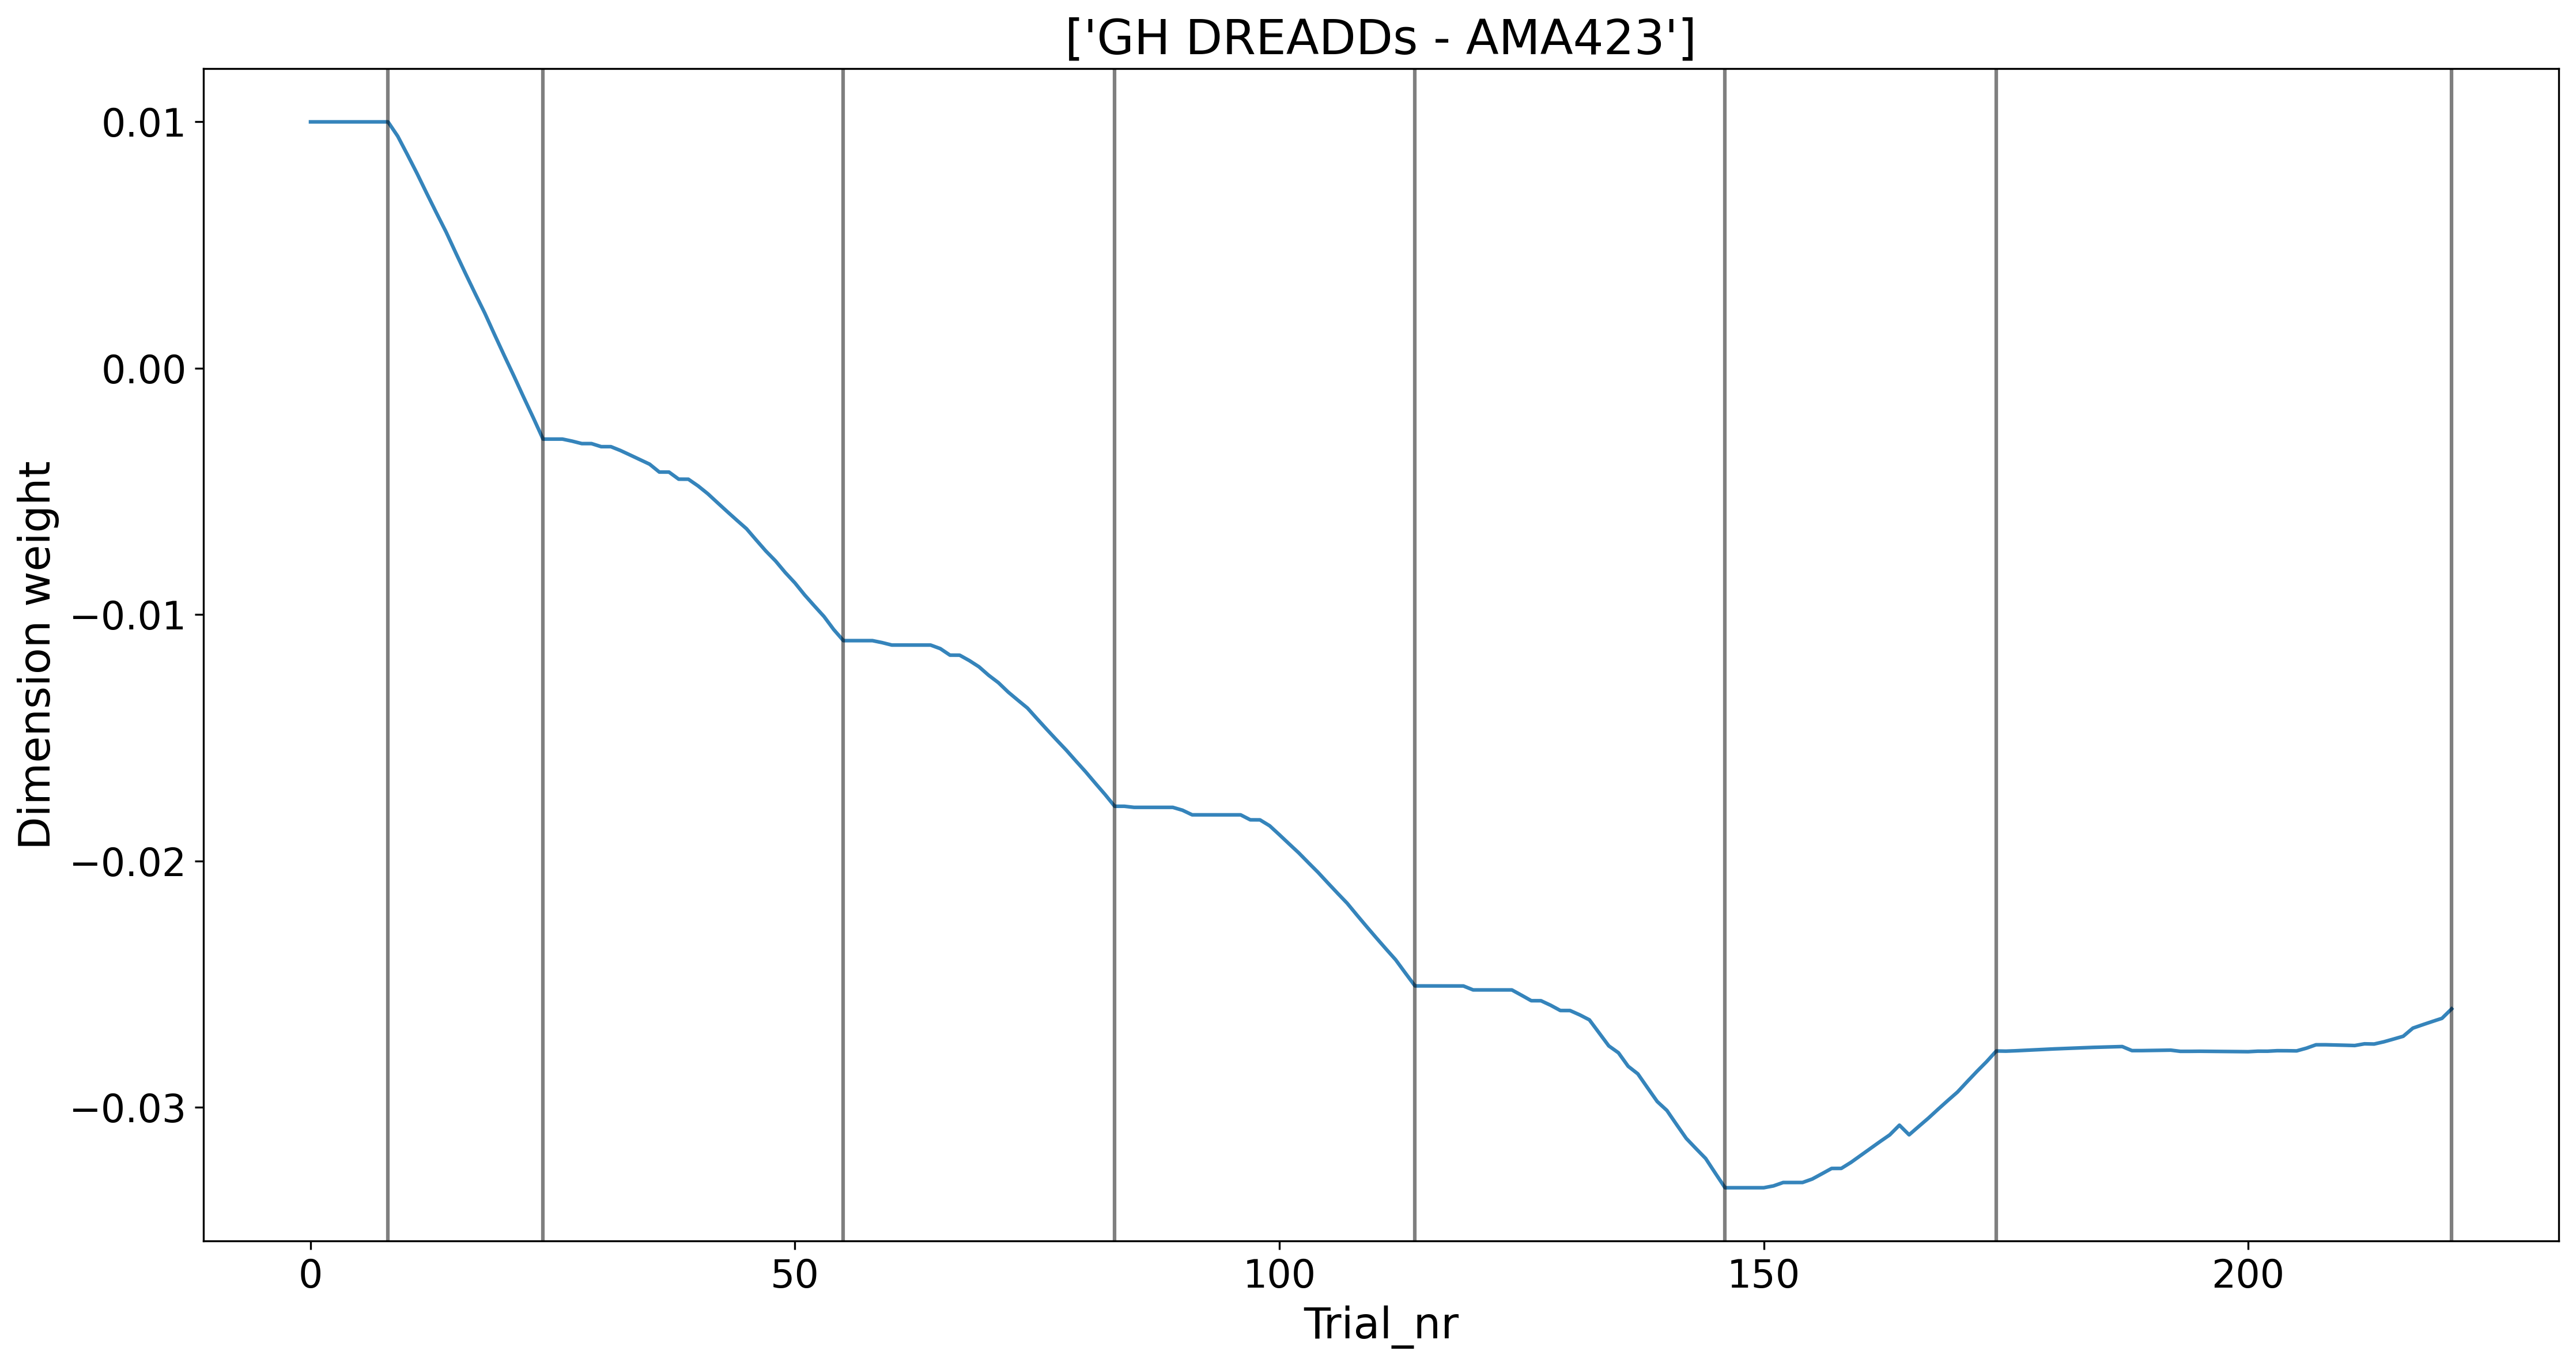

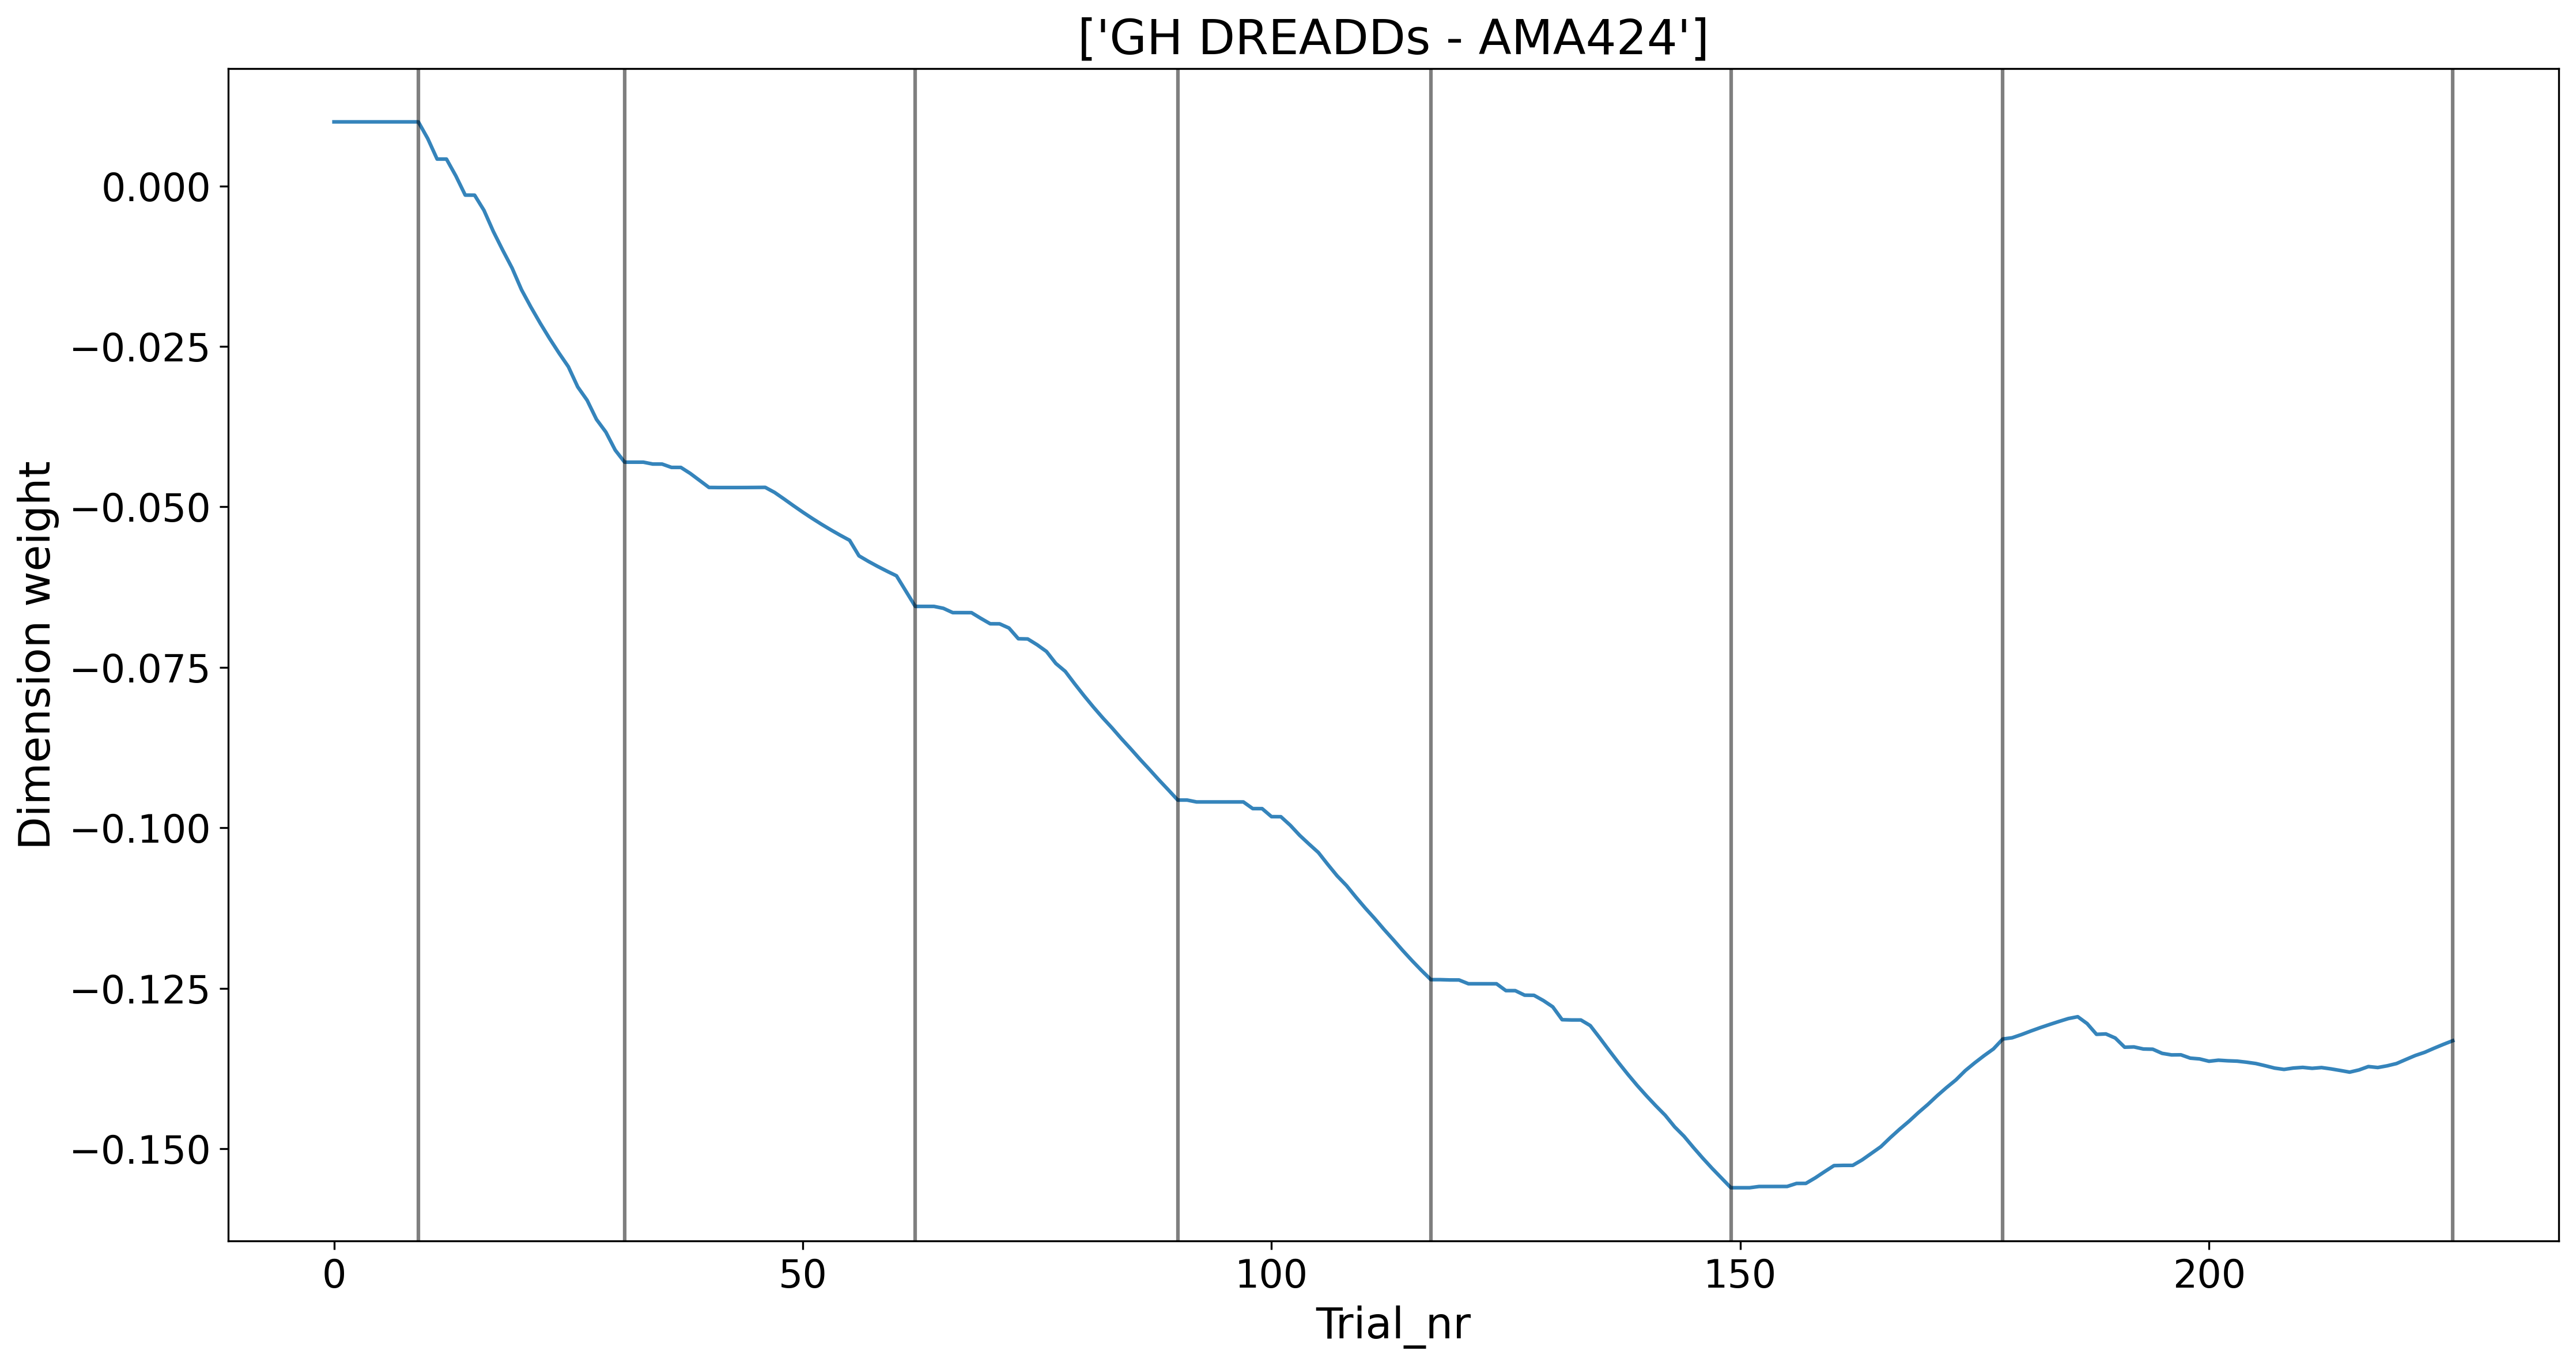

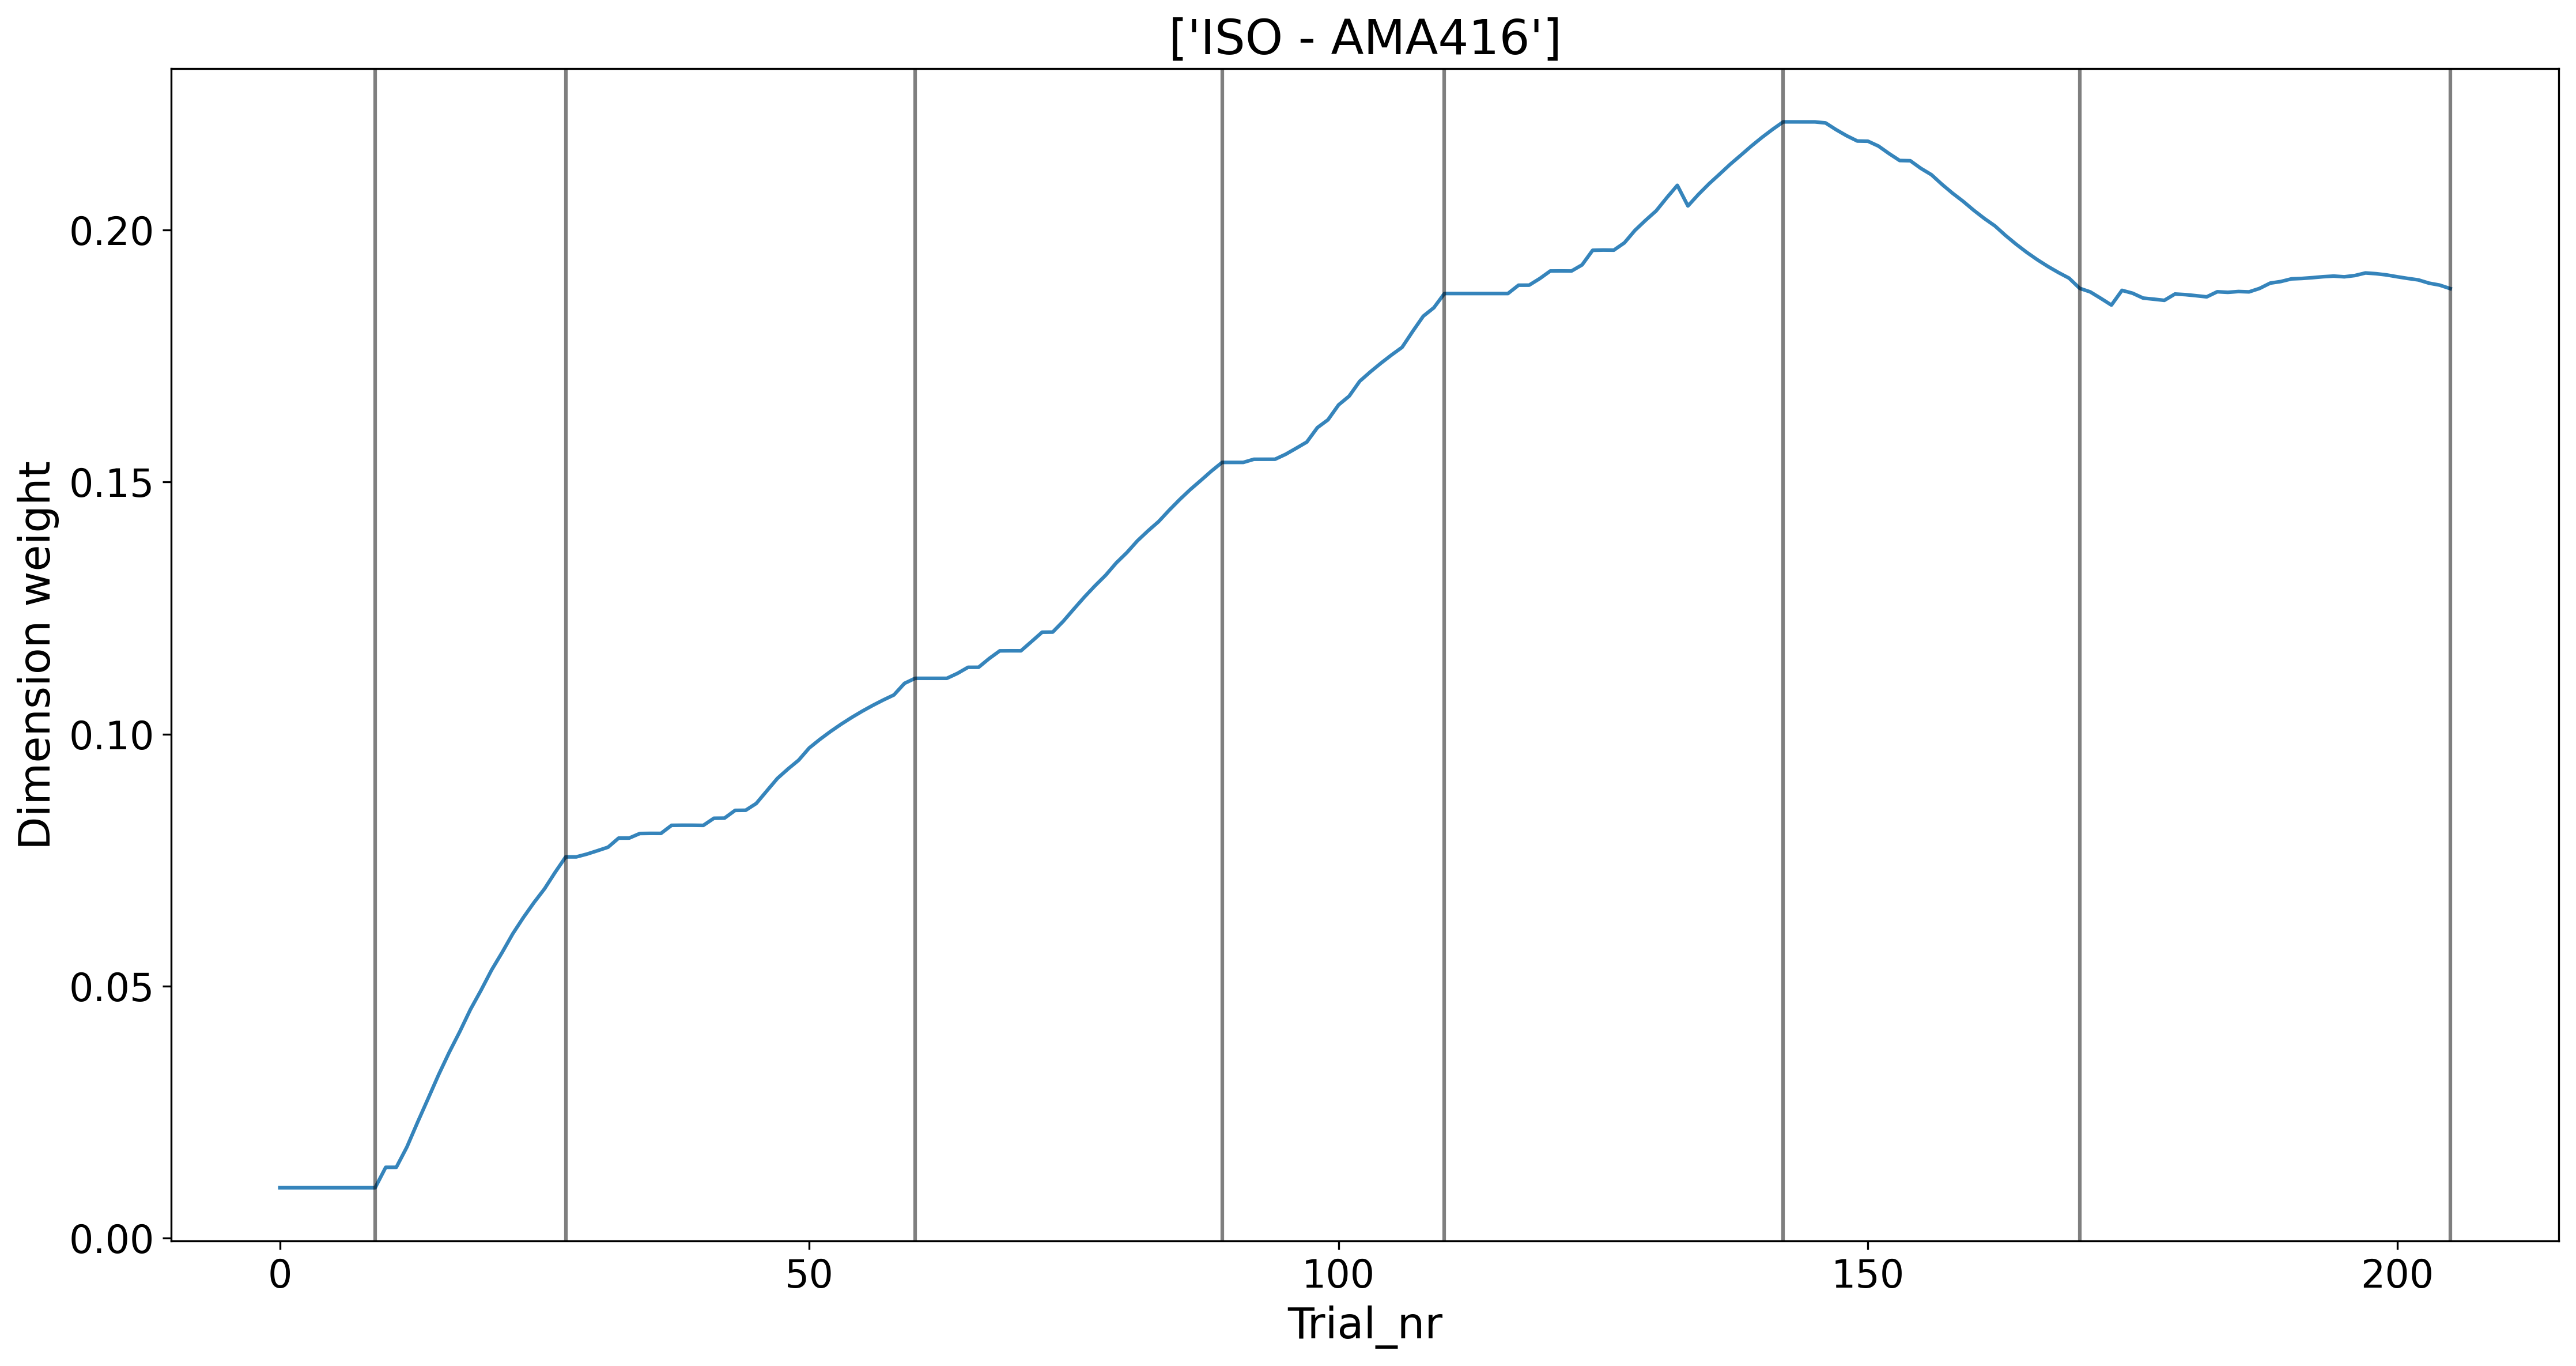

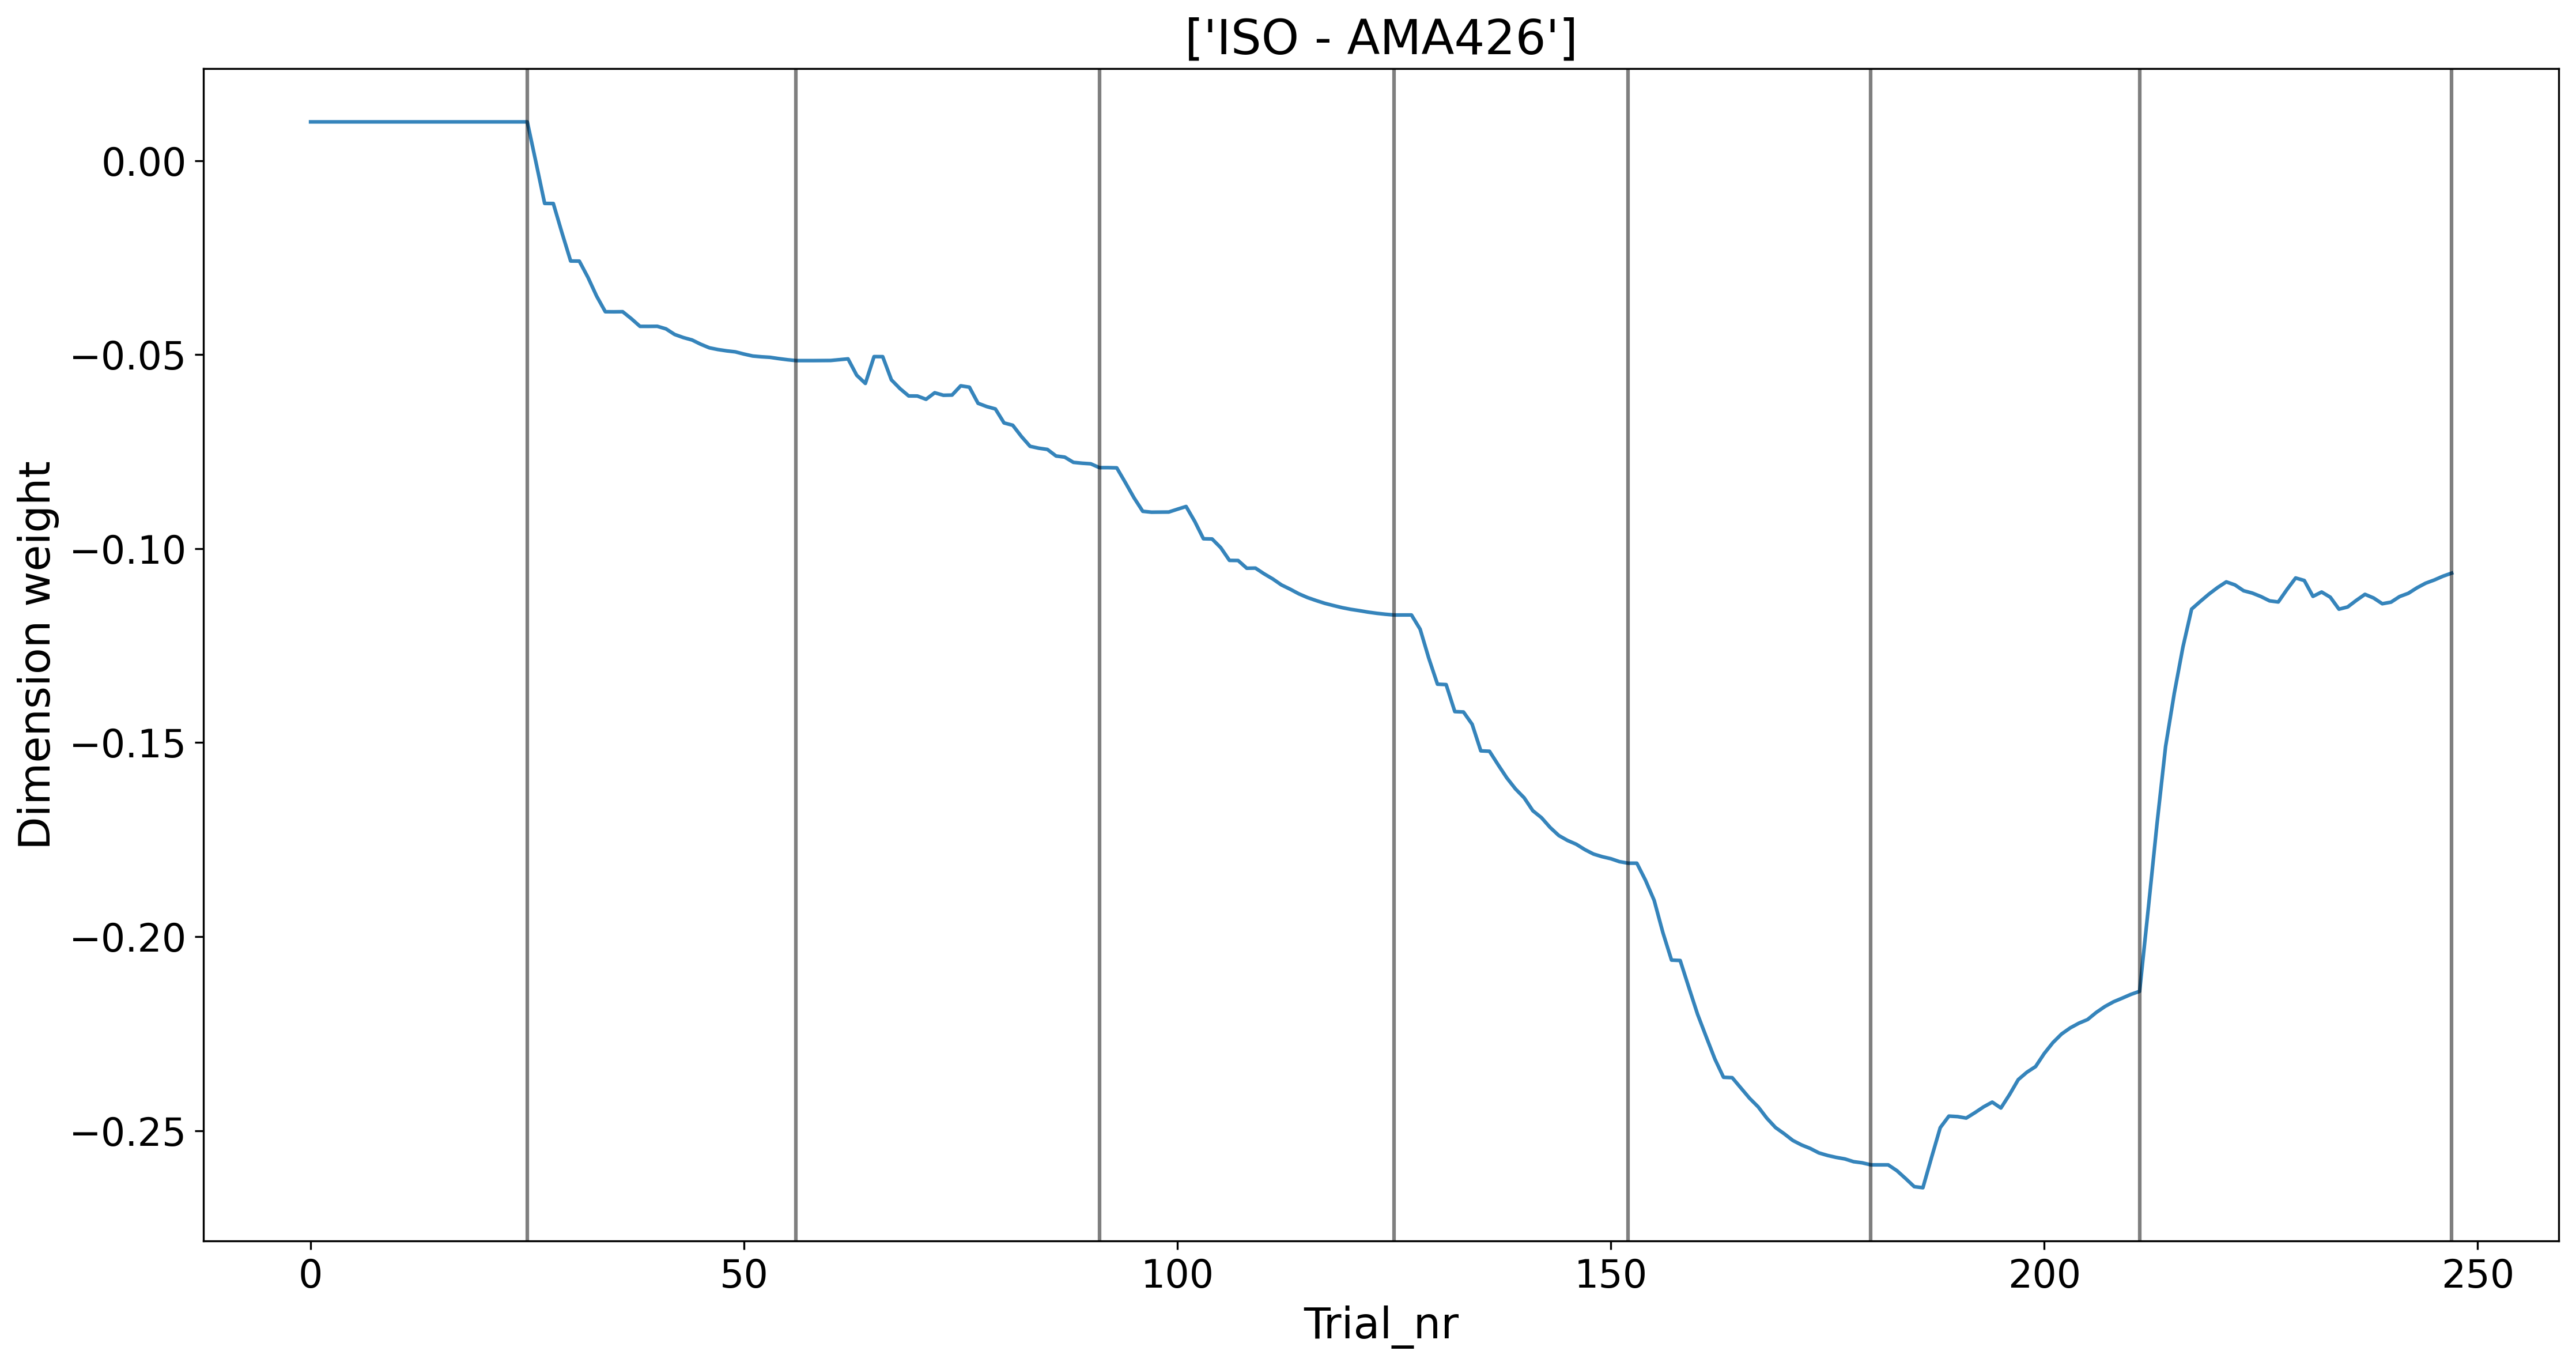

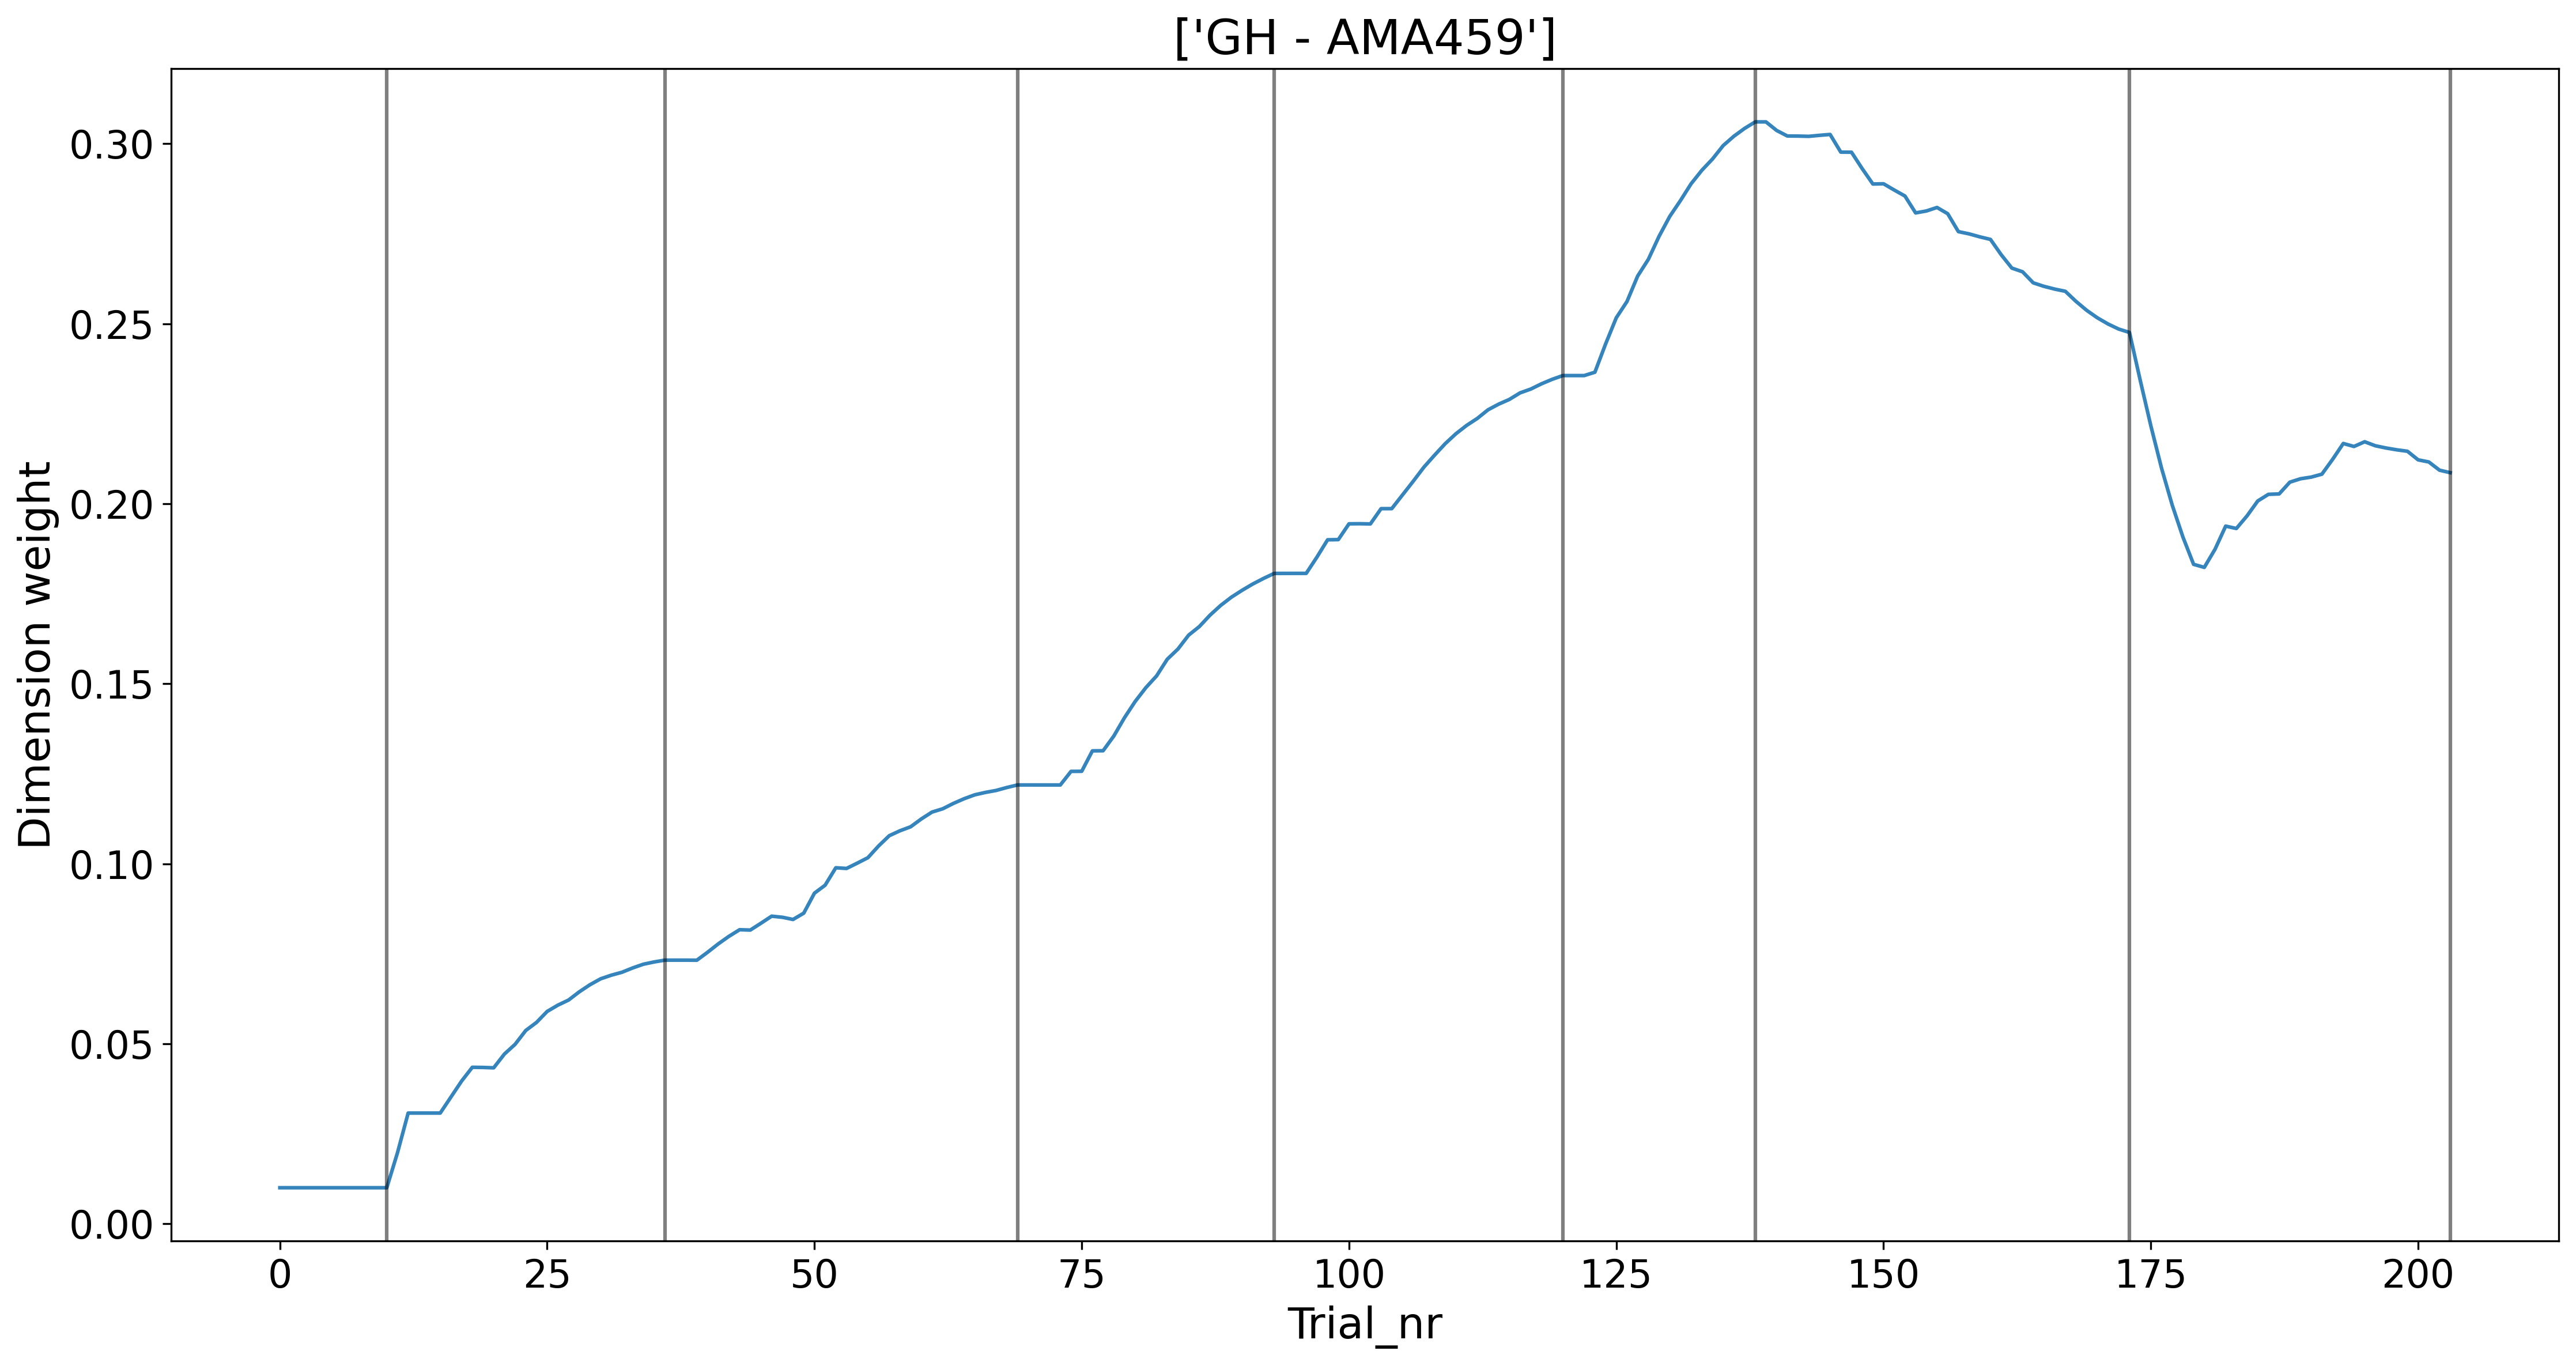

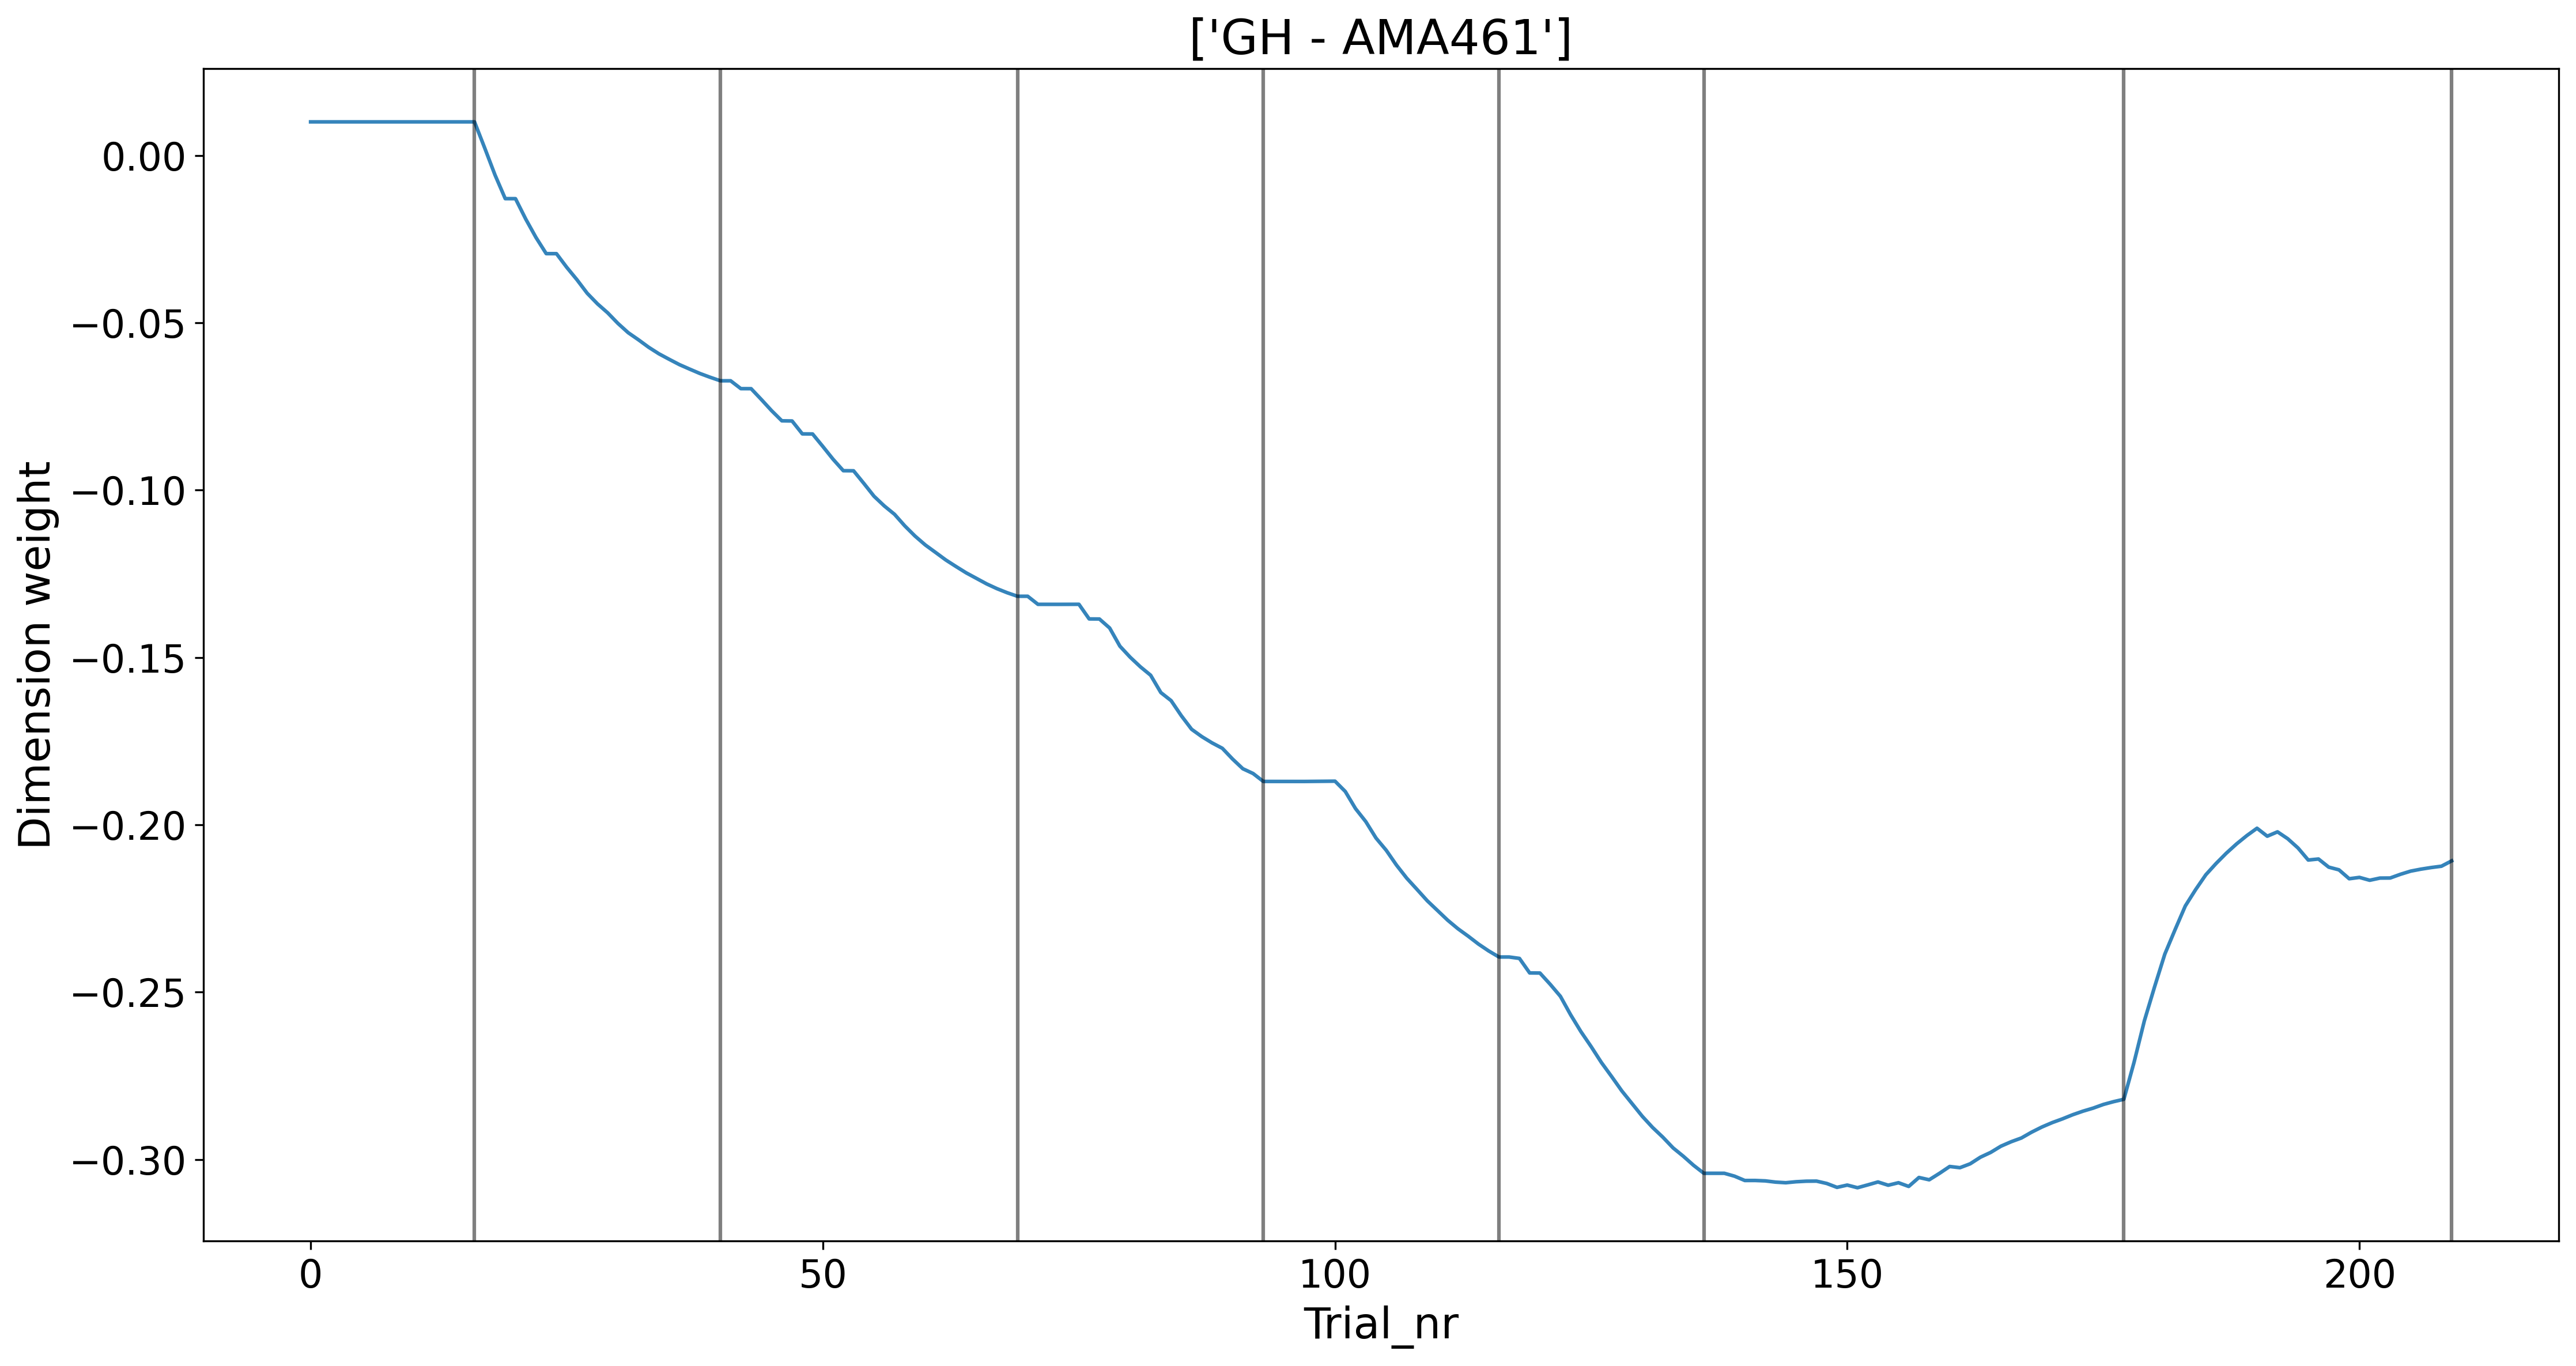

In [ ]:
# loop over the fits
groups = ['ghc', 'ghd', 'isoc', 'isod', 'all']
groups_2 = ['GH', 'GH DREADDs', 'ISO', 'ISO DREADDs', 'all']
clean_data = pd.read_csv('data/clean/clean_data.csv')

for group in groups:
    # Get index
    i = groups.index(group)

    # Get the trialwise likelihood for all subjects within the current fit
    tmp_cafrl = alpt_cafrl_a[i]['theta']
    tmp_safrl = alpt_safrl_a[i]['theta']

    # Get the right data
    if group == 'all':
        tmp_data = clean_data
    else:
        tmp_data = clean_data[clean_data['condition'] == groups_2[i]].copy()

    # Bind the likelihoods for each model as a column in the data
    tmp_list = [tmp_cafrl, tmp_safrl]
    models = ['CAFRL_A_theta', 'SAFRL_A_theta']

    for model in tmp_list:
        i = tmp_list.index(model)
        likelihoods = []
        for j in range(len(model)):
            x = model[j]
            likelihoods = likelihoods + x

        tmp_data[models[i]] = likelihoods

    ## now make 1 plot for each mouse, plotting theta over trials, with v lines for block change points

    if group == 'all':
    
        mice = tmp_data['mouse'].unique()

        for mouse in mice:
            tmp_data_2 = tmp_data[tmp_data['mouse'] == mouse].reset_index()
            g = tmp_data_2['condition'].unique()
            trials = range(len(tmp_data_2['mouse']))
            blocks = tmp_data_2.groupby('block').size()
            theta = list(np.concatenate(tmp_data_2['SAFRL_A_theta']))

            fig, ax = plt.subplots(figsize=(15,8), dpi=300, facecolor='w', edgecolor='k')
            sns.lineplot(x=trials, y=theta, alpha=0.9)

            # plot block change points as vertical lines
            x = -1
            block_names = ['SD', 'CD', 'IDS1', 'IDS2', 'IDS3', 'IDS4', 'EDS', 'EDSR']
            for block in block_names:
                x += blocks[block]
                plt.axvline(x, color = 'k' , alpha = 0.5)

            # Add labels, title, and layout adjustments
            plt.xlabel('Trial_nr')
            plt.ylabel('Dimension weight')
            plt.title(g + ' - ' + mouse)
            plt.tight_layout()  # Ensure everything fits within the figure
            plt.show()

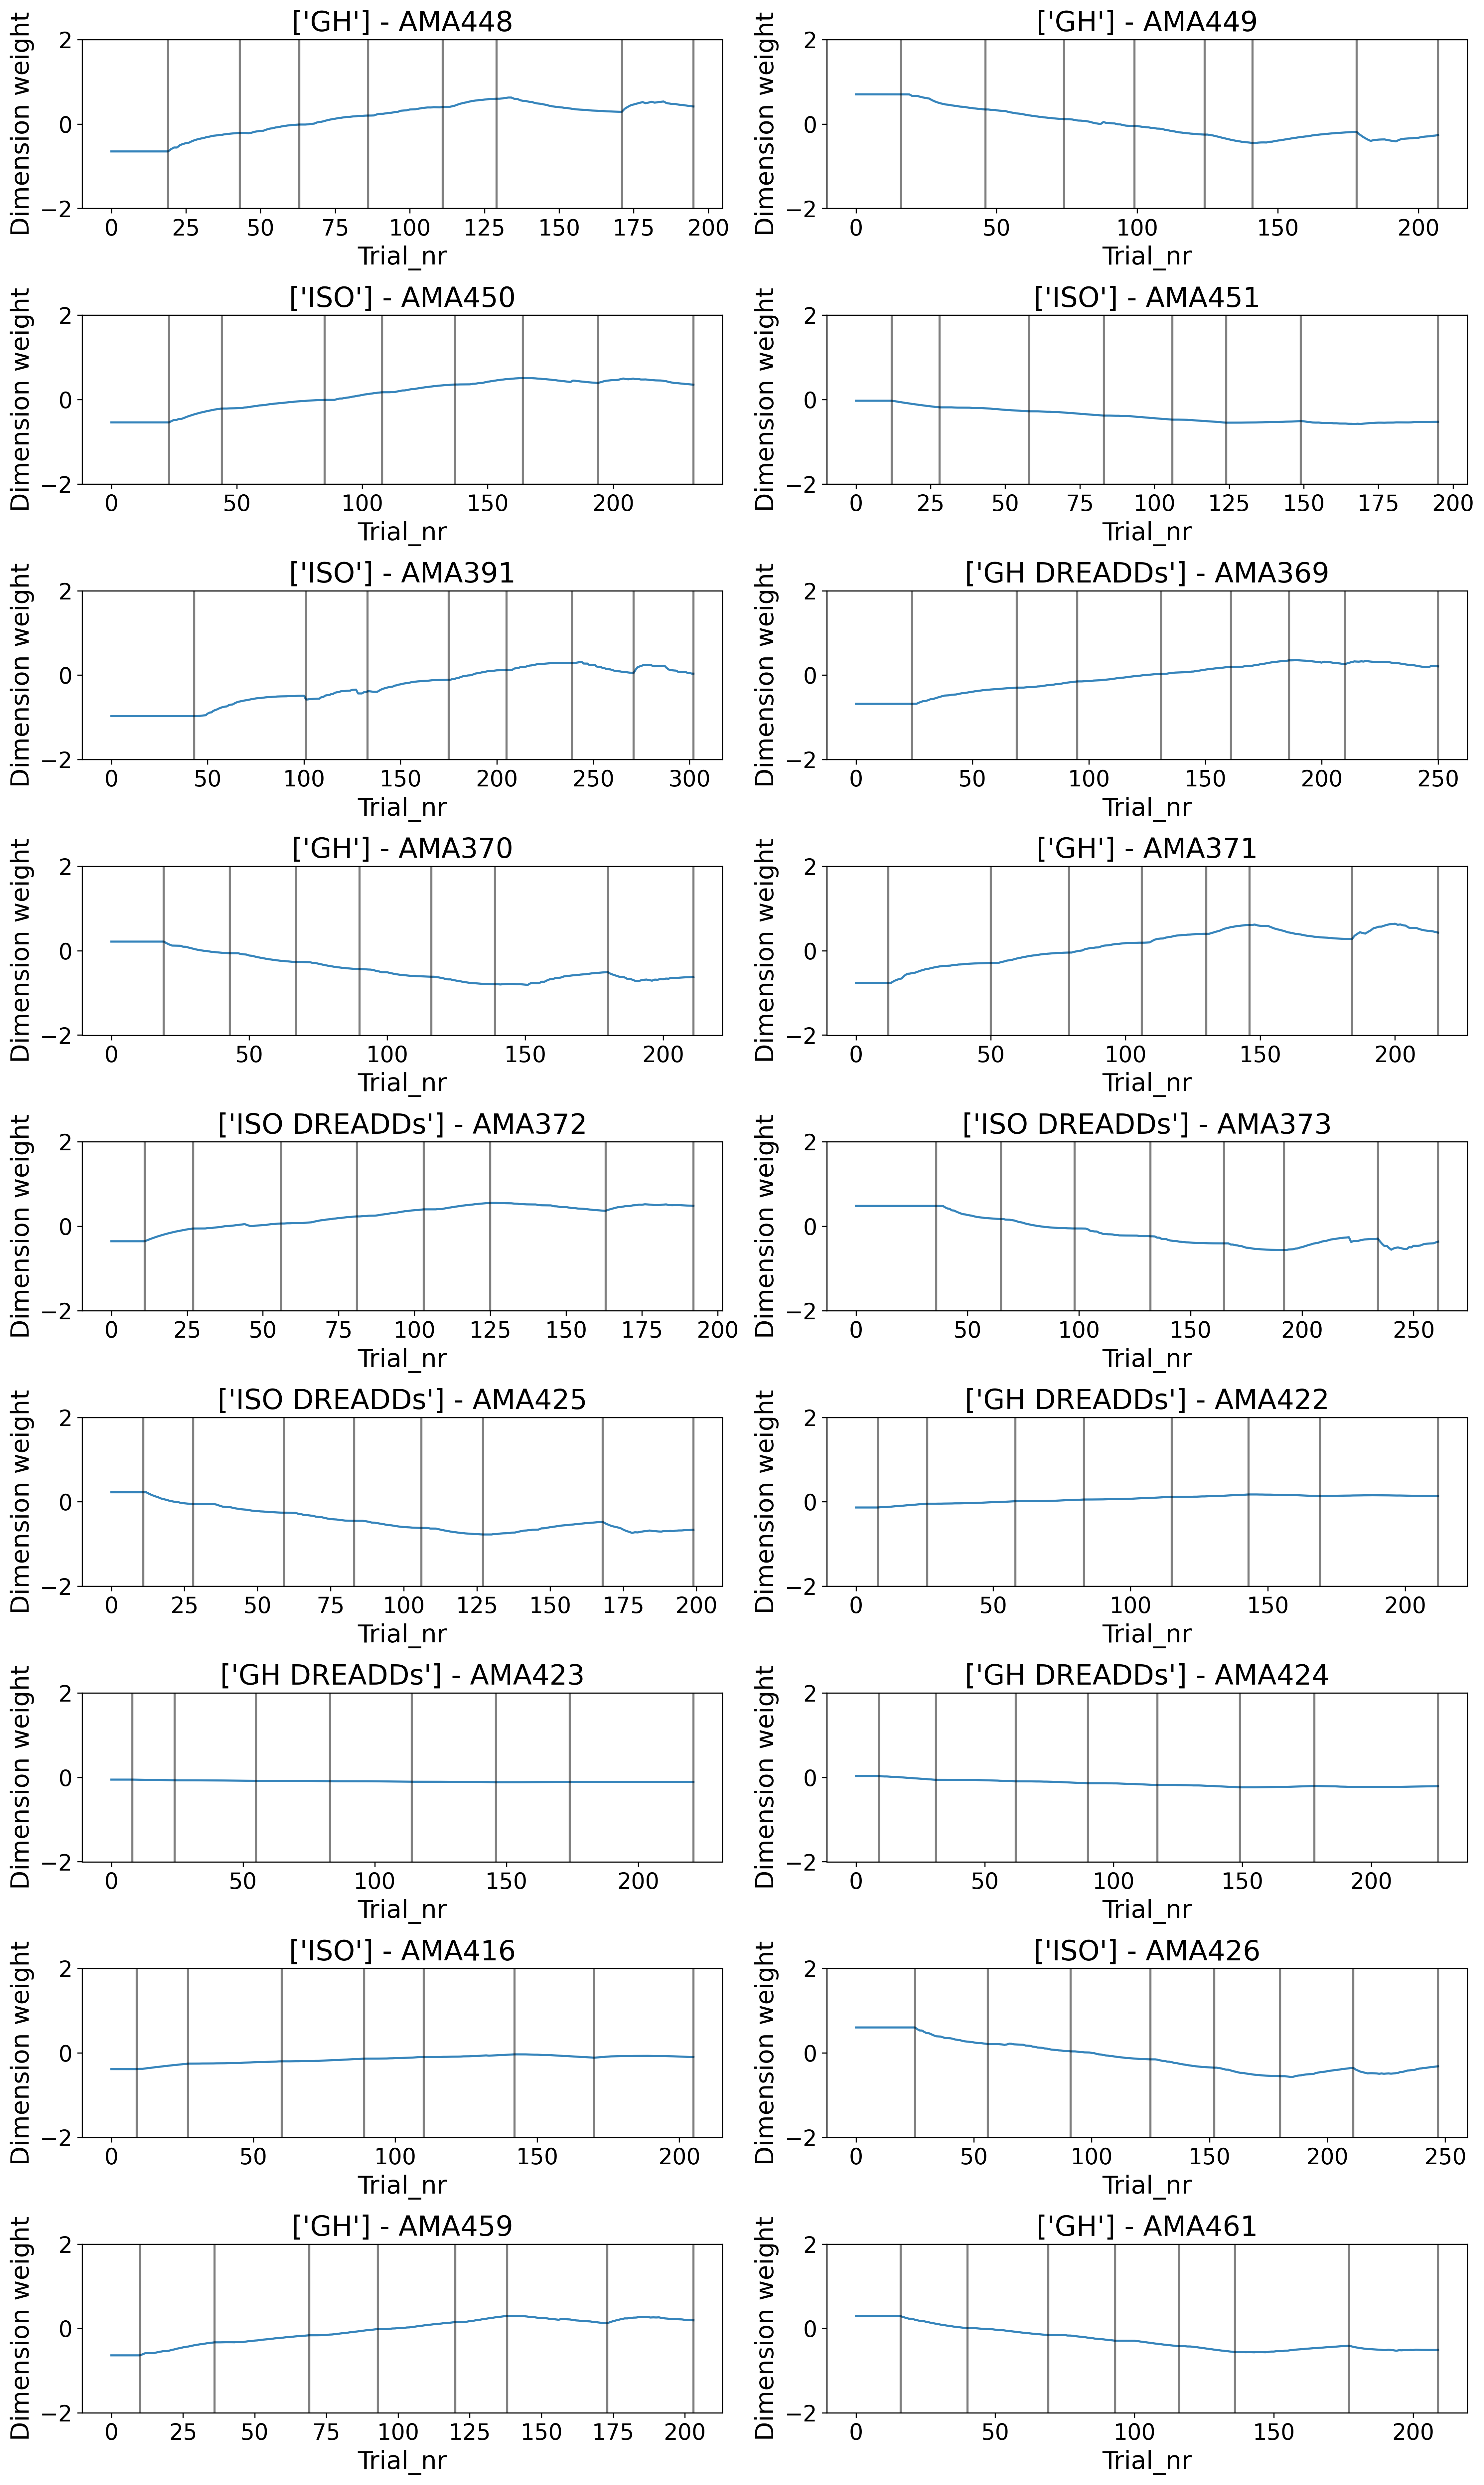

In [17]:
# loop over the fits
groups = ['ghc', 'ghd', 'isoc', 'isod', 'all']
groups_2 = ['GH', 'GH DREADDs', 'ISO', 'ISO DREADDs', 'all']
clean_data = pd.read_csv('data/clean/clean_data.csv')

# Create a grid for subplots (e.g., 2 rows, 2 columns for 4 plots)
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(15, 25), dpi=300)
axes = axes.flatten()  # Flatten to easily index axes for each plot

plot_idx = 0  # To track the subplot index

for group in groups:
    # Get index
    i = groups.index(group)

    # Get the trialwise likelihood for all subjects within the current fit
    tmp_cafrl = alpt_cafrl[i]['theta']
    tmp_safrl = alpt_safrl[i]['theta']

    # Get the right data
    if group == 'all':
        tmp_data = clean_data
    else:
        tmp_data = clean_data[clean_data['condition'] == groups_2[i]].copy()

    # Bind the likelihoods for each model as a column in the data
    tmp_list = [tmp_cafrl, tmp_safrl]
    models = ['CAFRL_A_theta', 'SAFRL_A_theta']

    for model in tmp_list:
        i = tmp_list.index(model)
        likelihoods = []
        for j in range(len(model)):
            x = model[j]
            likelihoods = likelihoods + x

        tmp_data[models[i]] = likelihoods

    # Now, plot for each mouse within the current group
    if group == 'all':
        mice = tmp_data['mouse'].unique()

        for mouse in mice:
            tmp_data_2 = tmp_data[tmp_data['mouse'] == mouse].reset_index()
            g = tmp_data_2['condition'].unique()
            trials = range(len(tmp_data_2['mouse']))
            blocks = tmp_data_2.groupby('block').size()
            theta = list(np.concatenate(np.concatenate(tmp_data_2['CAFRL_A_theta'])))

            # Use the next available axis in the grid
            ax = axes[plot_idx]

            sns.lineplot(x=trials, y=theta, ax=ax, alpha=0.9)
            ax.set_ylim(-2,2)


            # plot block change points as vertical lines
            x = -1
            block_names = ['SD', 'CD', 'IDS1', 'IDS2', 'IDS3', 'IDS4', 'EDS', 'EDSR']
            for block in block_names:
                x += blocks[block]
                ax.axvline(x, color = 'k' , alpha = 0.5)

            # Add labels, title, and layout adjustments
            ax.set_xlabel('Trial_nr')
            ax.set_ylabel('Dimension weight')
            ax.set_title(f'{g} - {mouse}')
            
            plot_idx += 1

# Adjust layout for subplots
plt.tight_layout()  # Ensure everything fits within the figure
plt.savefig('plots/CAFRL_theta_curves.png')
plt.show()
